### Project title: Prediction of credit score

# Importing the Basic and requiered Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.max_columns', None)

# Loading the Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [3]:
df=data

# Understanding the Problem Statement

The company evaluating the credit worthiness of a individual in a timely and accurate manner is difficult. Also these manual calculations are time-consuming, and also it is prone to human error. Thus it was decided to build a machine learning module that can classify customers into predefined credit score brackets based on their credit-related information. The model must be capable of handling a diverse range of features, including income, credit history, outstanding debt, employment status, and more.

In [4]:
df.shape

(100000, 28)

In [5]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [6]:
df.std()

Monthly_Inhand_Salary       3183.686167
Num_Bank_Accounts            117.404834
Num_Credit_Card              129.057410
Interest_Rate                466.422621
Delay_from_due_date           14.860104
Num_Credit_Inquiries         193.177339
Credit_Utilization_Ratio       5.116875
Total_EMI_per_month         8306.041270
dtype: float64

In [7]:
df.describe(include='object')

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

In [8]:
#pip install pandas_profiling

# Pandas Profiling

In [9]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df)
#report.to_file(output_file = 'report_expenses.html')

As columns like ID, Customer ID, SSN, Name is not of use in model building. We are dropping it

In [10]:
df.drop(['ID', 'Name', 'SSN', 'Customer_ID'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [12]:
for i in df:
    print(df[i].value_counts())

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64
6769.130000    15
6358.956667    15
2295.

In [13]:
#There are special characters in the columns thus to remove that we are creating a user defined function.
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [14]:
df["Age"] = df["Age"].apply(filter_col)

In [15]:
#Age is incorrectly mapped as object. hence it is converted to integer
df["Age"] = df['Age'].astype('int')

In [16]:
#Also age has -ve values and values greater than 100 which is practically incorrect hence we are replacing it with np.nan
print('Age greater than 100:  ',  (df[df["Age"]>100]['Age'].count()))
df.loc[df['Age'] > 100, 'Age'] = np.nan

Age greater than 100:   2776


In [17]:
#Occupation has a special character like '______', which may be different from the given list of occupation
#hence we are replacing it with others
df['Occupation'] = df['Occupation'].replace('_______', 'Other')

In [18]:
#Annual income has special characters which are removed using user defined function also it is wrongly classified as object
df['Annual_Income'] = df['Annual_Income'].apply(filter_col)

In [19]:
df['Annual_Income'] = df['Annual_Income'].astype('float').round(2)

In [20]:
#Number of bank accounts has a -1 from the pandas profiling report which is incorrect hence we are changing it to 0. 
#Also logically bank accound can not be greater than 10 thus we are replacing it with np.nan
print('Bank Account >= than 10:  ',  (df[df["Num_Bank_Accounts"]>= 10]['Num_Bank_Accounts'].count()))
print('Bank Account < than 10:  ',  (df[df["Num_Bank_Accounts"]< 10]['Num_Bank_Accounts'].count()))
print('Bank Account < than 0:  ',  (df[df["Num_Bank_Accounts"]< 0]['Num_Bank_Accounts'].count()))
df.loc[df['Num_Bank_Accounts'] >= 10, 'Num_Bank_Accounts'] = 10
df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

Bank Account >= than 10:   6571
Bank Account < than 10:   93429
Bank Account < than 0:   21


In [21]:
#An individual logically can not have more than 10 credi cards hence we are replacing it with np.nan
print('Credit card >= than 10:  ',  (df[df["Num_Credit_Card"]>= 10]['Num_Credit_Card'].count()))
print('Credit Card < than 10:  ',  (df[df["Num_Credit_Card"]< 10]['Num_Credit_Card'].count()))
df.loc[df['Num_Credit_Card'] >= 10, 'Num_Credit_Card'] = 10

Credit card >= than 10:   7167
Credit Card < than 10:   92833


In [22]:
#Interest rate can not be more than 35%, thus we are replacing it with 35
print('Interest rate >= than 35:  ',  (df[df['Interest_Rate']>= 35]['Interest_Rate'].count()))
print('Interest rate < than 35:  ',  (df[df['Interest_Rate']< 35]['Interest_Rate'].count()))
df.loc[df['Interest_Rate'] >= 35, 'Interest_Rate'] = 35

Interest rate >= than 35:   2034
Interest rate < than 35:   97966


In [23]:
#Number of loan is wrongly assigned as object. Hence we are changing it to integer
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

In [24]:
#Number of loan can not be negative and also can not be greater than 10
print('Number of loan >= than 10:  ',  (df[df['Num_of_Loan']>= 10]['Num_of_Loan'].count()))
print('Number of loan < than 0:  ',  (df[df['Num_of_Loan']< 0]['Num_of_Loan'].count()))
df.loc[df['Num_of_Loan'] >= 10, 'Num_of_Loan'] = 10
df.loc[df['Num_of_Loan'] <0, 'Num_of_Loan'] = 0

Number of loan >= than 10:   447
Number of loan < than 0:   3876


In [25]:
#As number of loans and type of loan is similar we are dropping it.
df.drop(['Type_of_Loan'], axis =1, inplace = True)

In [26]:
df['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [27]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.rstrip('_')

In [28]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [29]:
#Number of delayed payments has -ve values which means the person have payed the debt in advance hence we are replacing it with 0
df.loc[df['Num_of_Delayed_Payment'] <0, 'Num_of_Delayed_Payment'] =0

In [30]:
df[df['Changed_Credit_Limit'] == '_']['Changed_Credit_Limit'].count()

2091

In [31]:
#Changed_Credit_Limit has spl character '_' hence we are replacing it with np.nan also we are changing its type to int 
df.loc[df['Changed_Credit_Limit'] == '_' , 'Changed_Credit_Limit'] = np.nan
df['Changed_Credit_Limit']  = pd.to_numeric(df['Changed_Credit_Limit'])

In [32]:
print('Num_Credit_Inquiries >= than 20:  ',  (df[df['Num_Credit_Inquiries']>= 20]['Num_Credit_Inquiries'].count()))
print('Num_Credit_Inquiries < than 20:  ',  (df[df['Num_Credit_Inquiries']< 20]['Num_Credit_Inquiries'].count()))
df.loc[df['Num_Credit_Inquiries'] >= 20, 'Num_Credit_Inquiries'] = 20

Num_Credit_Inquiries >= than 20:   1650
Num_Credit_Inquiries < than 20:   96385


In [33]:
#The special character'_' in credit mix score is replaced by other
print('The count of _ :',df[df['Credit_Mix'] == '_']['Credit_Mix'].count())
df.loc[df['Credit_Mix'] == '_' , 'Credit_Mix'] = 'Other'

The count of _ : 20195


In [34]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.rstrip('_')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

In [35]:
#Amount invested monthly has a value '__10000__' which is replaced with 0
print(df[df['Amount_invested_monthly'] == '__10000__']['Amount_invested_monthly'].count())
df.loc[df['Amount_invested_monthly'] == '__10000__', 'Amount_invested_monthly'] = 0

4305


In [36]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [37]:
#Payment_Behaviour has a spl character "!@9#%8" hence we are replacing it with np.nan
df['Payment_Behaviour']= df["Payment_Behaviour"].replace("!@9#%8", np.nan)

In [38]:
#Monthly balance has a spl character ''__-333333333333333333333333333__'' which was around 0.2% hence we are replacing it with 0
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', 0)
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [39]:
df.loc[df['Credit_History_Age'] == 'x', 'Credit_History_Age'] = np.nan

In [40]:
years  = []
months = []
for value in df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
df['Credit_Age_years'] = pd.Series(years)
df['Credit_Age_months'] = pd.Series(months) 
df.drop('Credit_History_Age',axis=1,inplace=True)

In [41]:
df_num = df.select_dtypes(include = np.number)

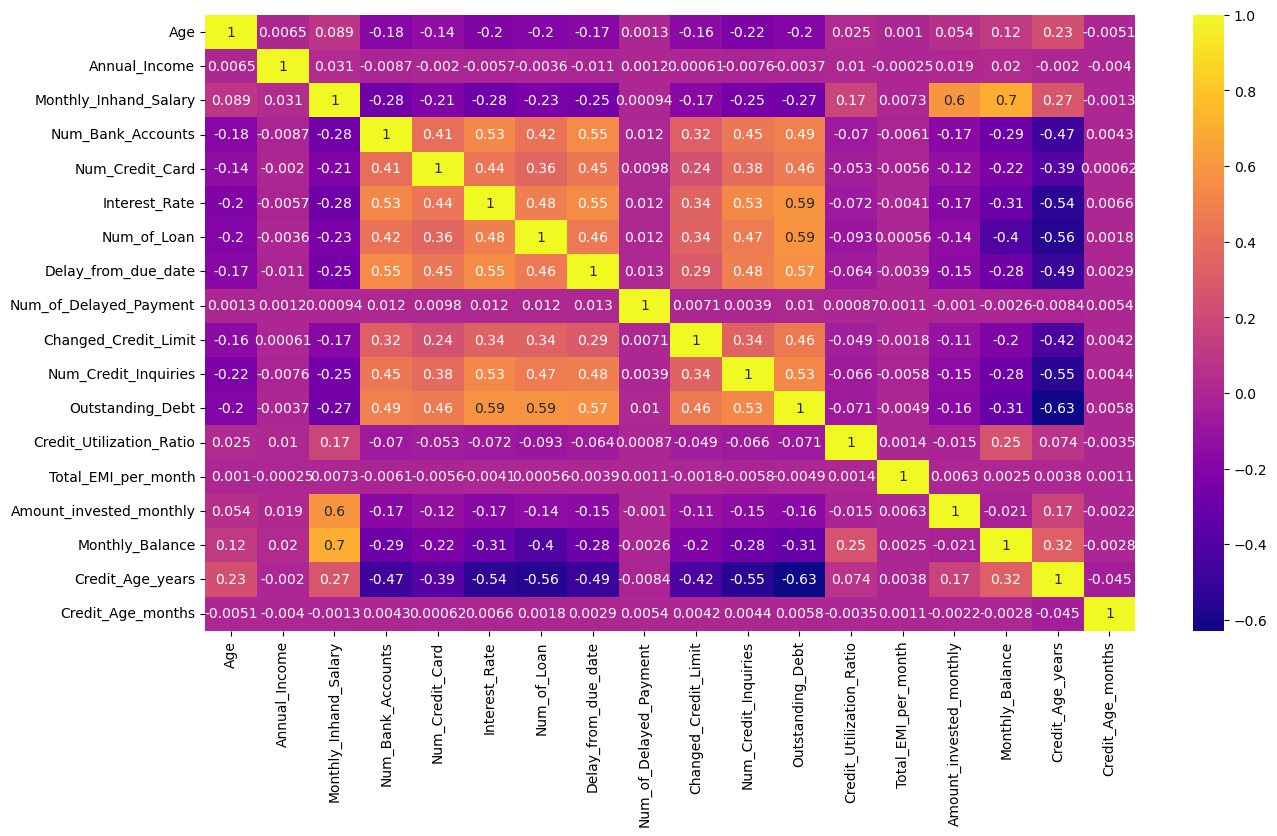

In [42]:
sns.heatmap(df_num.corr(),annot=True,cmap='plasma')
plt.show()

# Missing Values Analysis

In [43]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Monthly_Inhand_Salary       15.002
Credit_Age_months            9.030
Credit_Age_years             9.030
Payment_Behaviour            7.600
Num_of_Delayed_Payment       7.002
Num_of_Loan                  4.785
Amount_invested_monthly      4.479
Age                          2.776
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Monthly_Balance              1.200
Delay_from_due_date          0.000
Interest_Rate                0.000
Num_Credit_Card              0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Credit_Score                 0.000
Occupation                   0.000
Month                        0.000
dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       97224 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [45]:
#!pip install fancyimpute

In [46]:
from fancyimpute import KNN

In [47]:
df_knn = df.copy(deep = True)

In [48]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       97224 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [49]:
df_num = df_knn.select_dtypes(include = np.number)
df_num.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                  3   
1  23.0       19114.12                    NaN                  3   
2   NaN       19114.12                    NaN                  3   
3  23.0       19114.12                    NaN                  3   
4  23.0       19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3          4.0                    3   
1                4              3          4.0                   -1   
2                4              3          4.0                    3   
3                4              3          4.0                    5   
4                4              3          4.0                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     NaN                 11.27                   4.0   
2                     7.0                   NaN                   4.0   
3                     4.0                  6.27                   4.0   
4                     NaN                 11.27                   4.0   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0            809.98                 26.822620            49.574949   
1            809.98                 31.944960            49.574949   
2            809.98                 28.609352            49.574949   
3            809.98                 31.377862            49.574949   
4            809.98                 24.797347            49.574949   

   Amount_invested_monthly  Monthly_Balance  Credit_Age_years  \
0                80.415295       312.494089              22.0   
1               118.280222       284.629162               NaN   
2                81.699521       331.209863              22.0   
3               199.458074       223.451310              22.0   
4                41.420153       341.489231              22.0   

   Credit_Age_months  
0                1.0  
1                NaN  
2                3.0  
3                4.0  
4                5.0

In [50]:
sc = StandardScaler()
df_num_scaled  = pd.DataFrame(sc.fit_transform(df_num), columns = df_num.columns)

In [51]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 5)
df_num_scaled = pd.DataFrame(imputer.fit_transform(df_num_scaled), columns = df_num_scaled.columns)

In [52]:
df_num = pd.DataFrame(sc.inverse_transform(df_num_scaled), columns = df_num_scaled.columns)

In [53]:
df_num.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

In [54]:
import scipy
from scipy.stats import skew

In [55]:
#Skewness of numerical columns after KNN imputation
df_num.skew()

Age                          0.164280
Annual_Income               12.512173
Monthly_Inhand_Salary        1.163219
Num_Bank_Accounts           -0.177146
Num_Credit_Card              0.257632
Interest_Rate                0.521691
Num_of_Loan                  0.492186
Delay_from_due_date          0.966395
Num_of_Delayed_Payment      14.573655
Changed_Credit_Limit         0.643426
Num_Credit_Inquiries         0.762491
Outstanding_Debt             1.207536
Credit_Utilization_Ratio     0.028617
Total_EMI_per_month          7.102524
Amount_invested_monthly      2.571089
Monthly_Balance              1.596442
Credit_Age_years            -0.063484
Credit_Age_months           -0.007393
dtype: float64

In [56]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])

In [57]:
df_cat = df.select_dtypes(exclude = np.number)

In [58]:
df=pd.concat([df_num, df_cat],axis=1)
df.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1976.265167                3.0   
2  31.8       19114.12            1929.969500                3.0   
3  23.0       19114.12            2911.331167                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                 -1.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     8.0                 11.27                   4.0   
2                     7.0                  9.05                   4.0   
3                     4.0                  6.27                   4.0   
4                     5.6                 11.27                   4.0   

   Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0            809.98                 26.822620            49.574949   
1            809.98                 31.944960            49.574949   
2            809.98                 28.609352            49.574949   
3            809.98                 31.377862            49.574949   
4            809.98                 24.797347            49.574949   

   Amount_invested_monthly  Monthly_Balance  Credit_Age_years  \
0                80.415295       312.494089              22.0   
1               118.280222       284.629162              23.0   
2                81.699521       331.209863              22.0   
3               199.458074       223.451310              22.0   
4                41.420153       341.489231              22.0   

   Credit_Age_months     Month Occupation Credit_Mix Payment_of_Min_Amount  \
0                1.0   January  Scientist      Other                    No   
1                6.2  February  Scientist       Good                    No   
2                3.0     March  Scientist       Good                    No   
3                4.0     April  Scientist       Good                    No   
4                5.0       May  Scientist       Good                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

# Univariate & Bivariate Analysis

In [59]:
cols=df.select_dtypes(include=np.number).columns.tolist()

In [60]:
cols_cat=df.select_dtypes(exclude=np.number).columns.tolist()
cols_cat

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [61]:
cols # Numerical columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

In [62]:
# Inferences

In [63]:
# Numerical

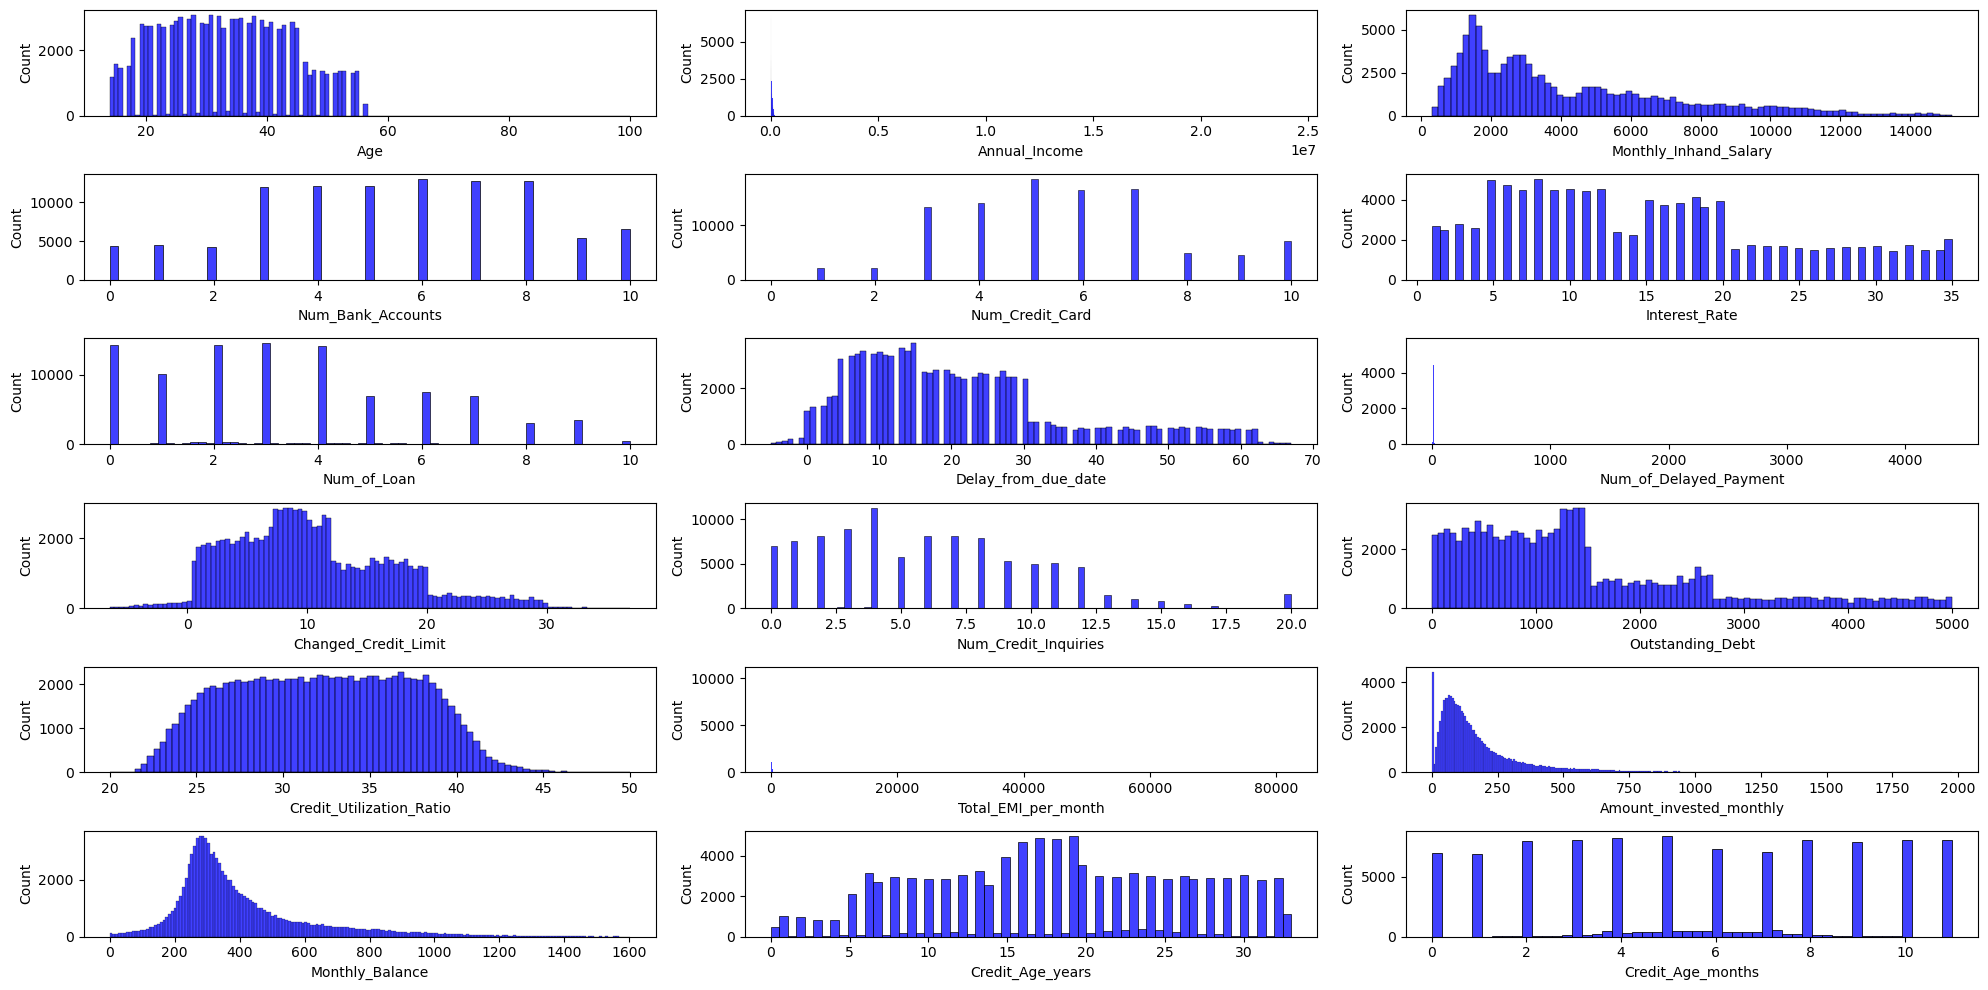

In [64]:
fig, ax= plt.subplots(6,3, figsize=(20,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(x=df[i],color='blue', ax=subplot)
    
plt.tight_layout()
plt.show()

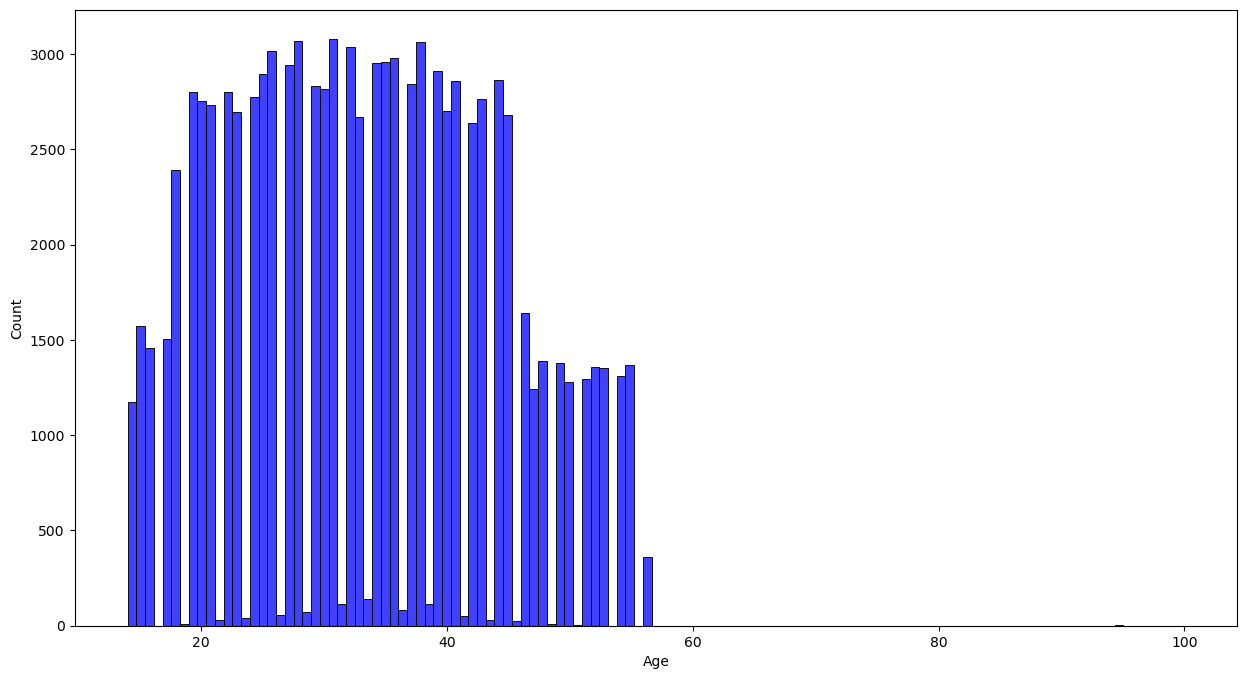

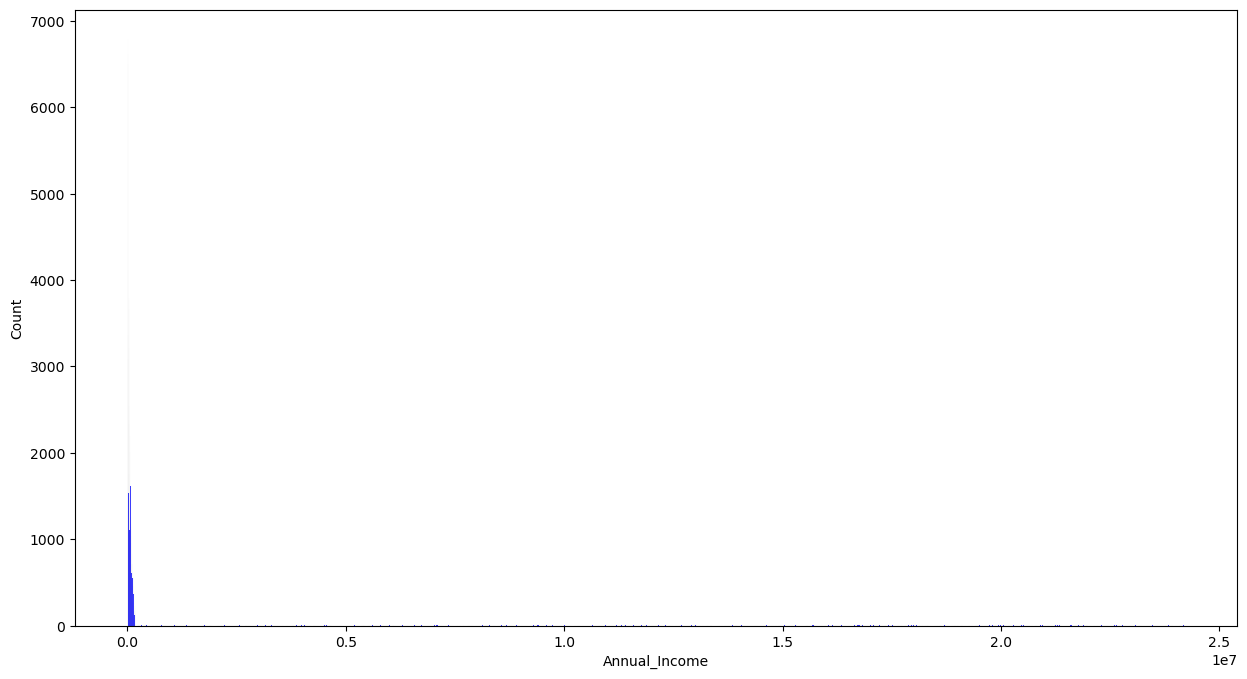

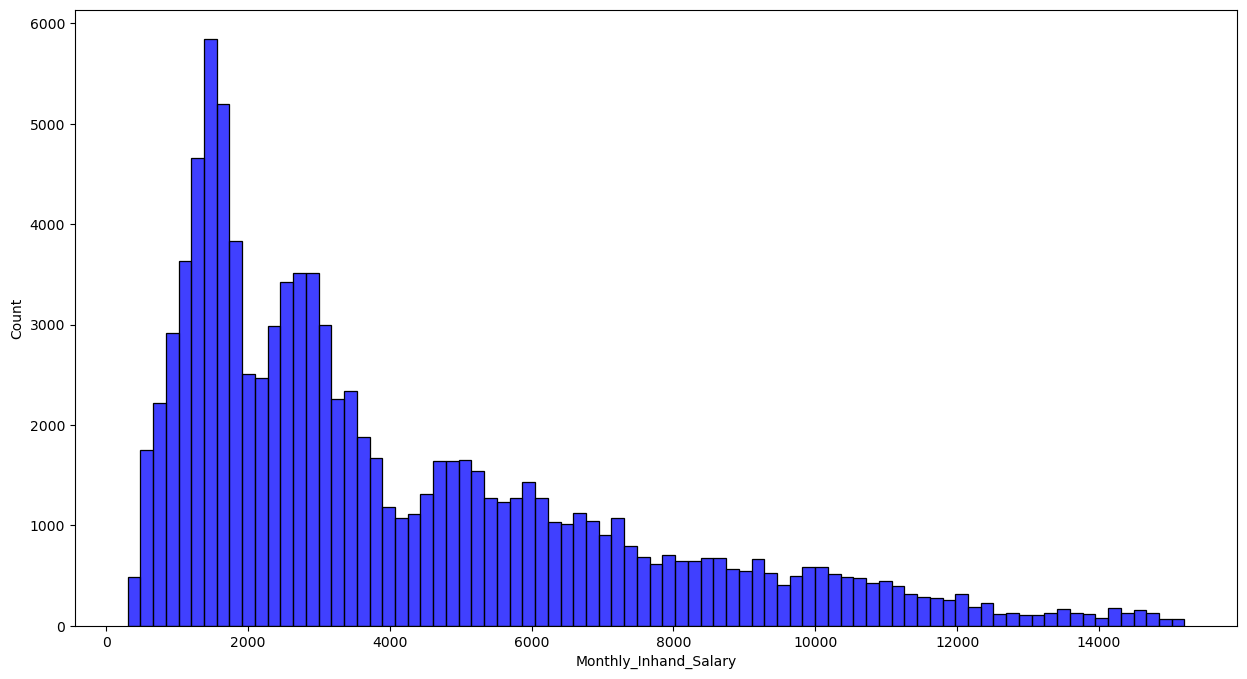

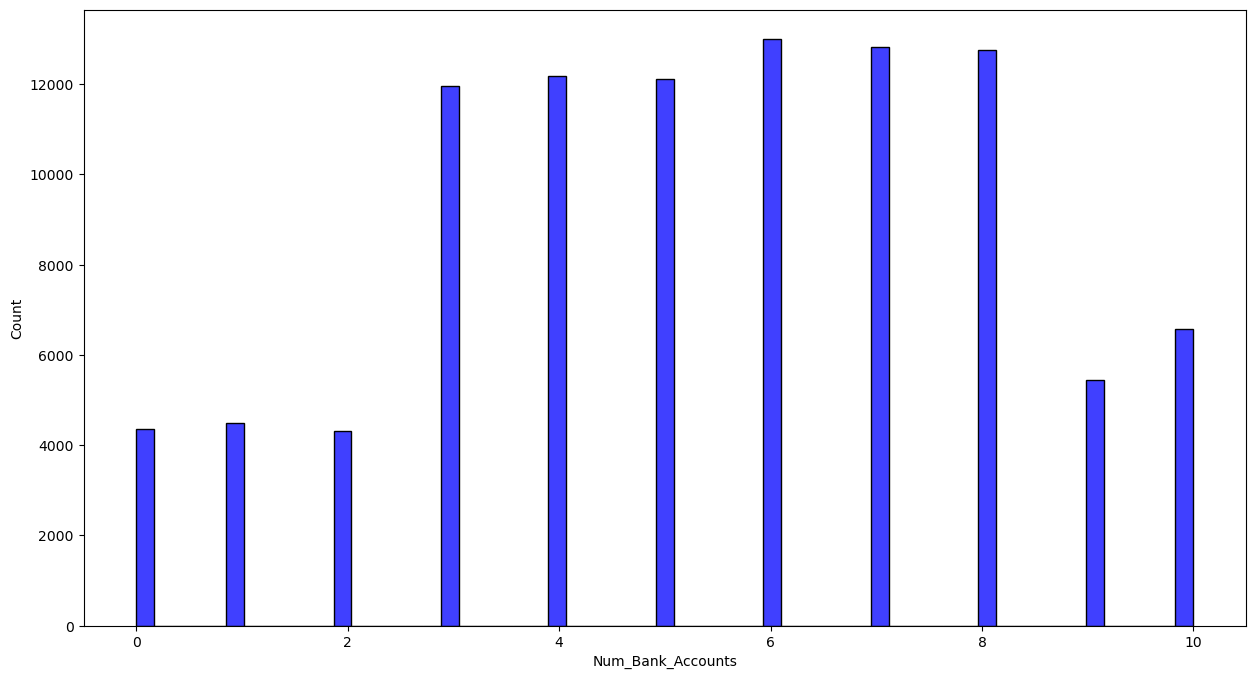

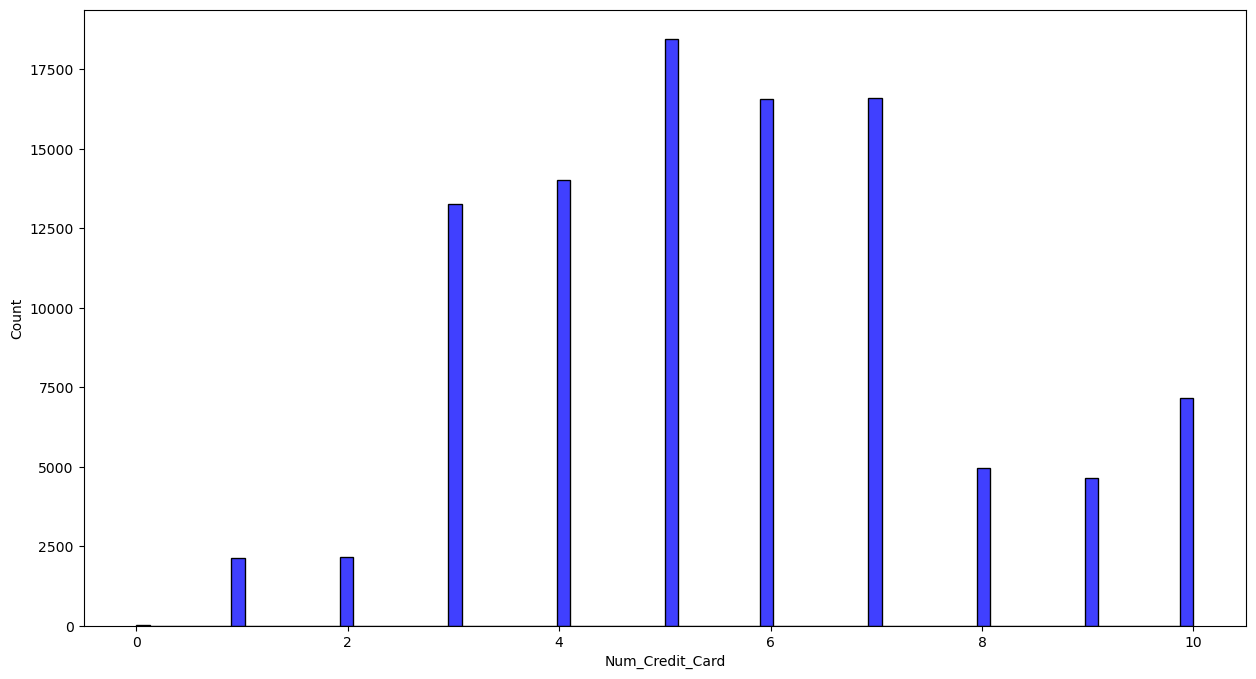

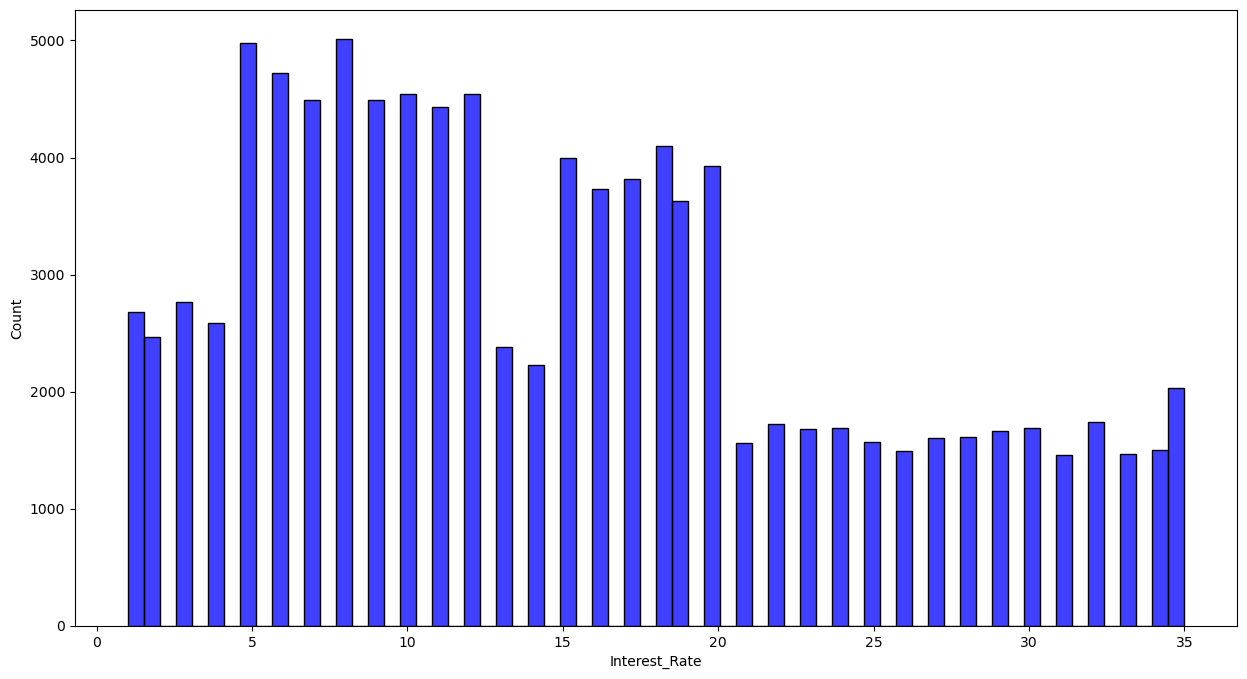

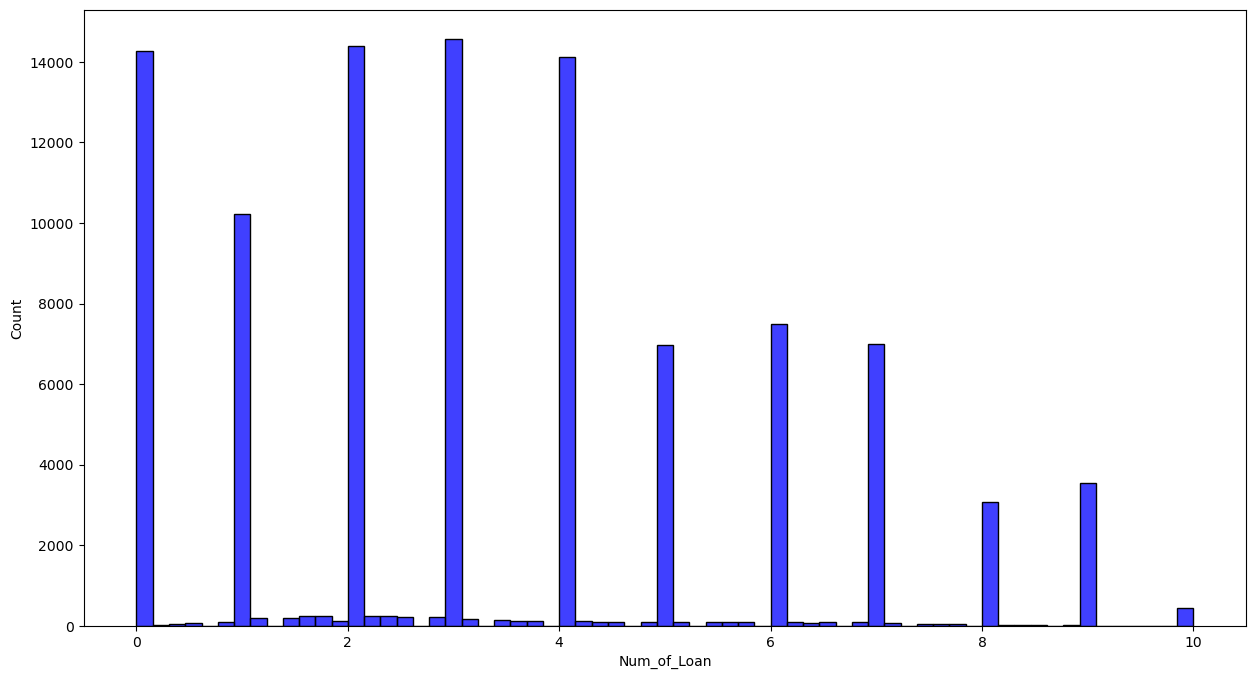

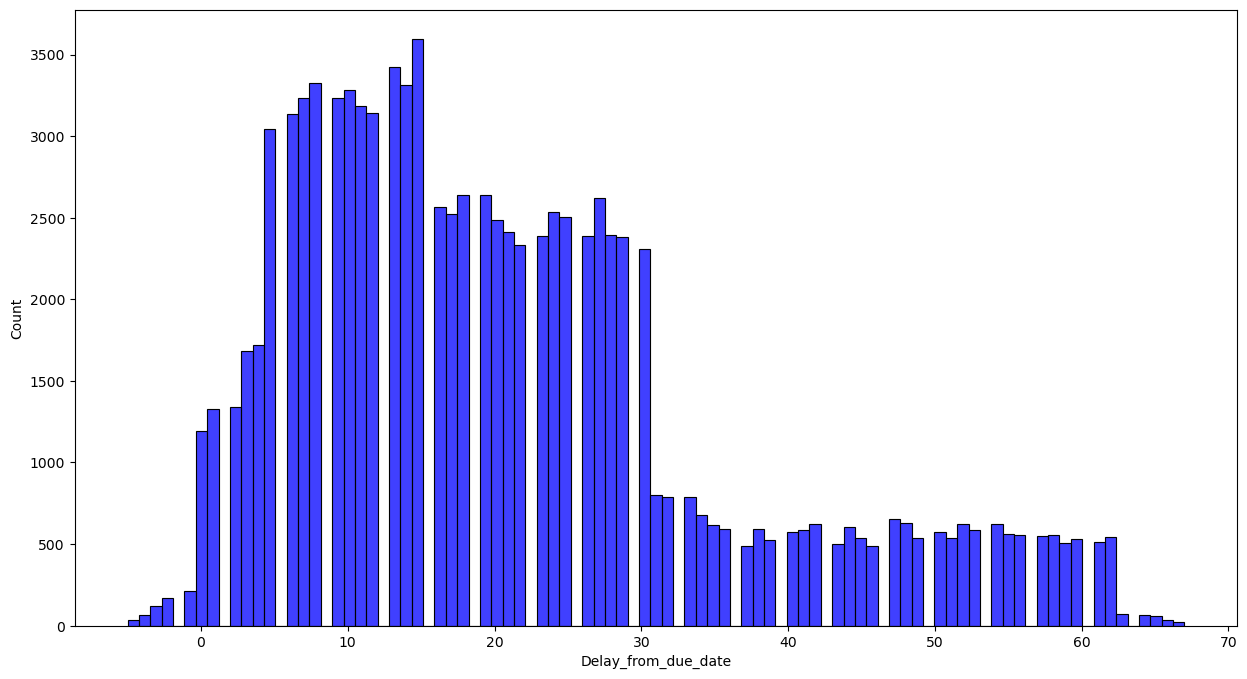

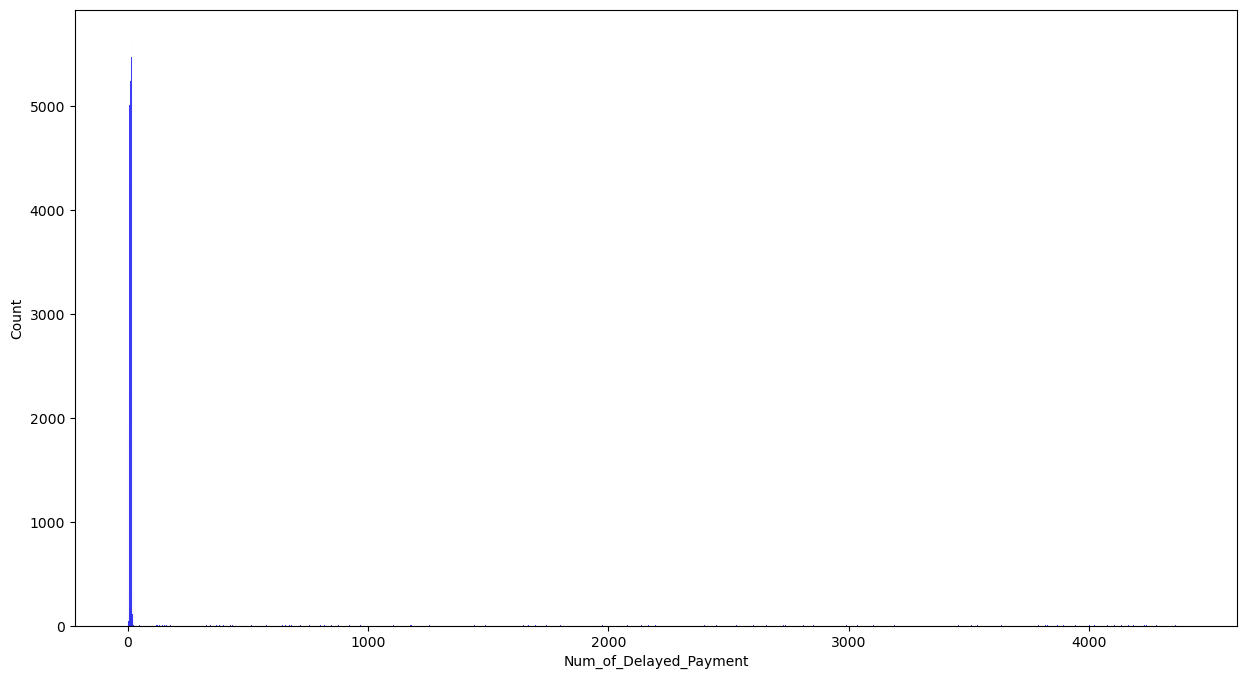

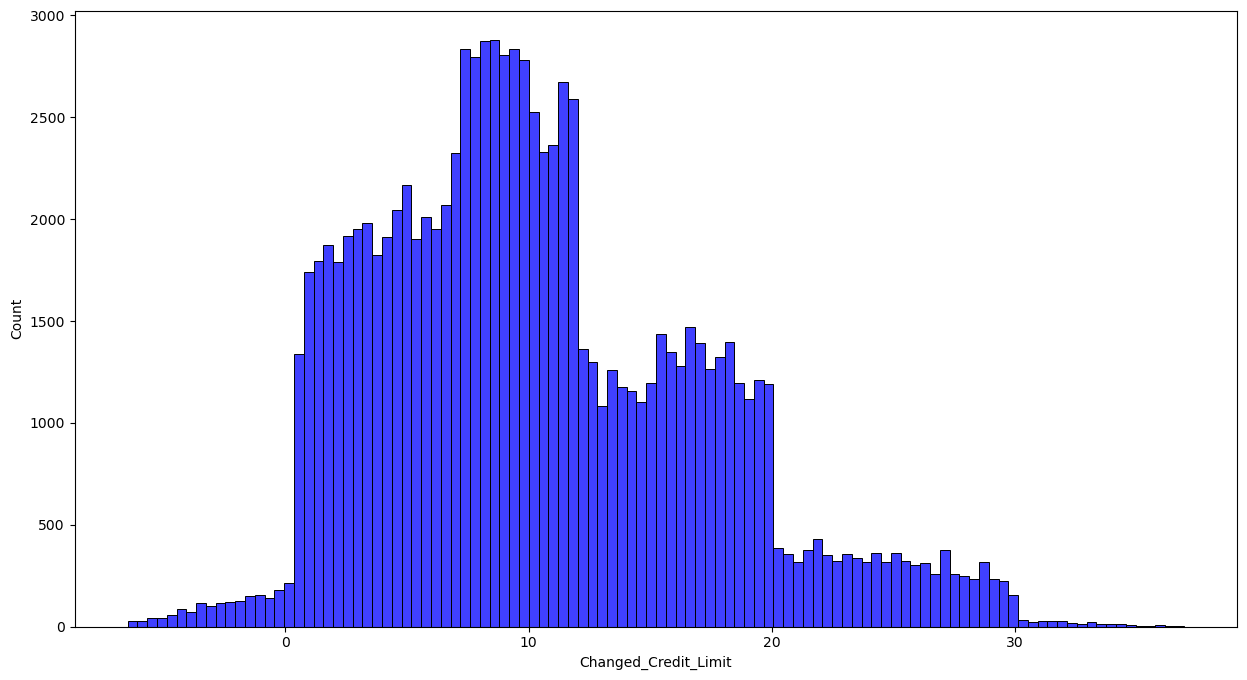

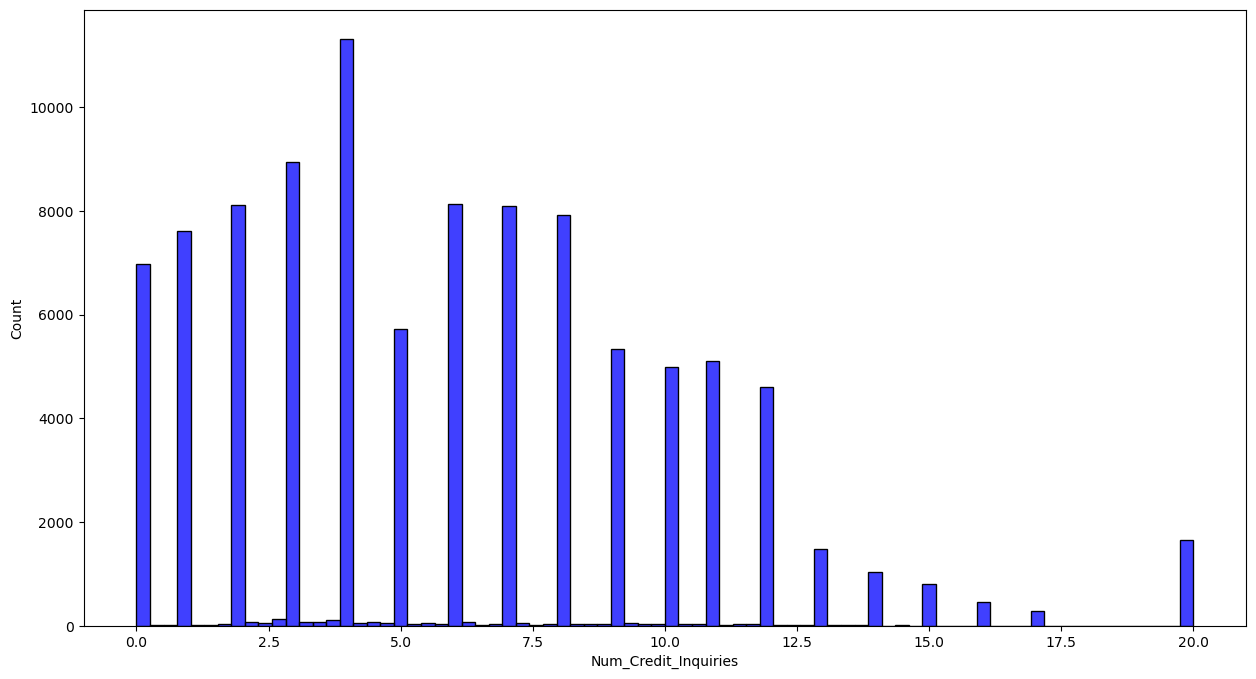

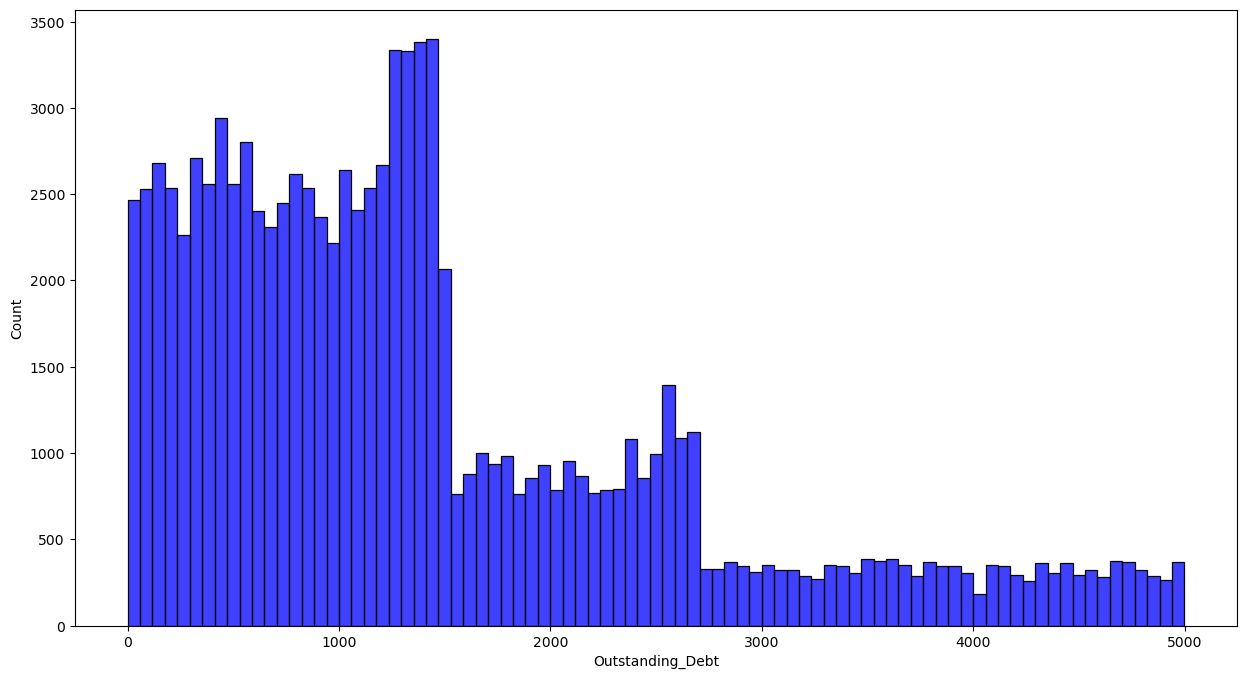

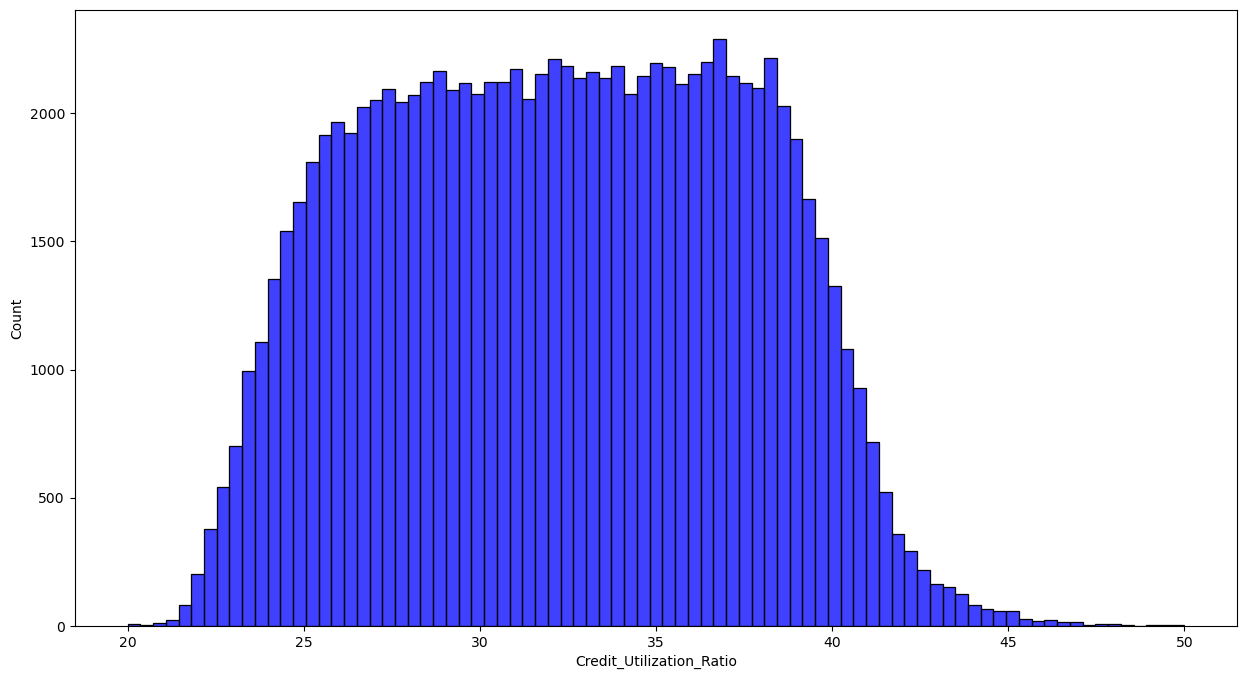

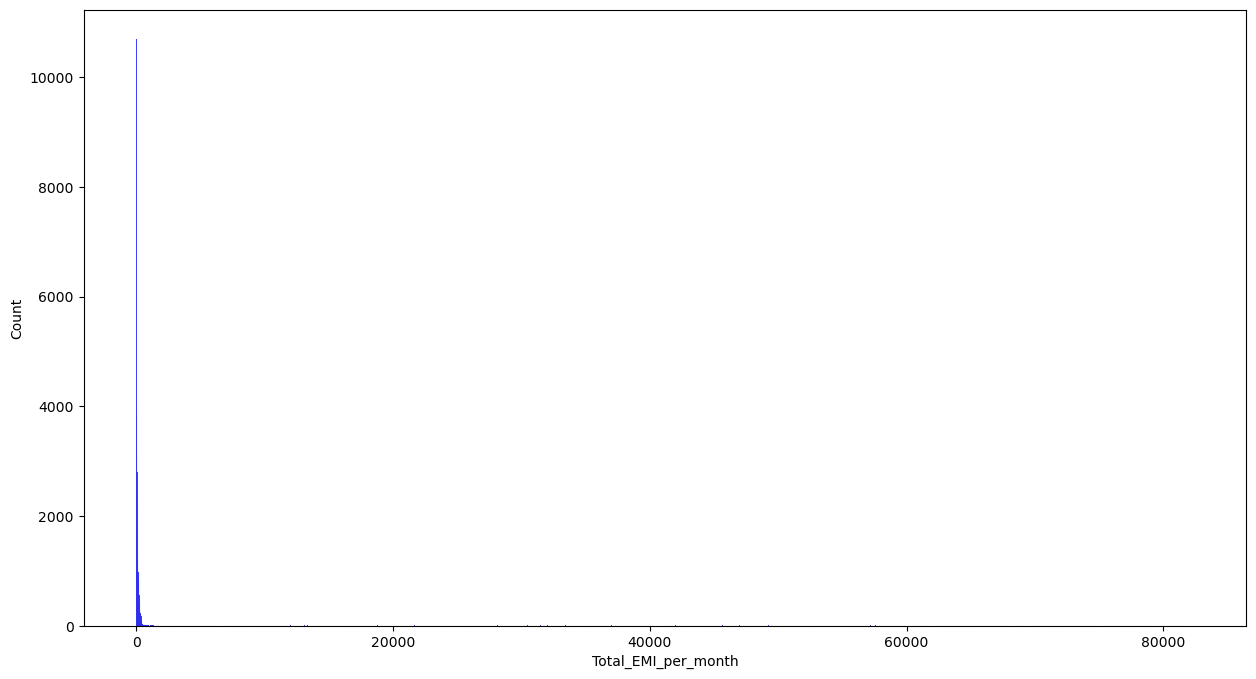

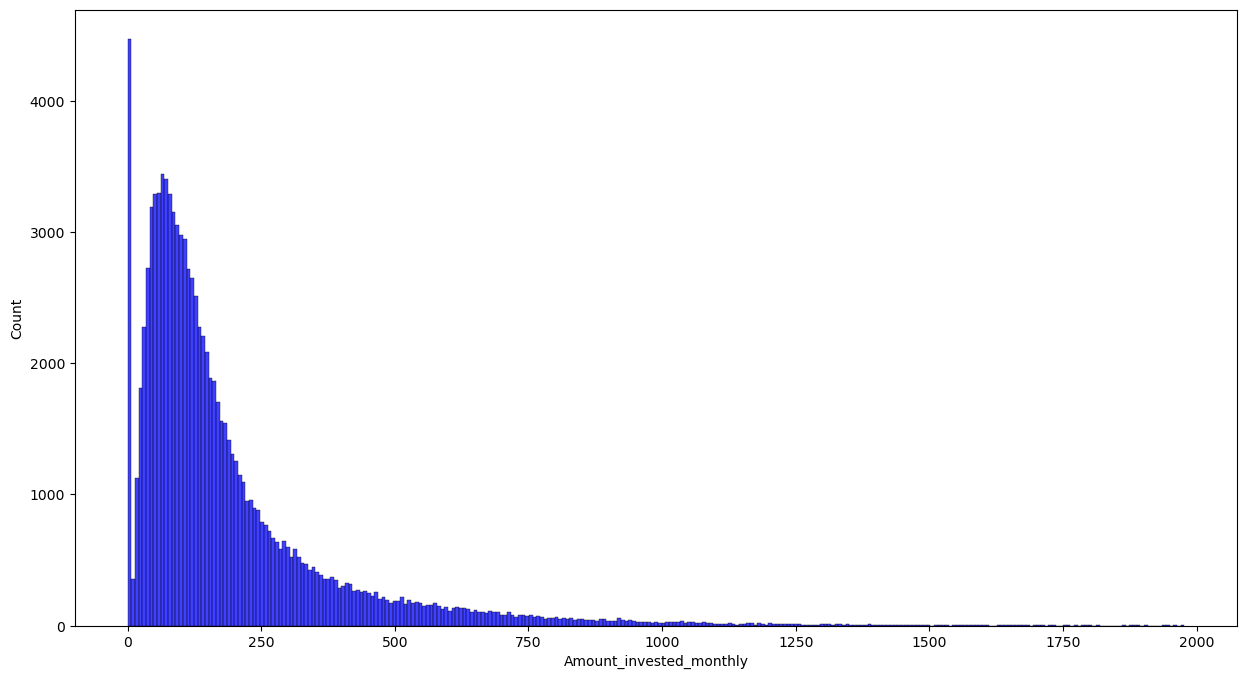

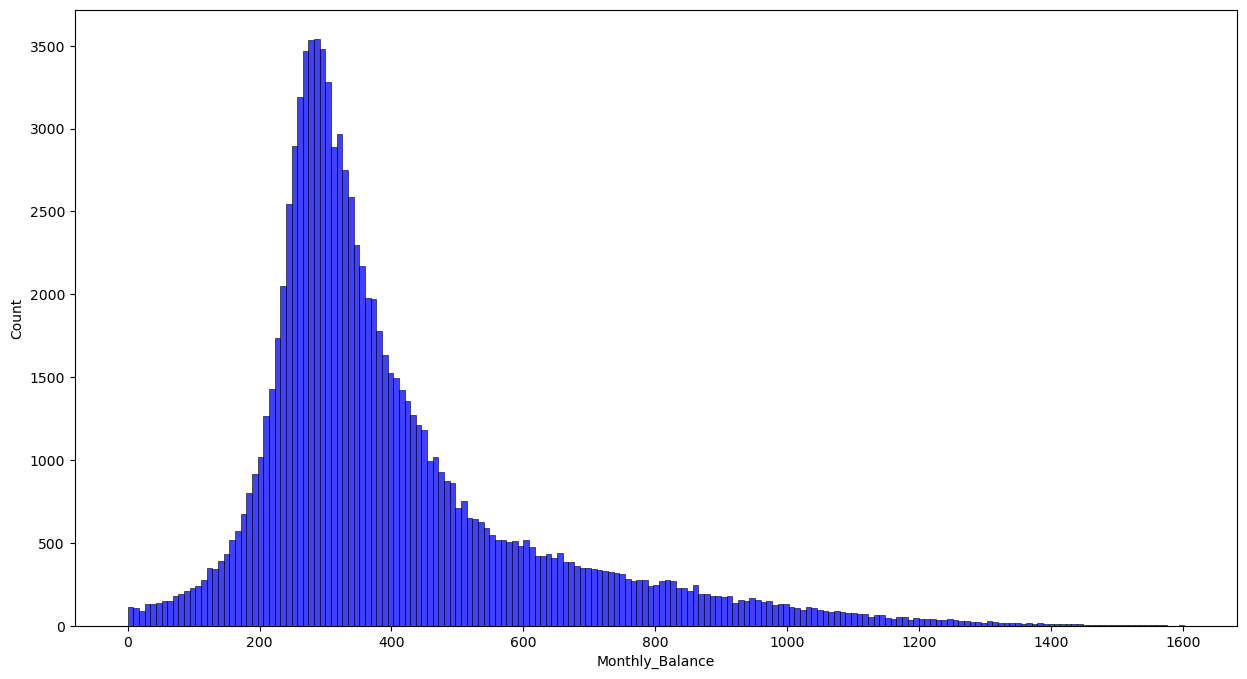

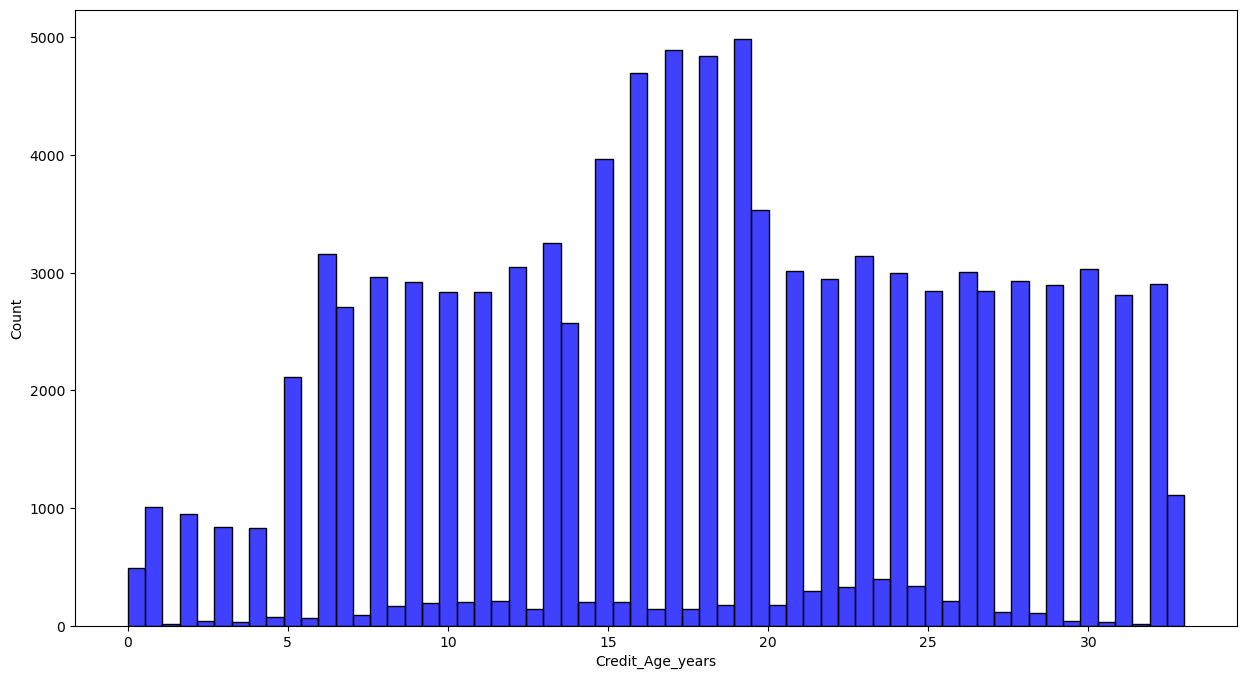

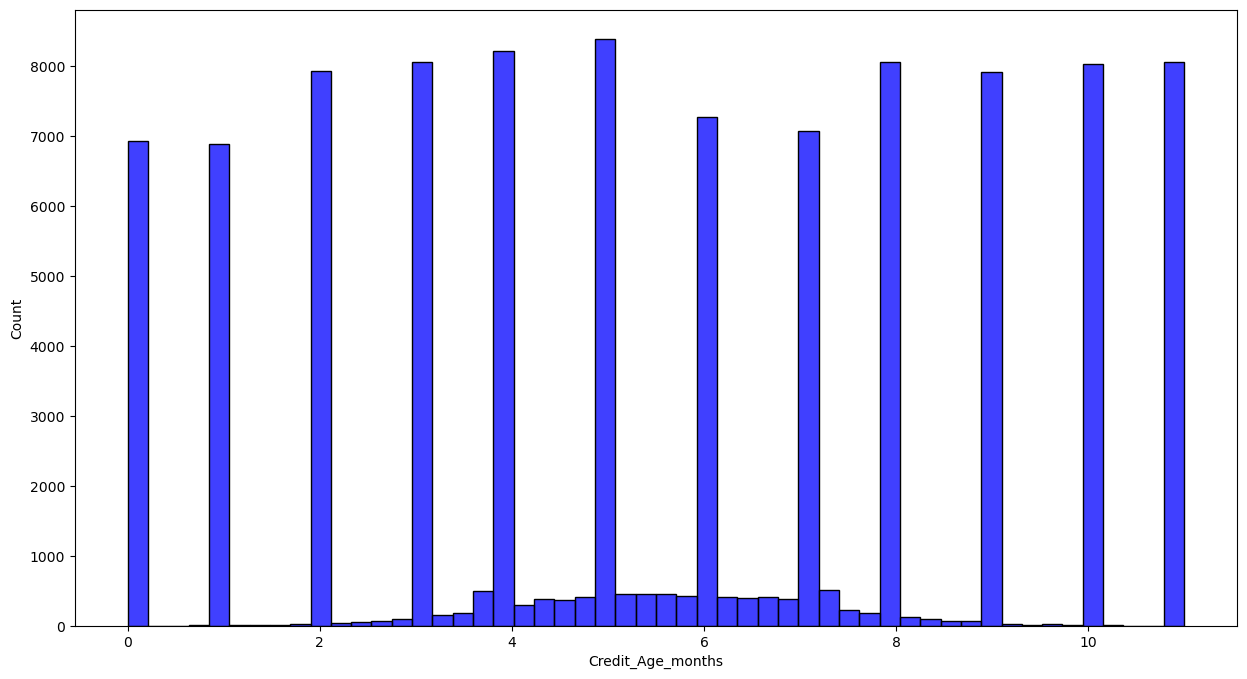

In [65]:
for i in cols:
    sns.histplot(x=df[i],color='blue')
    plt.show()

#### Inferences (age)
-> 75 percentile of the individuals are having age below 41
-> 25 percentile of the individuals are having age under 25
-> 50 percentile of the individuals are having age is around 33
-> Some of the individuals are having age of 100

#### Inferences (Annual Income)
-> The average income of individual is around 175000
-> The minimum income of individual is found to be 7000

#### Inferences (In_hand_salary)
-> The average salary inhand hand salary is around 3000
-> The minimum salary of an individual found to be 300

#### Inferences (Change in Credit Limit)
-> based on the peak, it observed that the change in the credit limit is approxmiately between 8 to 11


#### Inferences (outstanding debt)
-> The most of the individuals are having outstanding debt 1000 to 1500 

#### Inferences (Credit_Utilization_ratio)

-> Large group of individuals have utilized credit ratio between 22 percent to around 40 percent

#### Inferences (Amount_invested_monthly)

-> The individuals have invested upto 2000 per month

#### Inferences (Monthly Balance)

-> The individuals have average around is 400 per month

#### Inferences (Credit_age_years)

-> The individuals have average tenure of credit history in terms of year is around 18
-> Some individuals have maximum tenure of credit history in terms of year approximately  30


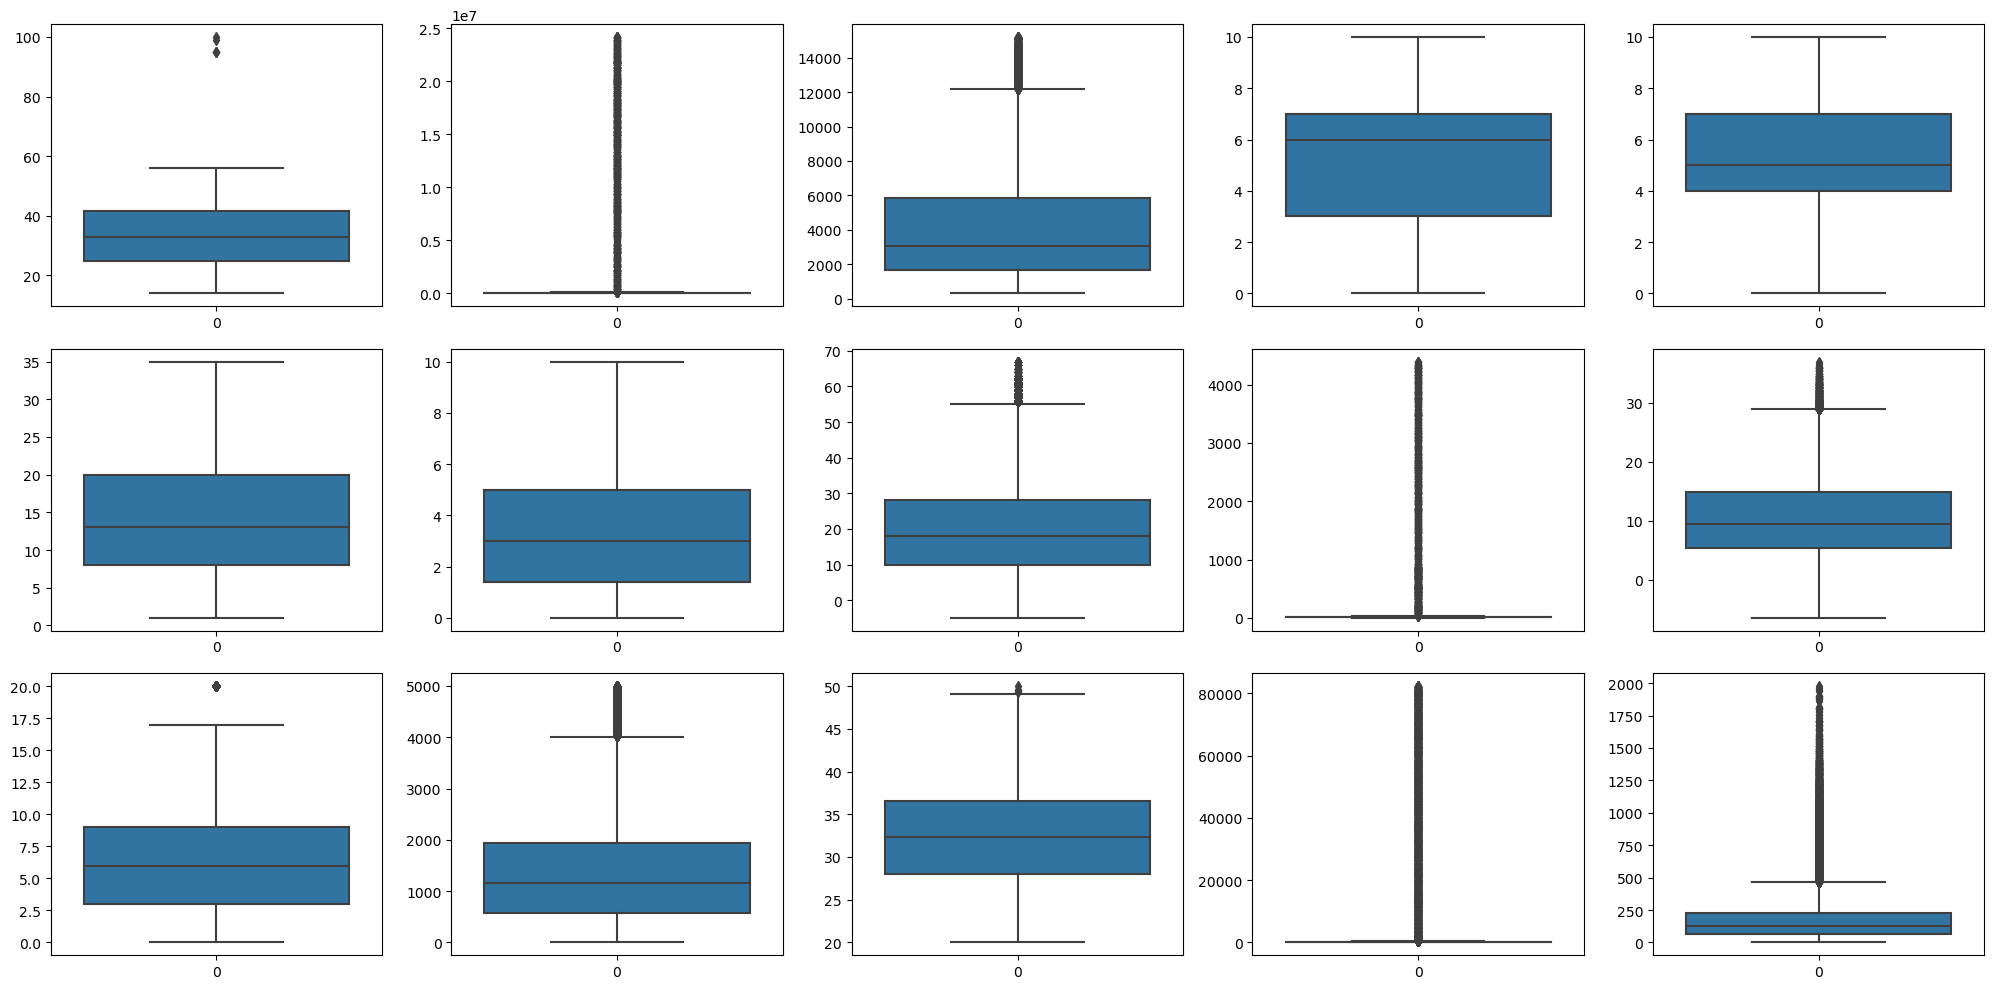

In [66]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    
plt.tight_layout()
plt.show()

In [67]:
cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

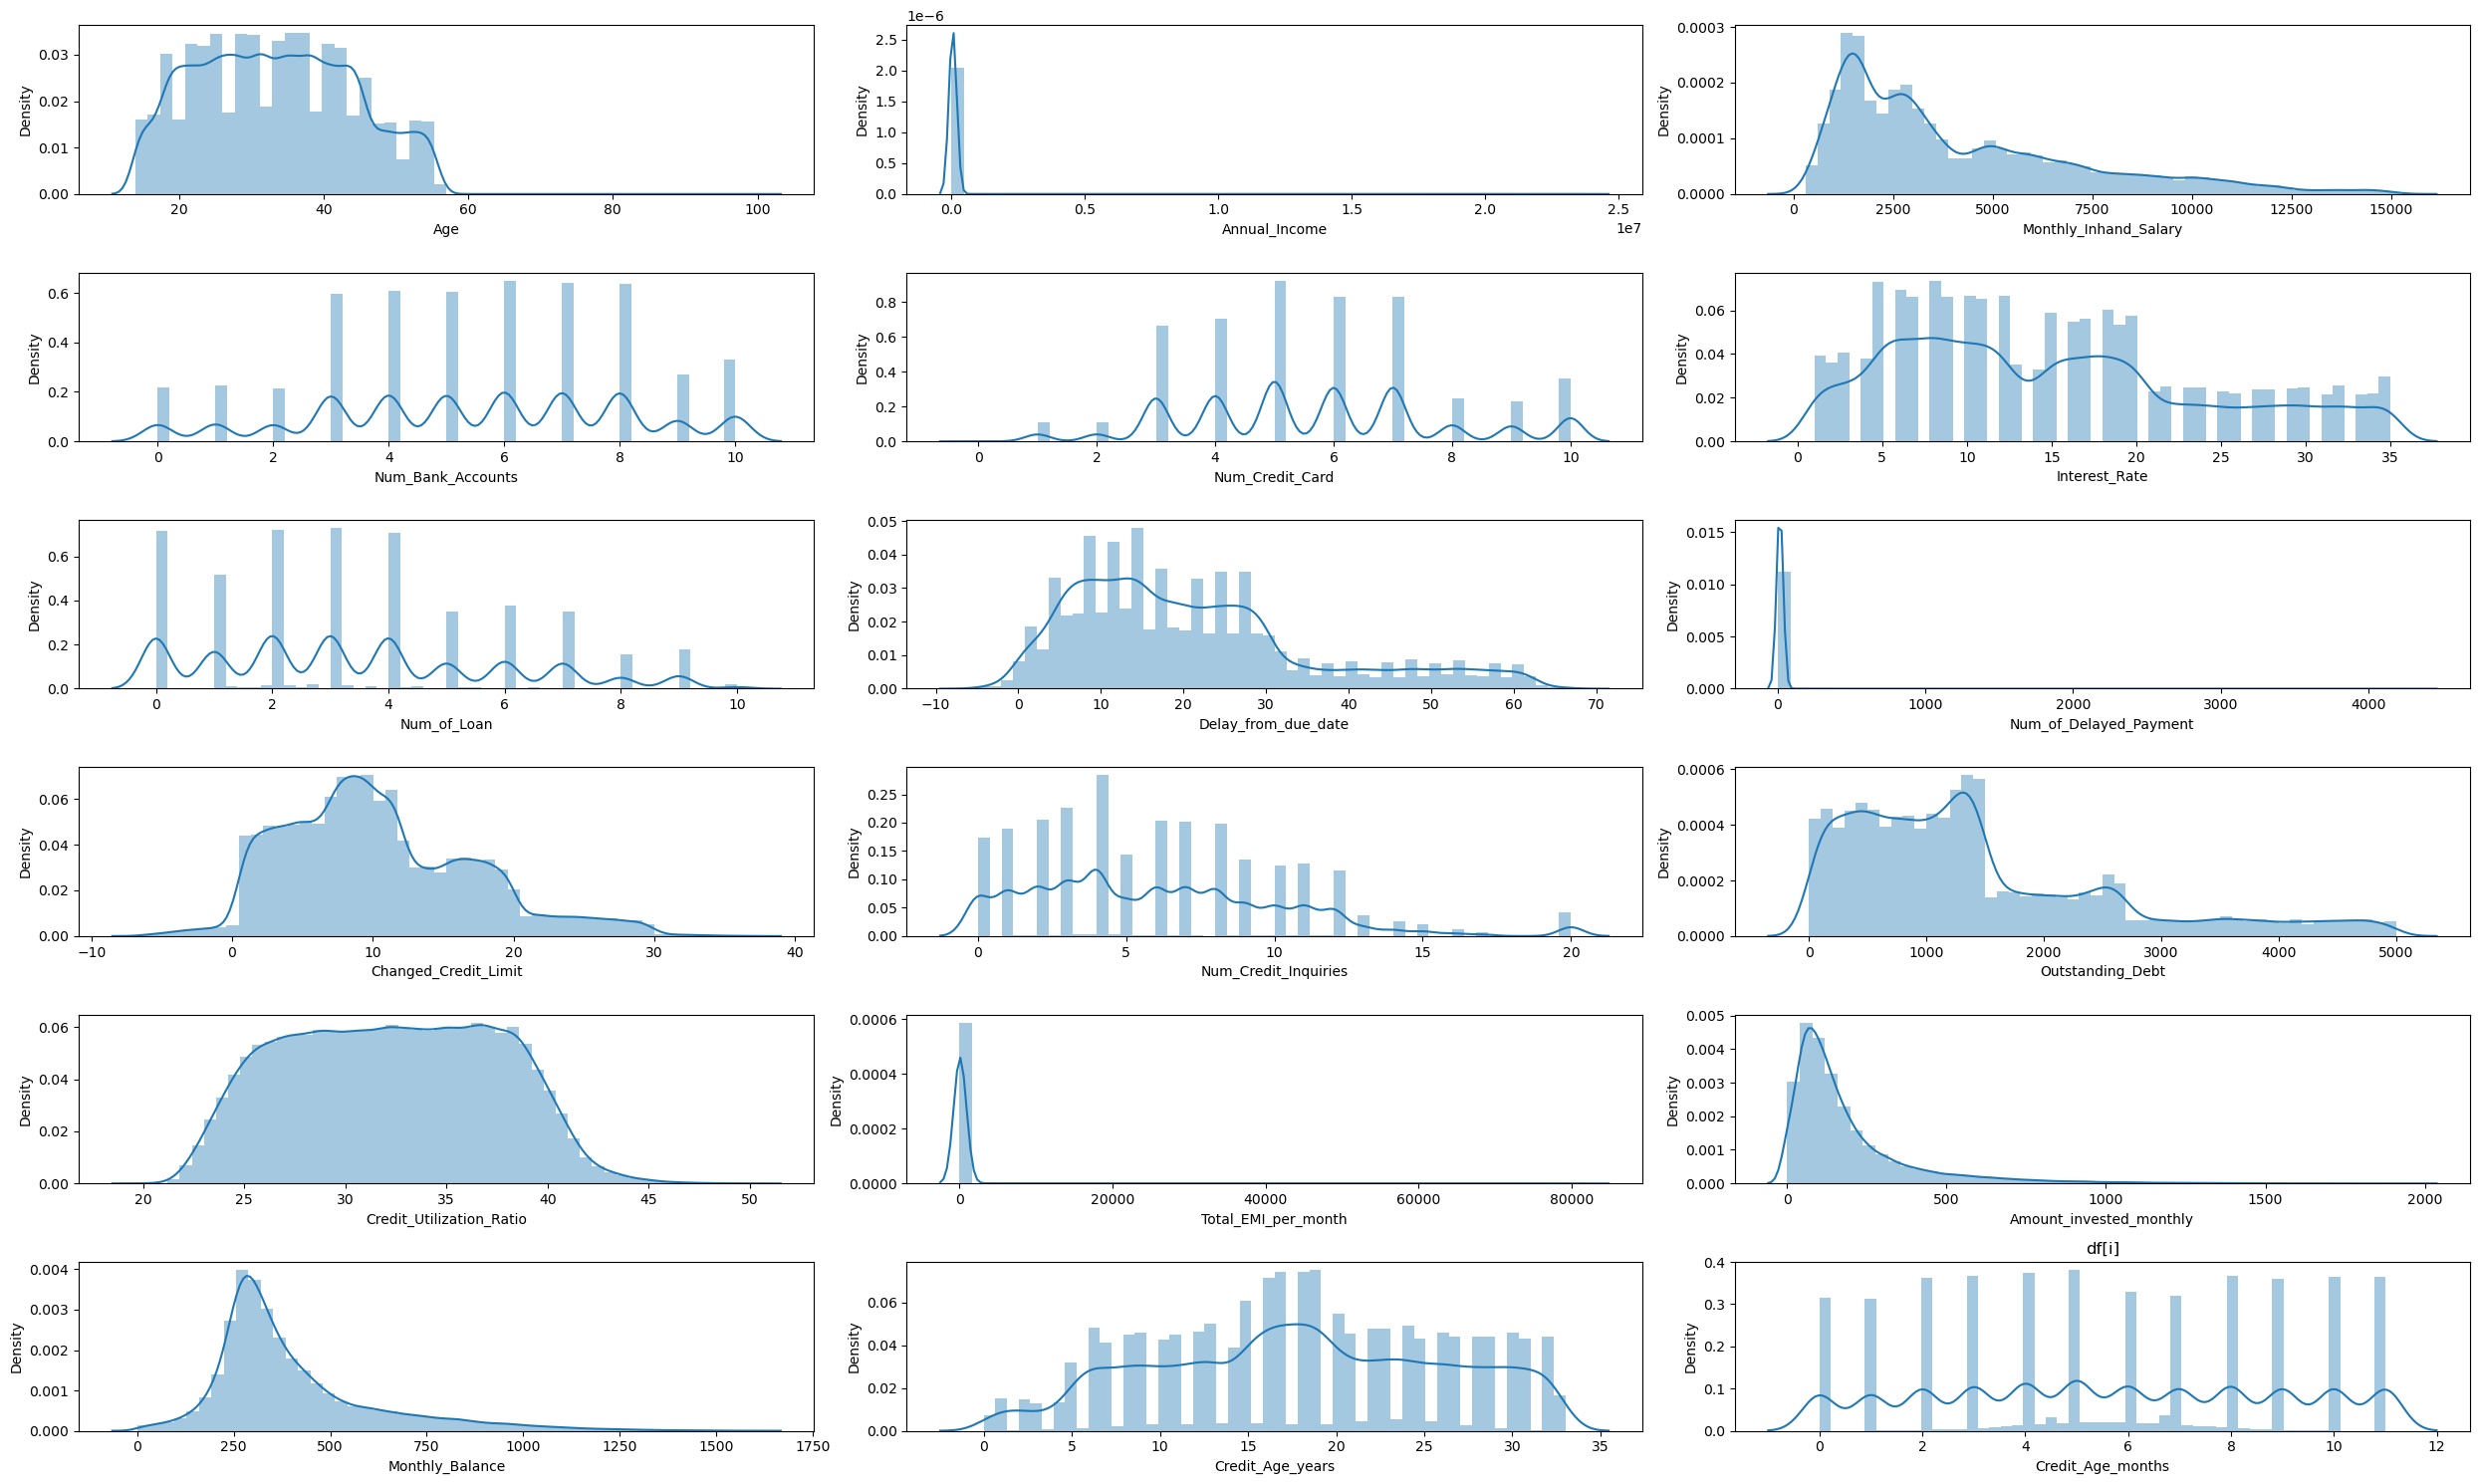

In [68]:
fig, ax= plt.subplots(6,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

#### Inferences (age)
-> the distribution of data spread is found right skewed which indicates the presence of the outliers 


#### Inferences (Annual Income)
-> the distribution of data spread is found to be heavily right skewed which indicates the presence of the outliers


#### Inferences (In_hand_salary)
-> the distribution of data spread is towards right which indicates the presence of the outliers

#### Inferences (Change in Credit Limit)
-> based on the data spread, it towards right tail which indicates the presence of the outliers


#### Inferences (outstanding debt)
-> Heavily right skewed, since the tail has extented towards right which indicates the presence of the outliers

#### Inferences (Credit_Utilization_ratio)

-> Moderate right skewed (rougly bell shaped) which indicates the presence of the outliers

#### Inferences (Amount_invested_monthly)

-> The majority of data points are concentrated on the right side of the distribution, representing the most of the extreme values on the right side.

#### Inferences (Monthly Balance)

-> Highly right skewed, representing the most of the extreme values



In [69]:
cols_cat

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

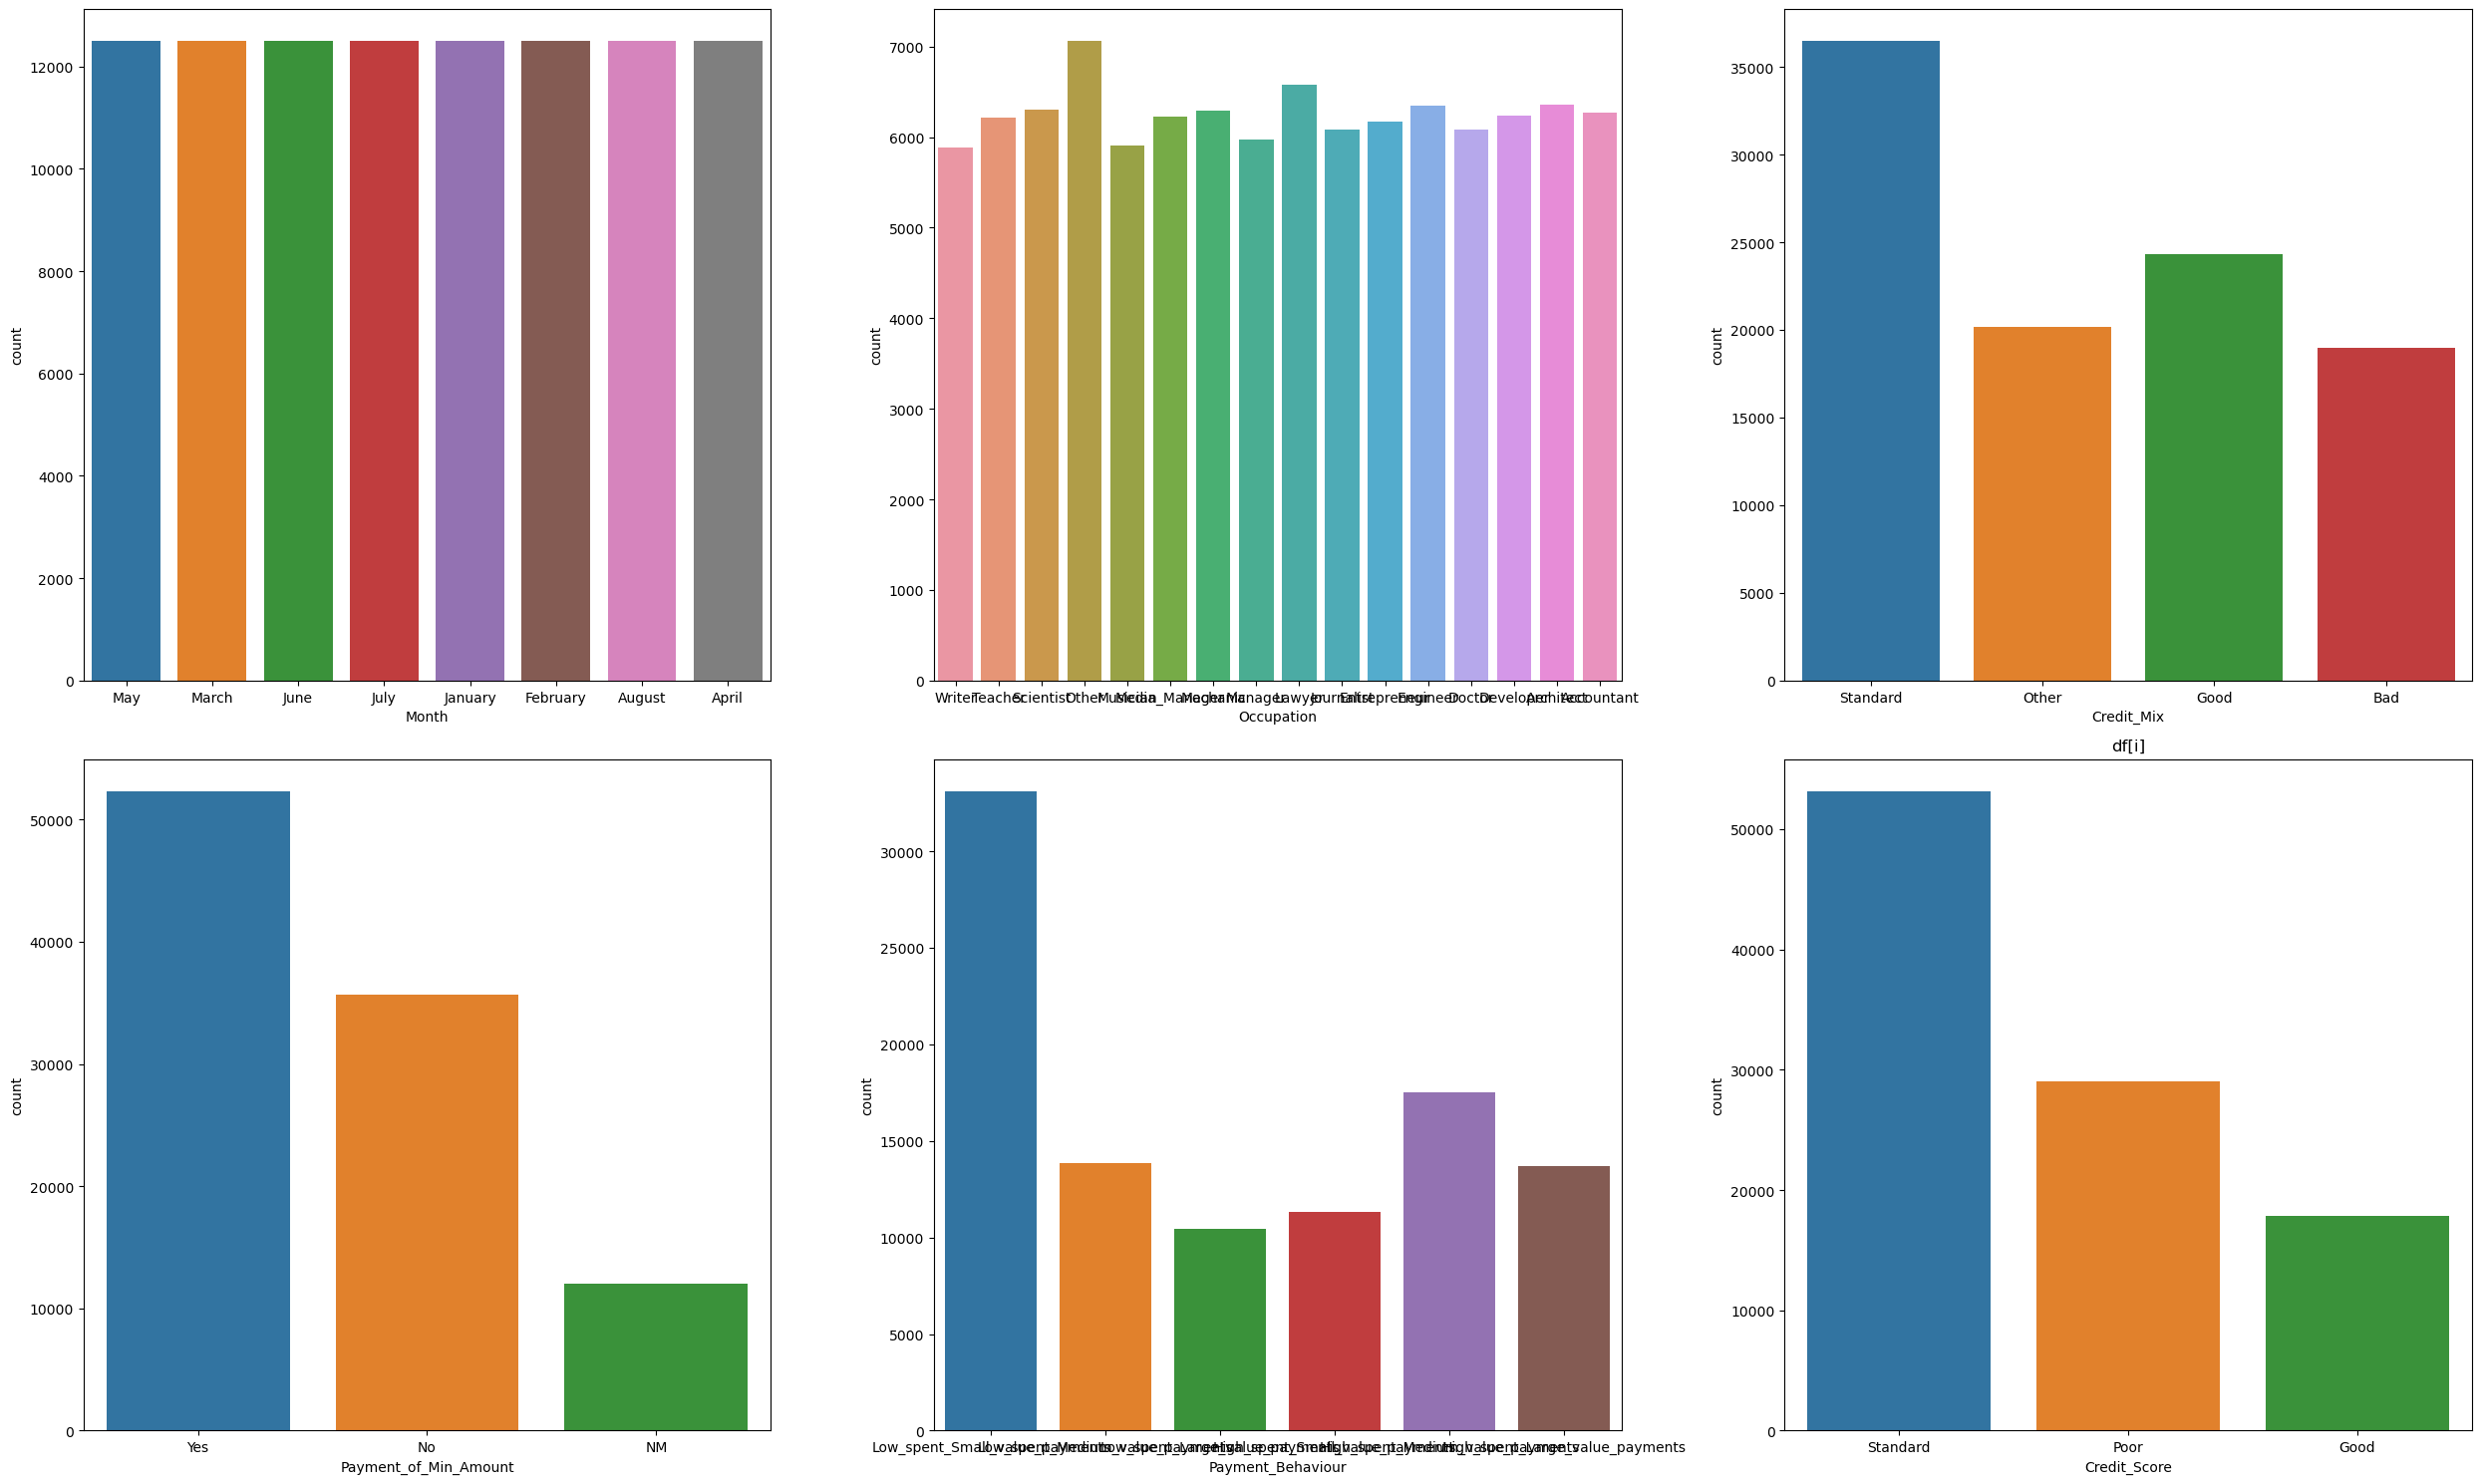

In [70]:
fig, ax= plt.subplots(2,3, figsize=(25,15))

for i, subplot in zip(cols_cat, ax.flatten()):
    sns.countplot(x=df[i].sort_values(ascending=False),ax=subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

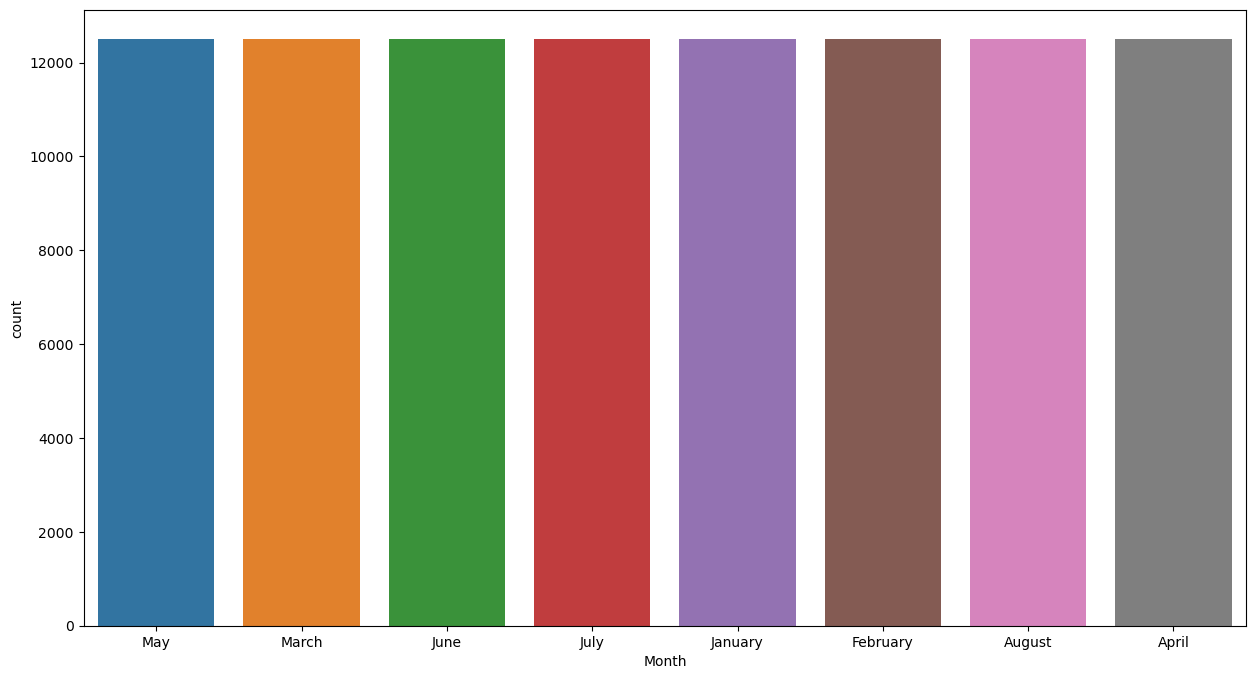

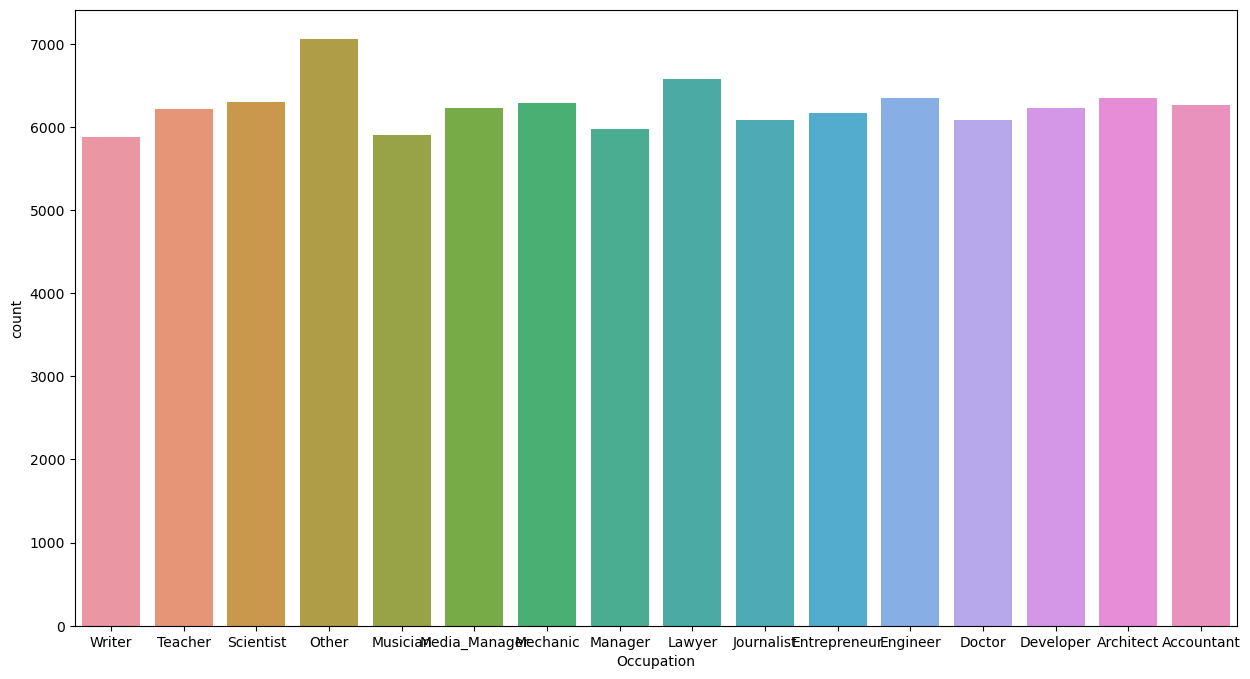

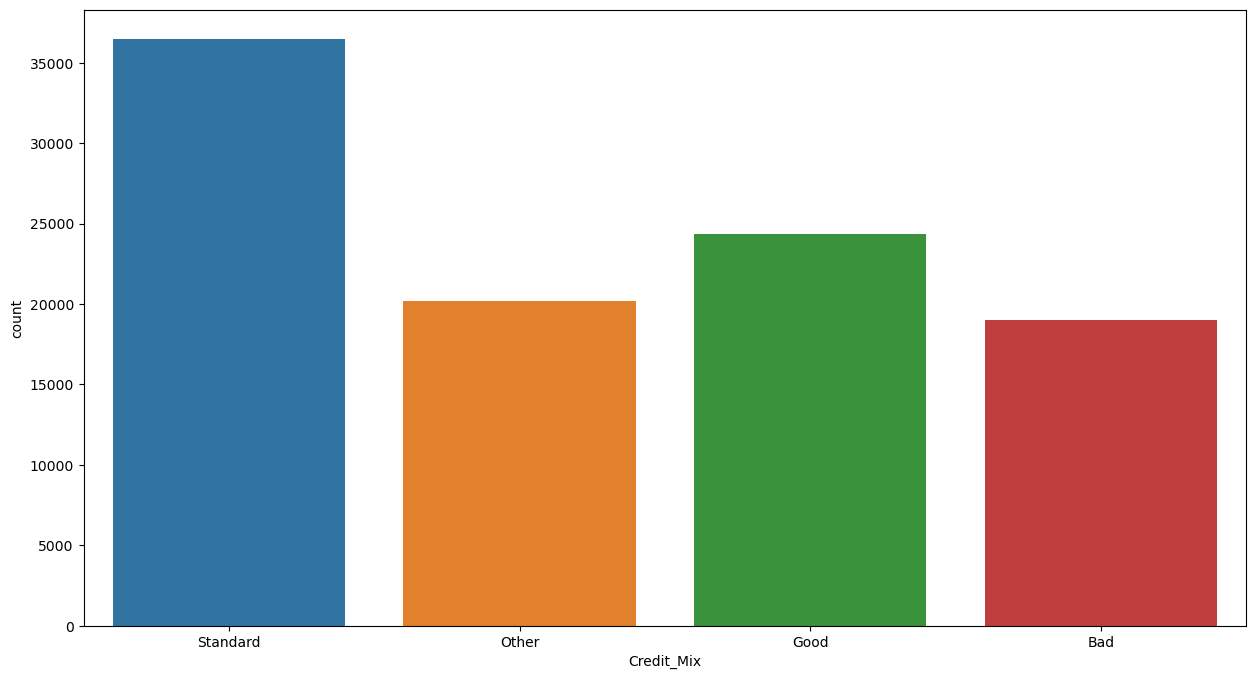

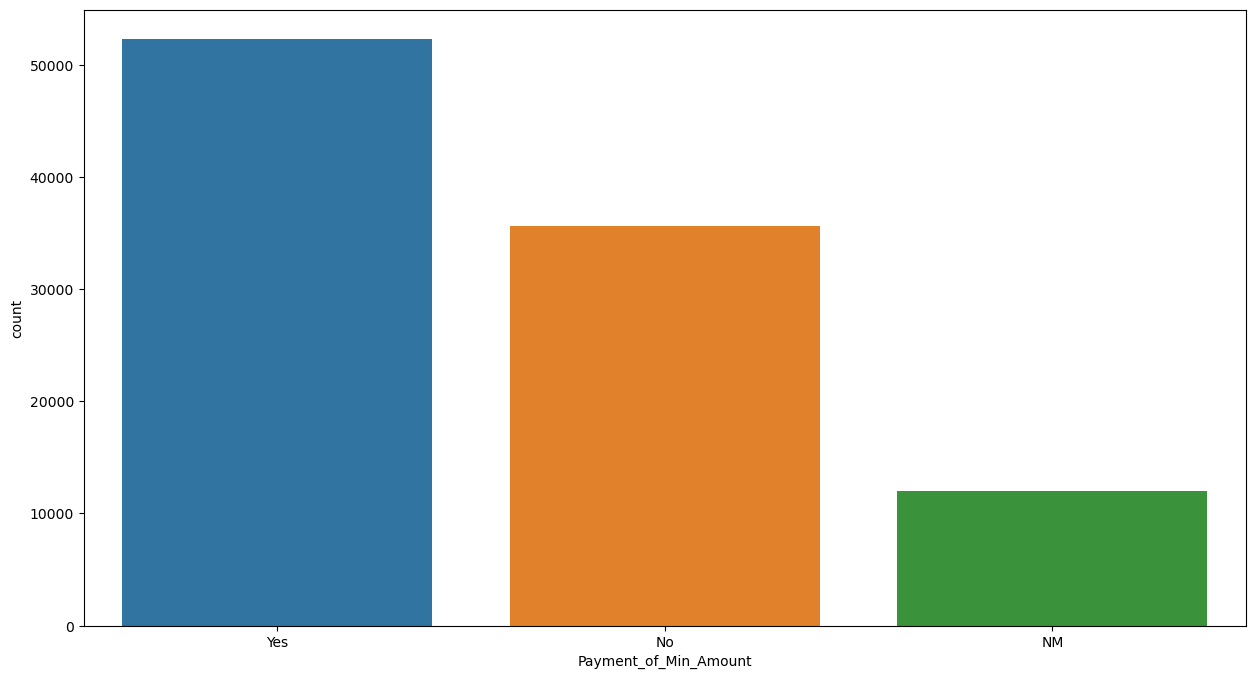

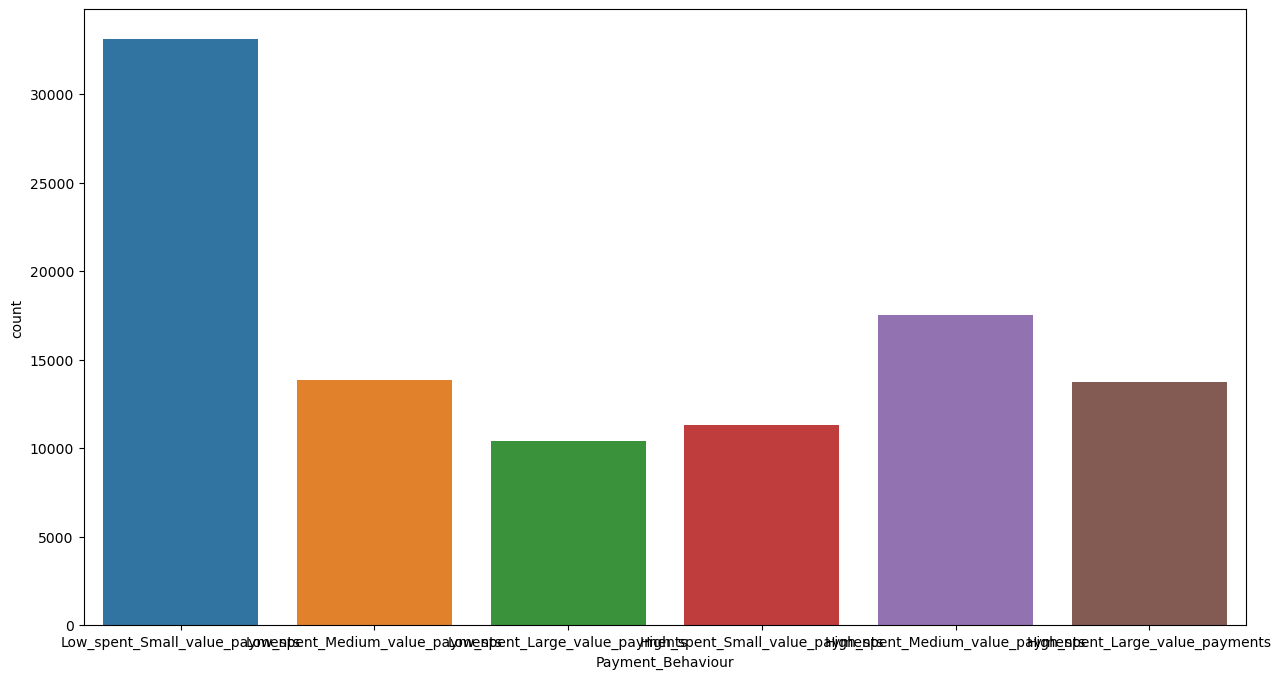

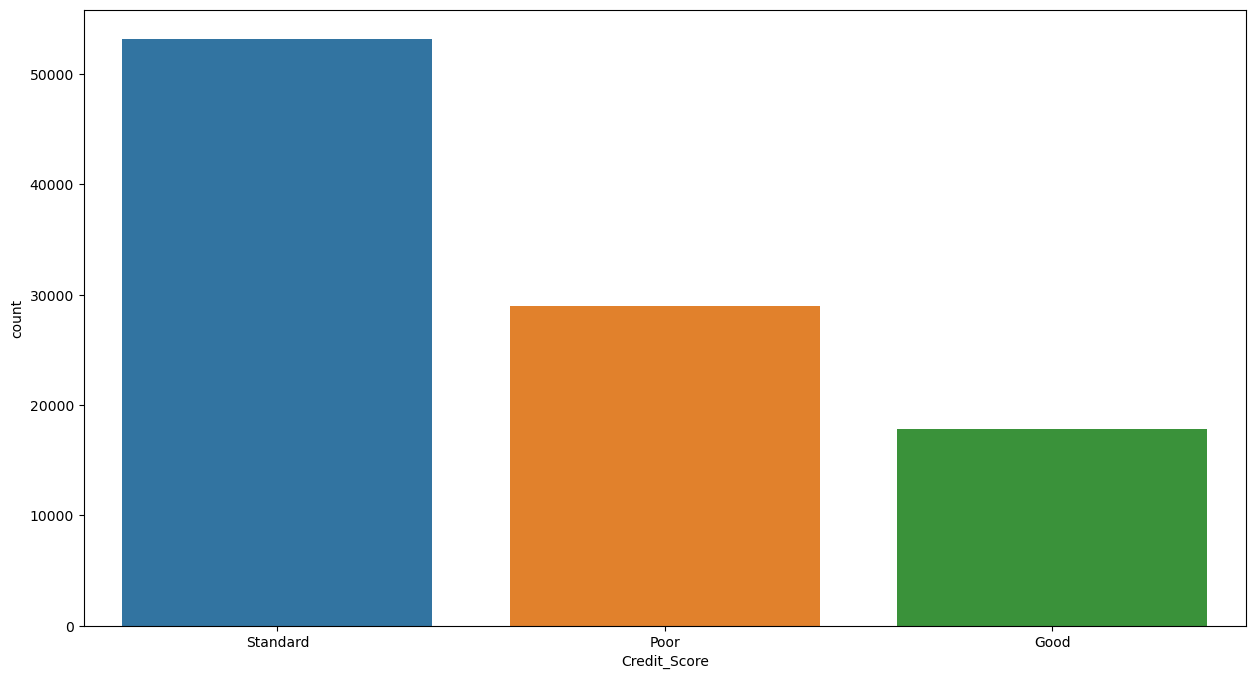

In [71]:
for i in cols_cat:
    sns.countplot(x=df[i].sort_values(ascending=False))
    plt.show()

#### Inferences (occupation)
-> Second highest occupation of the individuals are Lawyers
-> Least occupation of the individuals are writers

#### Inferences (credit_mix)
-> Most of the individuals are having standard credit loans
-> Some of the individuals are having bad credit loans

#### Inferences (Payment of Min Amount)
-> Most of the individuals are paying min amount towards to their credit loan account

#### Inferences (Payment Behaviours)
-> most of the individuals have paid Low spent Small value payments
-> most of the individuals have paid Low spent Large value payments


#### Inferences (Credit Score)
-> most of the idividuals are having standard credit score



In [72]:
# Bivariate - Categorical vs Numerical

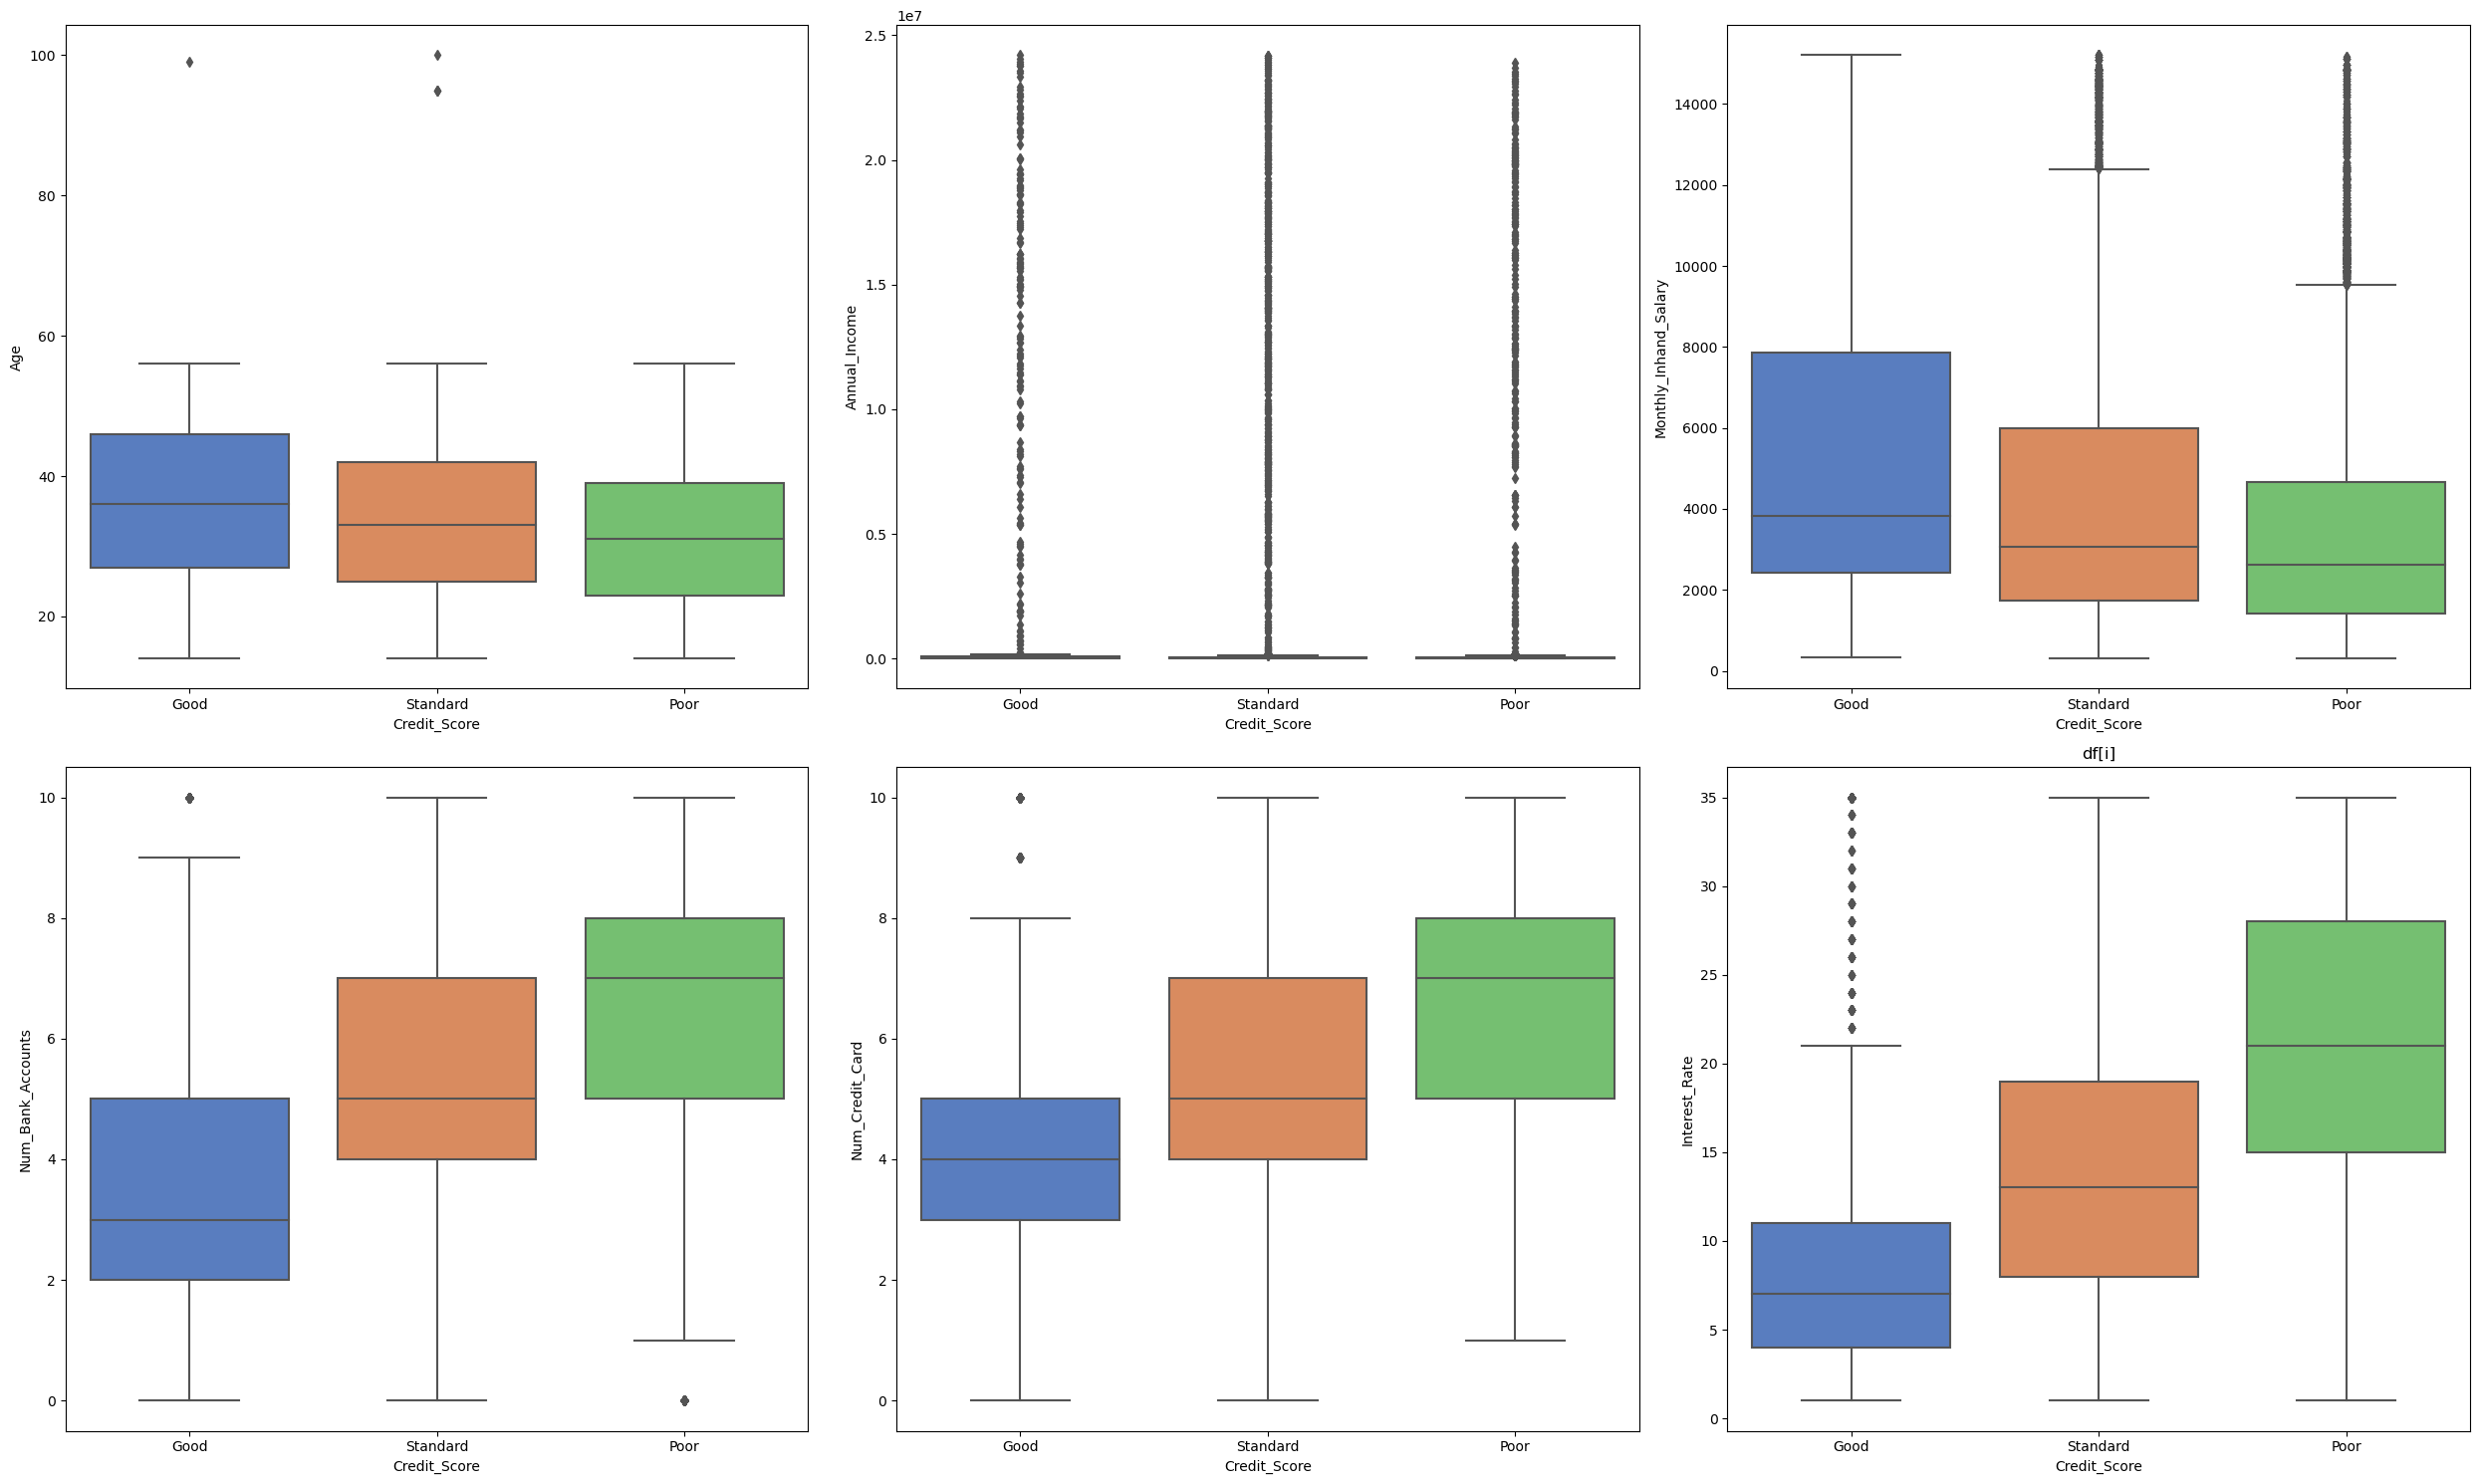

In [73]:
fig, ax= plt.subplots(2,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(x=df['Credit_Score'],y=df[i],palette='muted', ax= subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [74]:
for i in cols:
    sns.boxplot(x=df['Credit_Score'],y=df[i],palette='muted', ax= subplot)
    plt.show()

#### Inference(age vs credit score)
-> The individuals from average age group are having good credit score compare to the individuals who are having standard credit score
#Inference(Inhand_Salary vs credit score)
-> The individuals earning good monthly _inhand _salary are maintaining good credit score than the individuals who are having poor credit score
#Inference(Num_Bank_Account vs credit score)
-> The individuals having least bank account are maintaining good credit score  than poor
#### Inference(Num_Credit_card vs credit score)
-> The individuals having least bank creditcard  are maintaining good credit score  than individuals using more creditcard
#### Inference(Interest_Rate vs credit score)
-> The individuals having least rate of interest are having good credit score than individuals haviung high rate of interest
#### Inference(Num_of_Loan vs credit score)
-> The individuals having less number of loans are having good credit score than more loan
#### Inference(delay from due date vs credit score)
The individuals are maintaining good credit score are have less number of  delayed days from the due date than individuals having poor credit score
#### Inference(delay from change in credit limit vs credit score)
The individuals are maintaining good credit score have minimal change in their credit limit  than the individuals having poor & standard credit score

In [75]:
#  Bivariate - Categorical(target) vs Categorical

Text(0.5, 1.0, 'Month-Credit_Score')

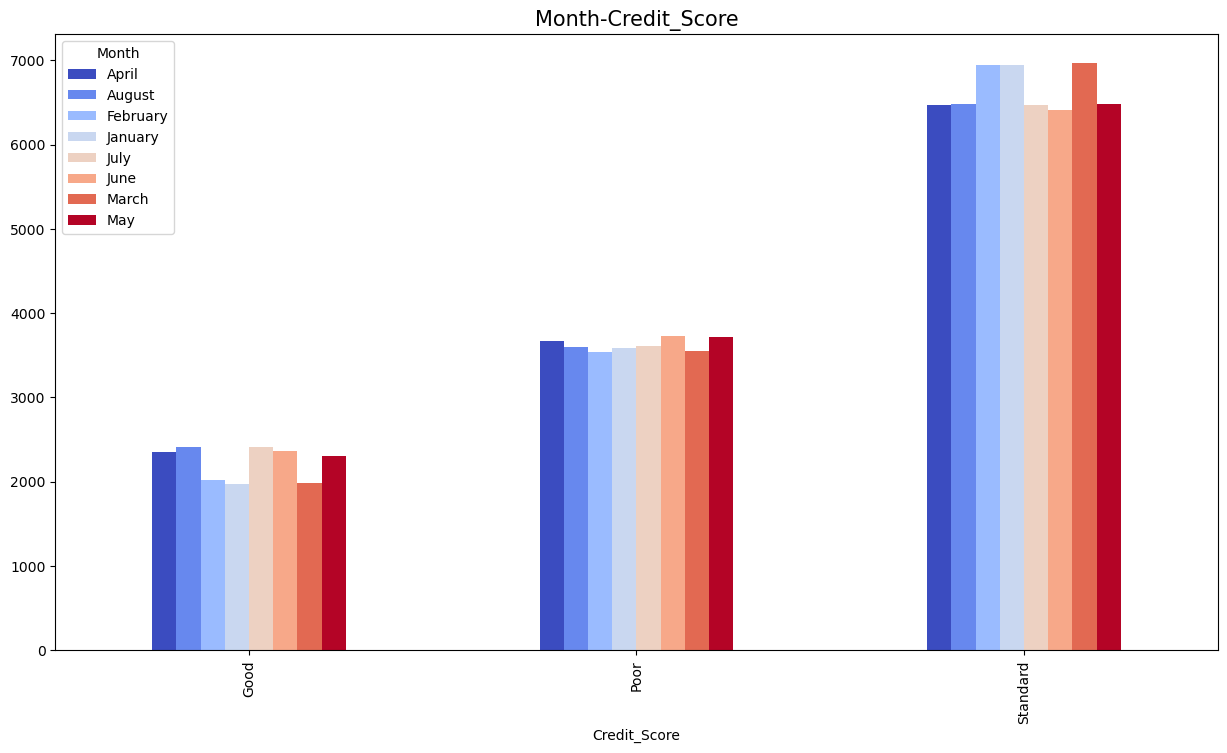

In [76]:
pd.crosstab(df['Credit_Score'],df['Month']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Month-Credit_Score',fontsize=15)

Text(0.5, 1.0, 'Credit_Score-Occupation')

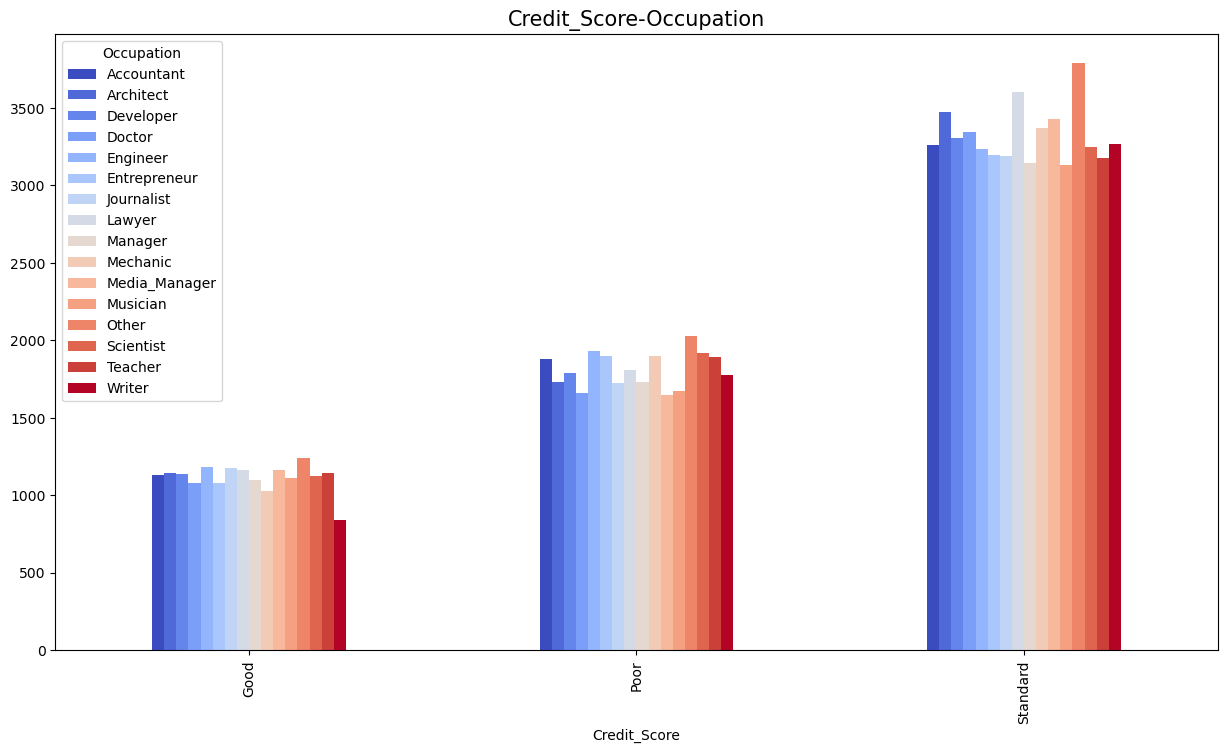

In [77]:
pd.crosstab(df['Credit_Score'],df['Occupation']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Credit_Score-Occupation',fontsize=15)

Text(0.5, 1.0, 'Credit_Mix-Credit_Score')

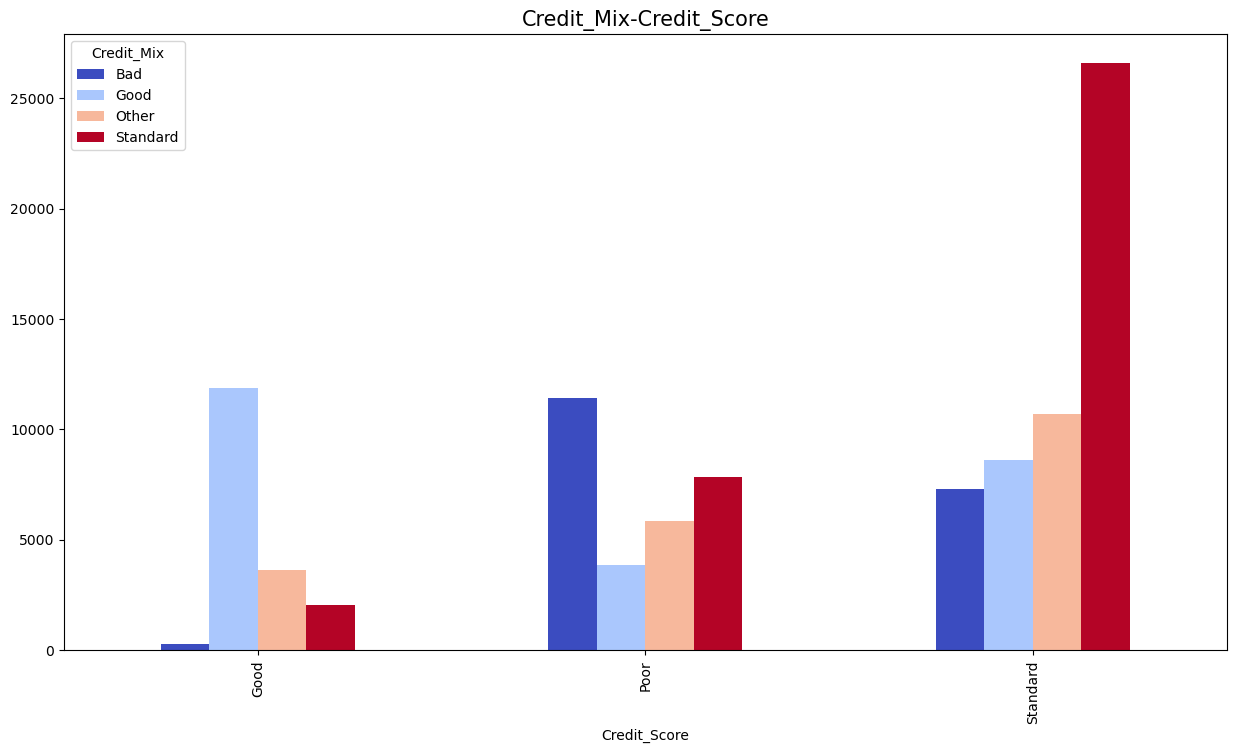

In [78]:
pd.crosstab(df['Credit_Score'],df['Credit_Mix']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Credit_Mix-Credit_Score',fontsize=15)

Text(0.5, 1.0, 'Payment_of_Min_Amount-Credit_Score')

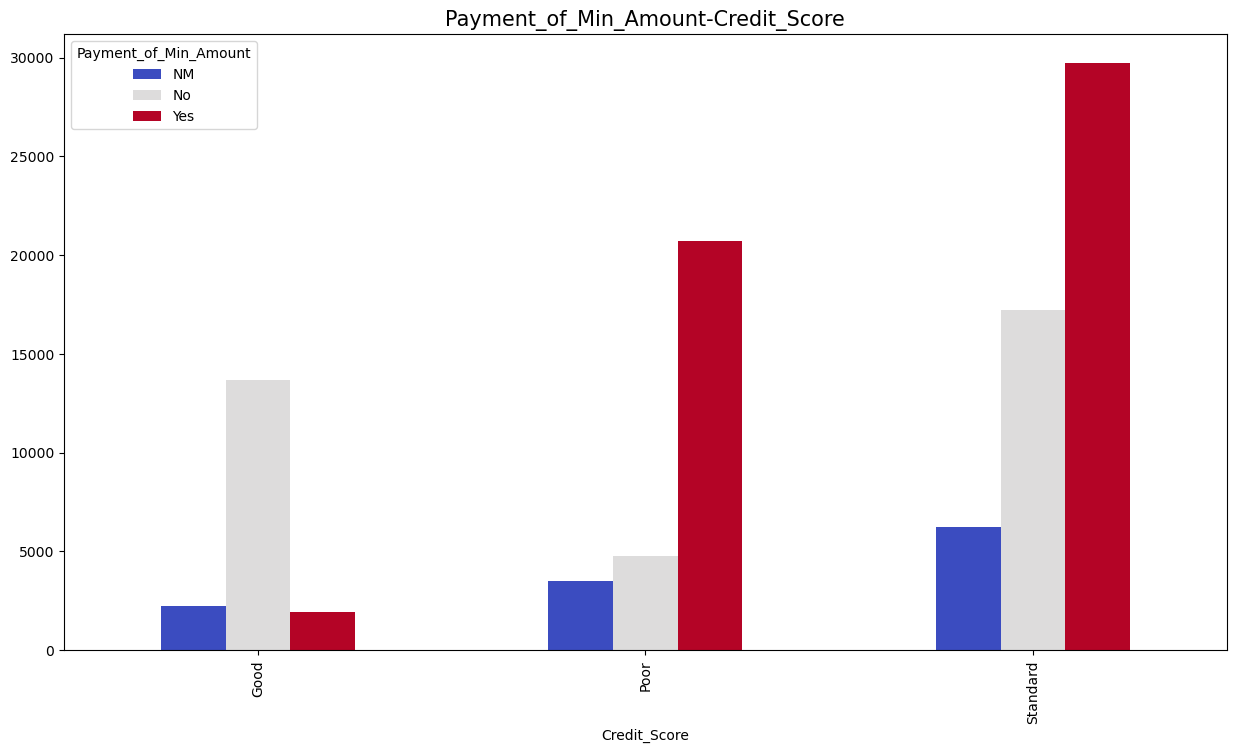

In [79]:
pd.crosstab(df['Credit_Score'],df['Payment_of_Min_Amount']).plot(kind='bar',colormap='coolwarm')
plt.title( 'Payment_of_Min_Amount-Credit_Score',fontsize=15)

#### Inferences

Payment of minimimum amount vs credit score

-> - The indviduals who are not paying the minimum amount have very poor credit scores and then those who are  paying the minimum amount have a standard credit score on the basis of Payment of minimum amount vs credit score

Payment Behaviour- credit score:

->  The individuals who are in the categories of low spent small value payments are more in numbers compared to all the subclasses, the individuals who spent small value payments are much less in the terms of Payment Behaviour.


Credit_mix-Credit Score

->the indviduals having standard credit score is are more than the indviduals having good credit score and the individuals with the poor credit score.

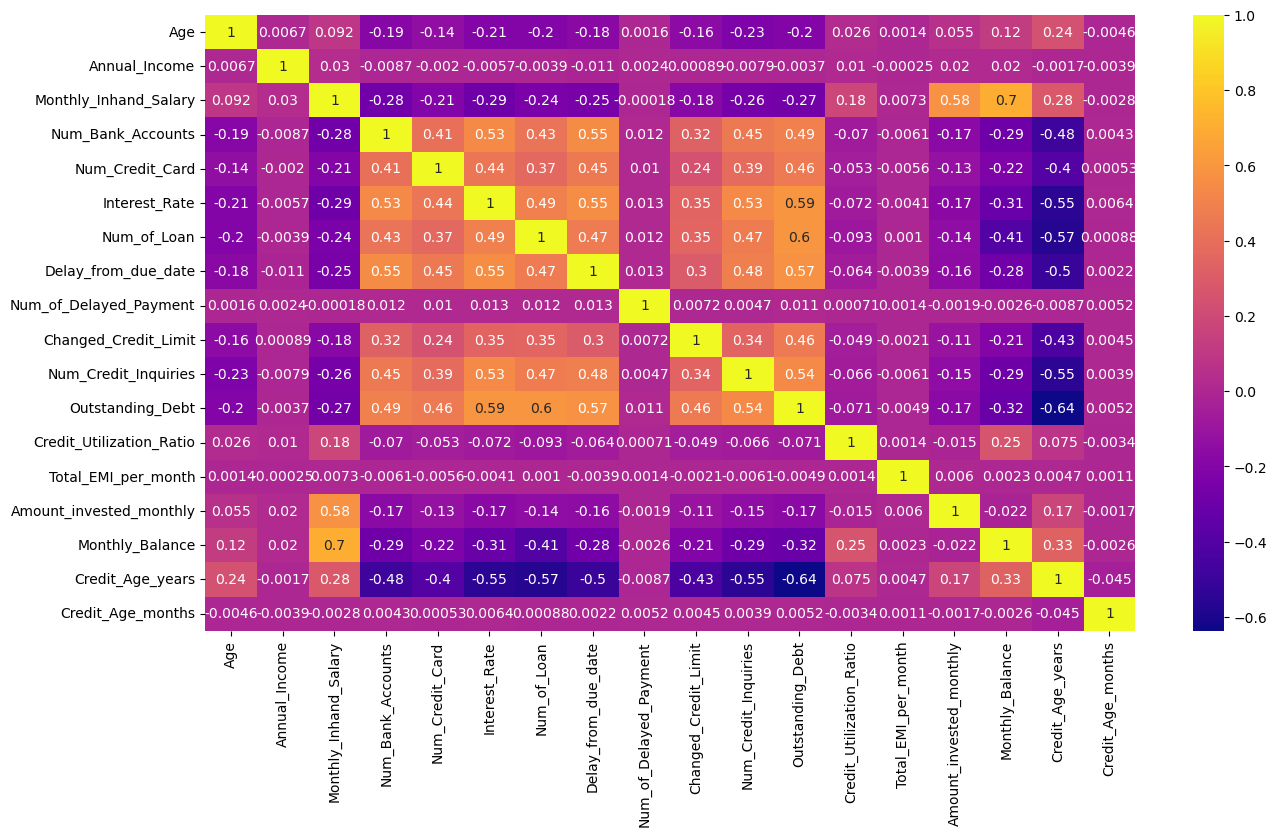

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [81]:
# Outlier Detection Using Boxplot

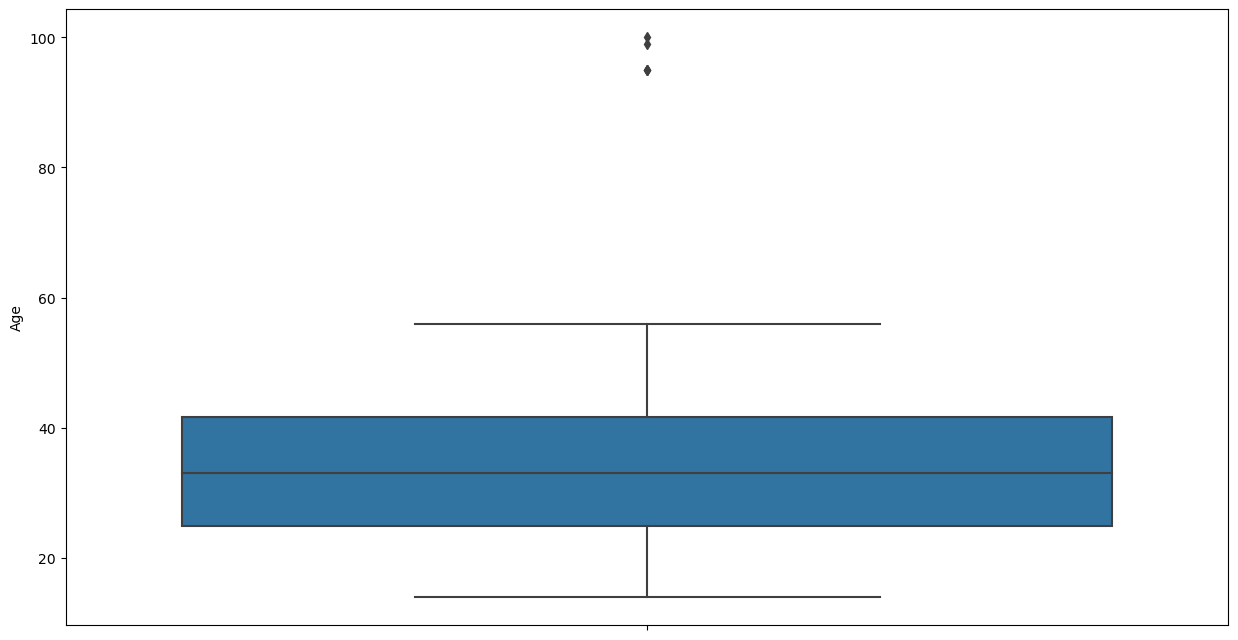

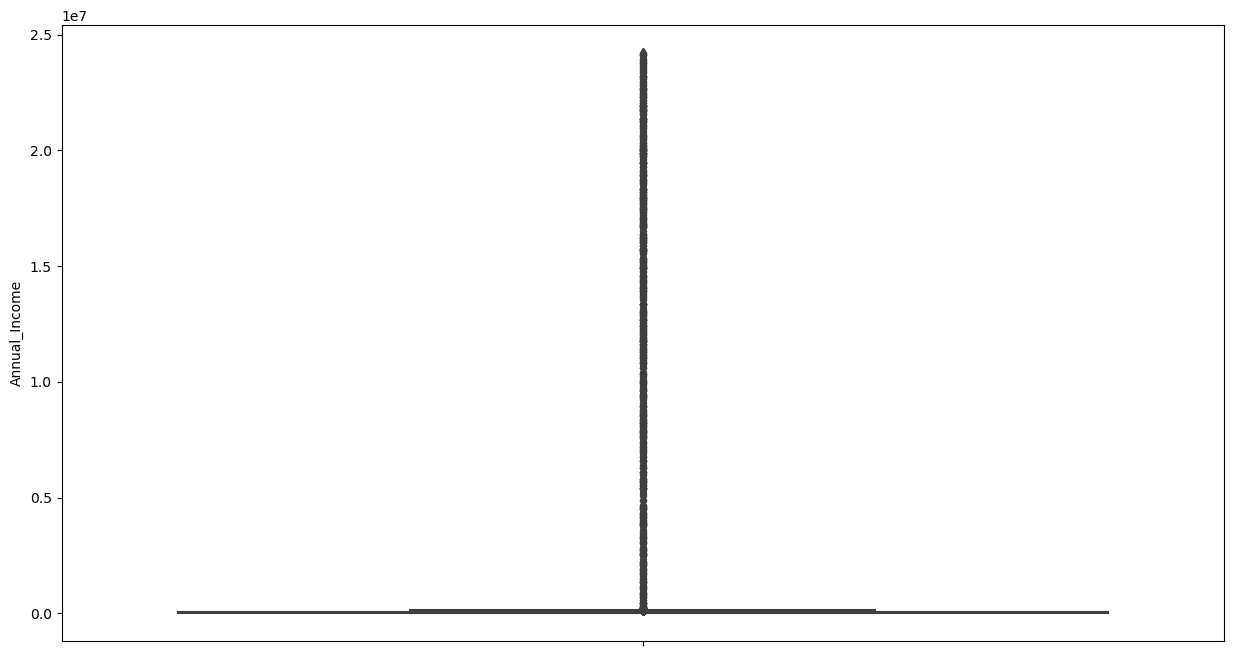

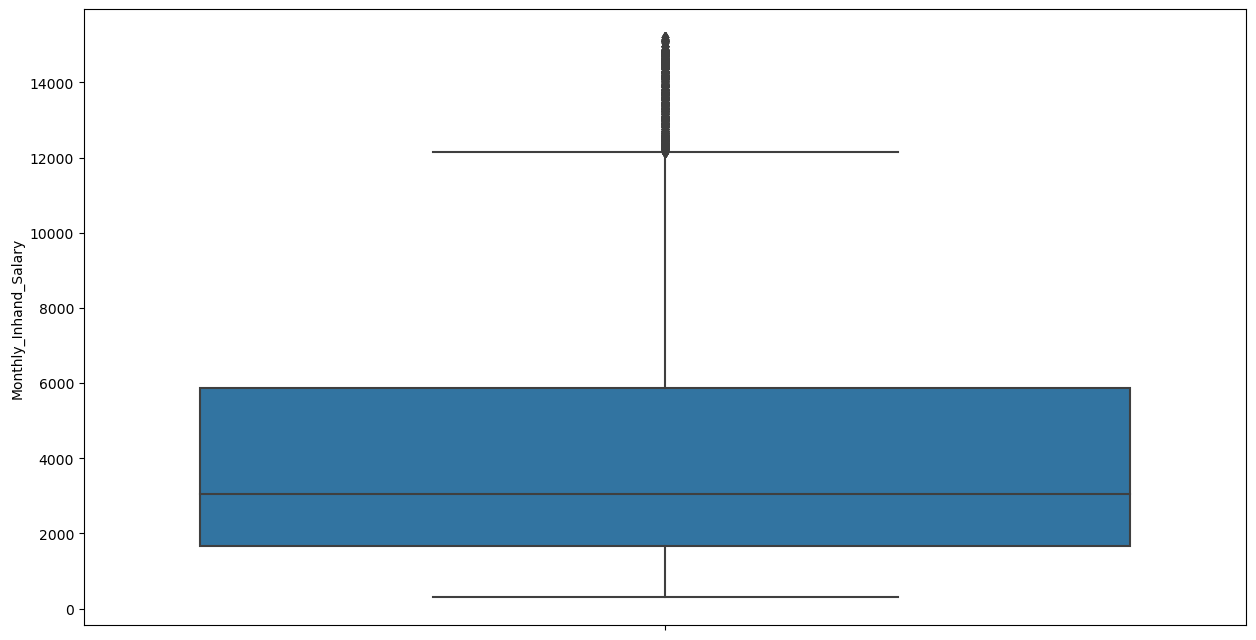

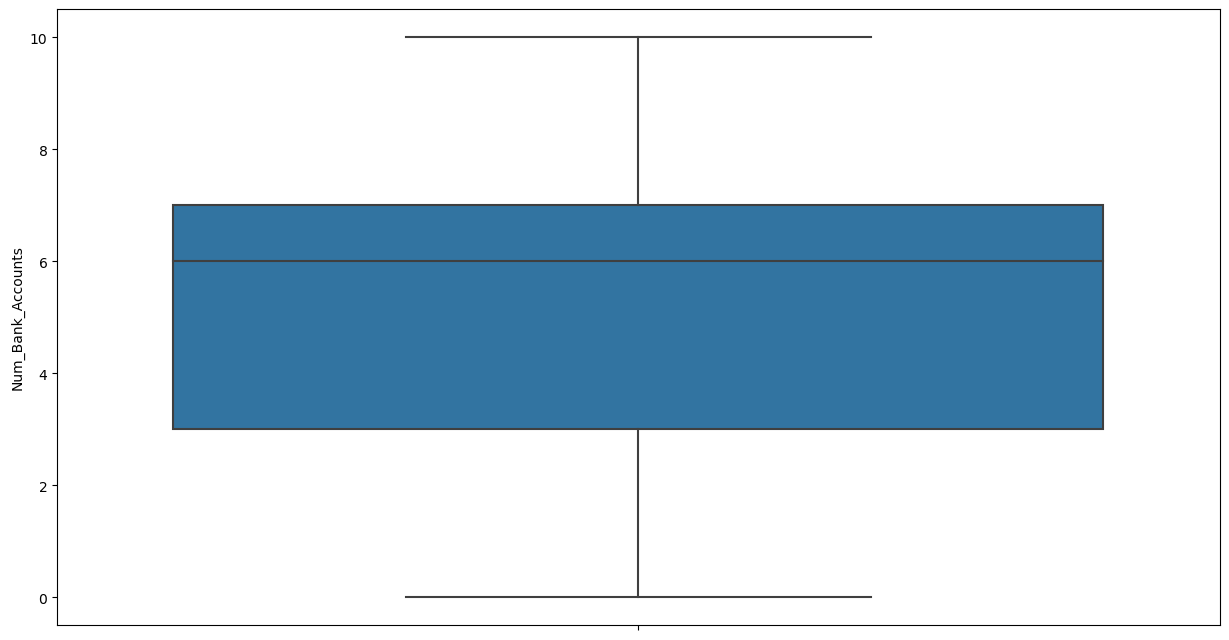

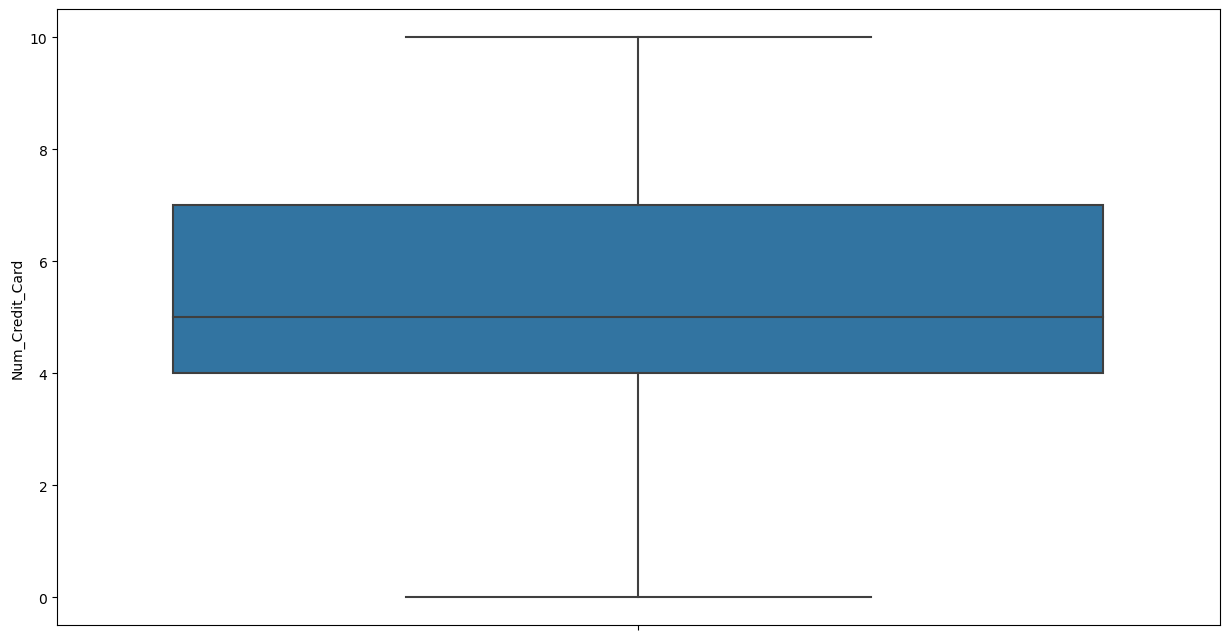

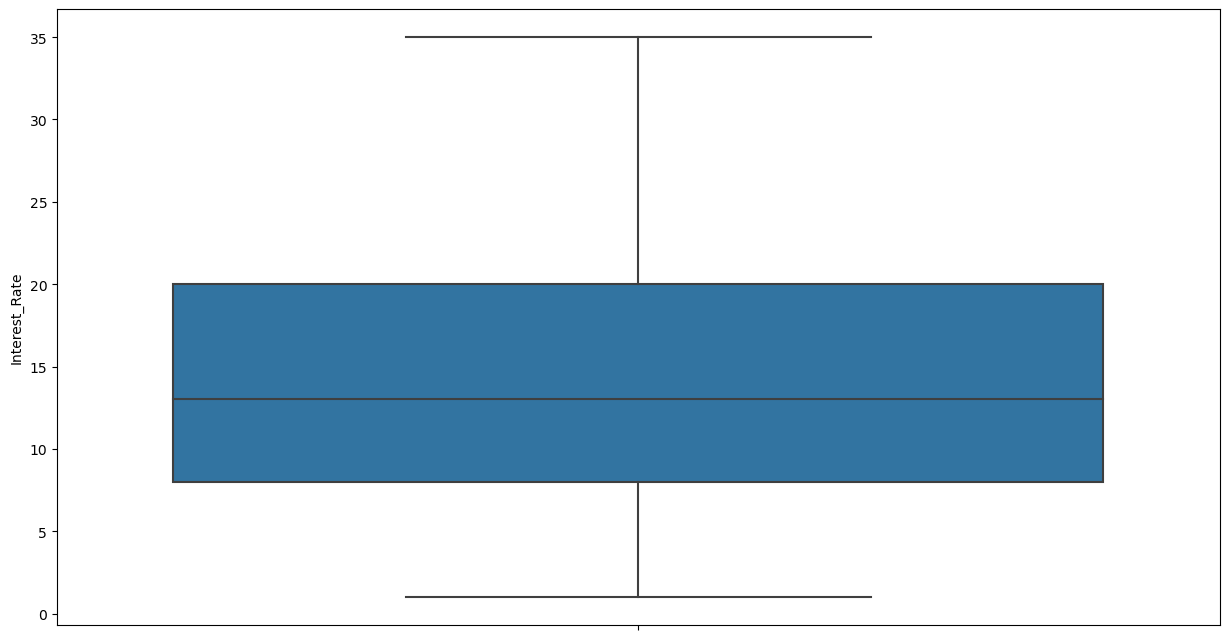

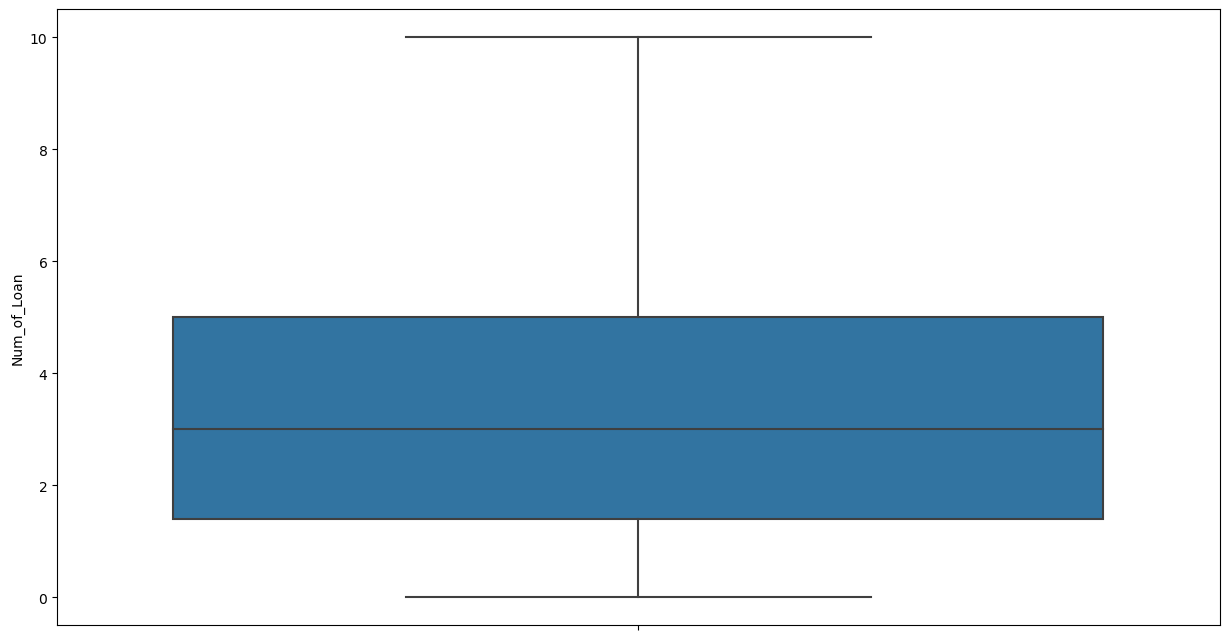

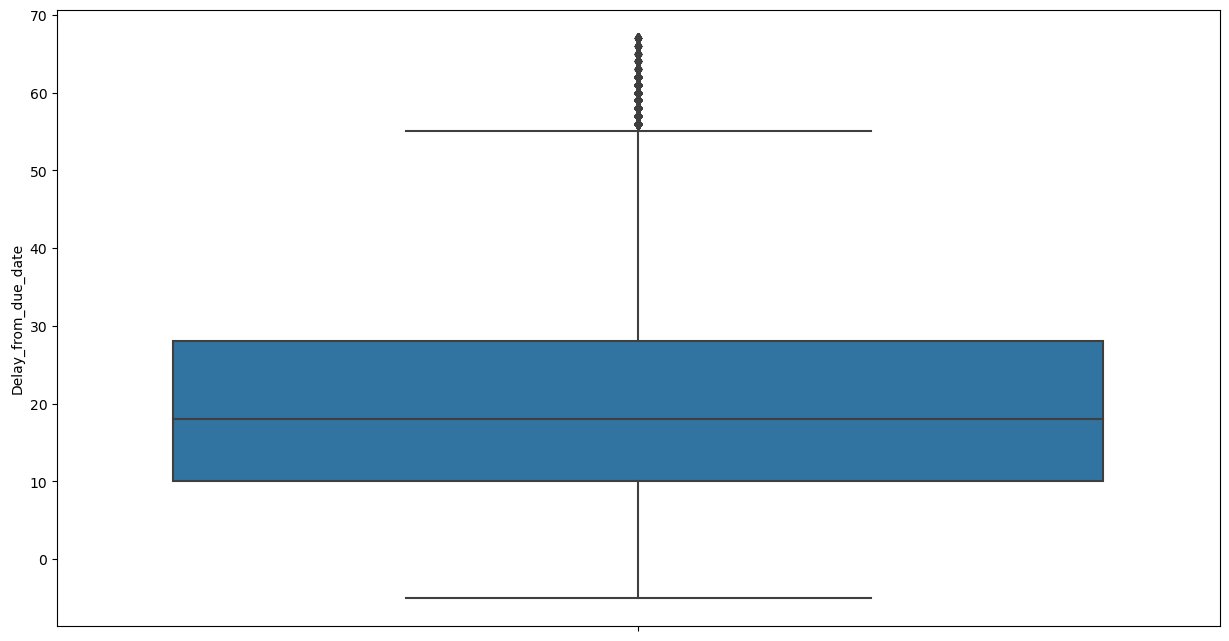

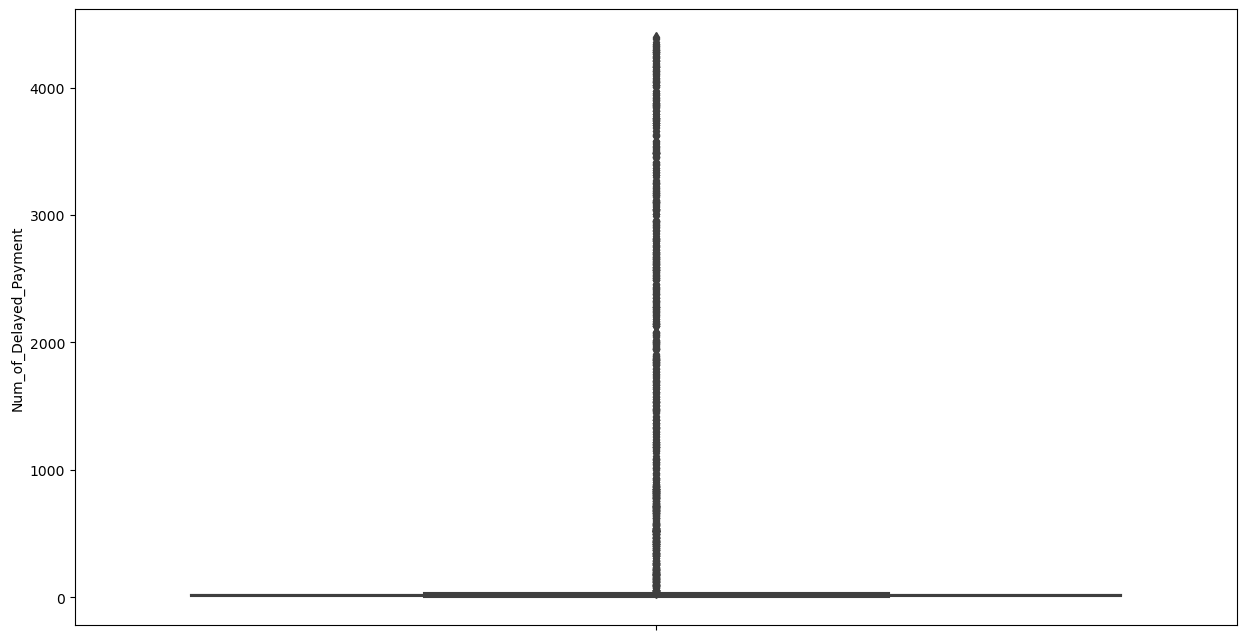

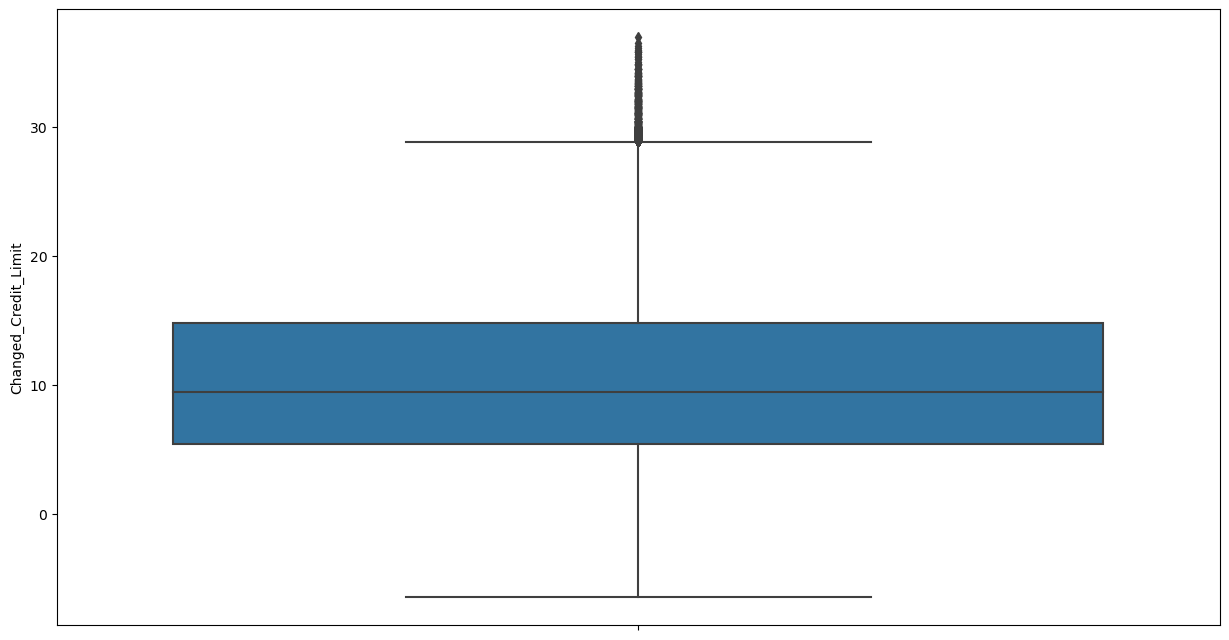

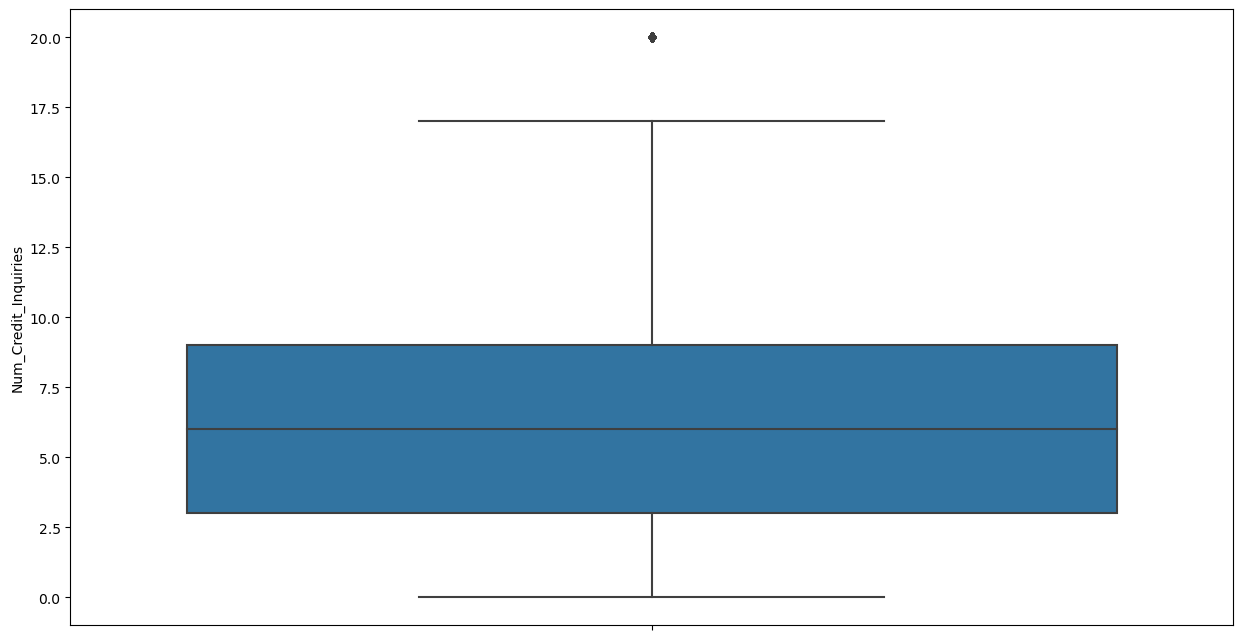

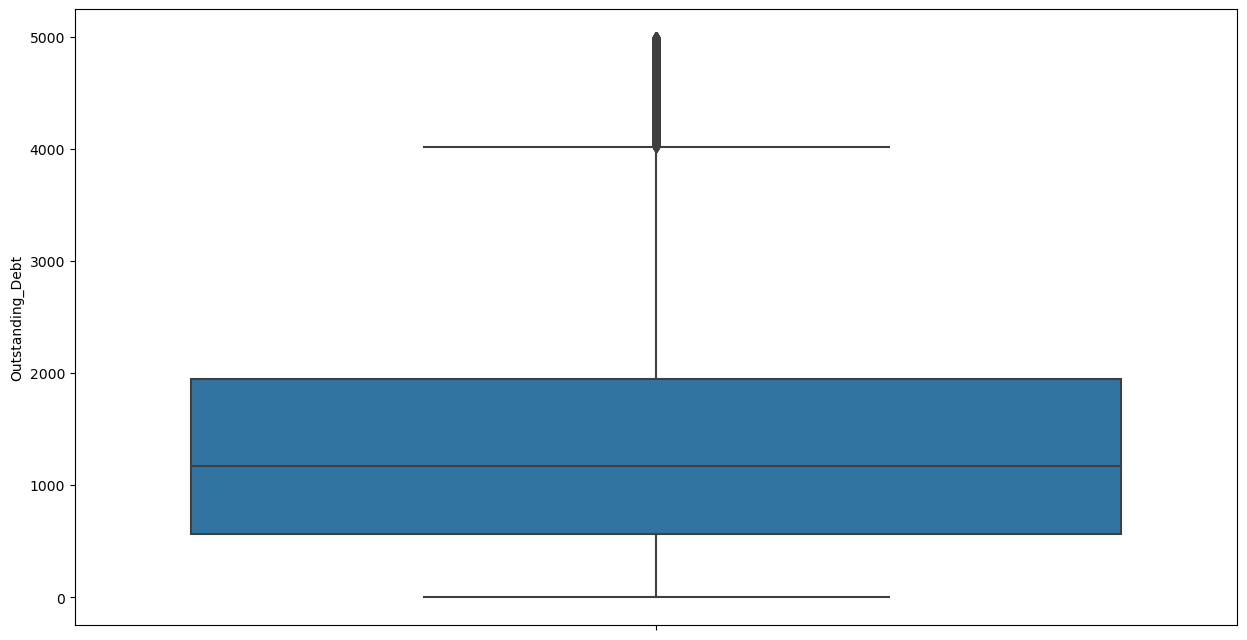

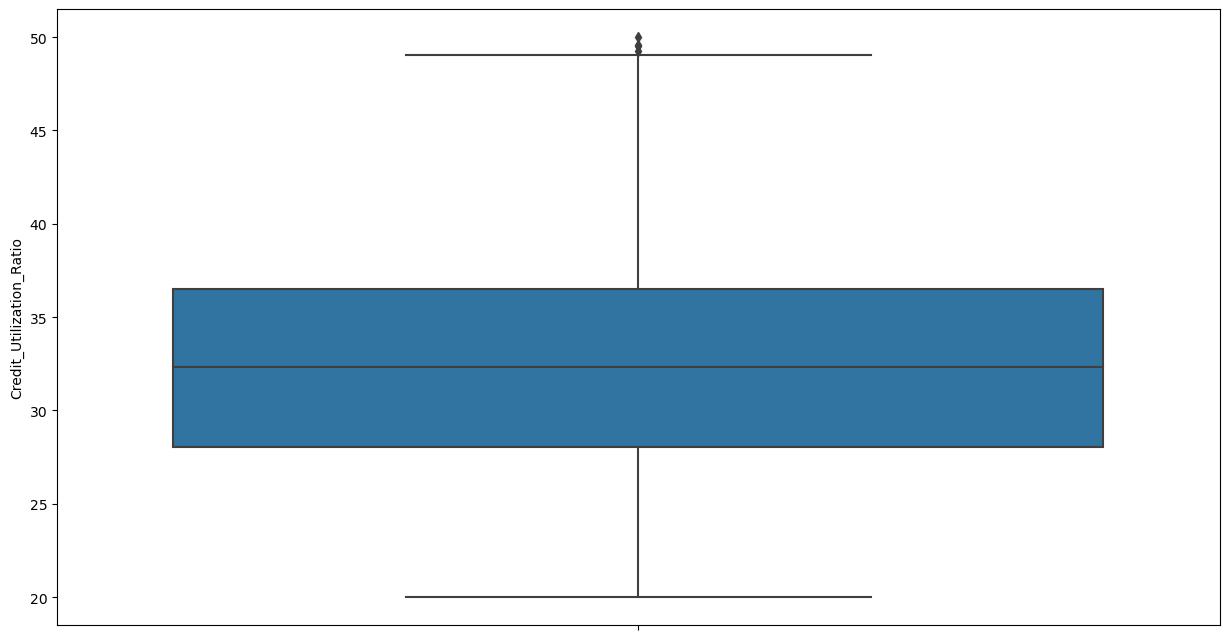

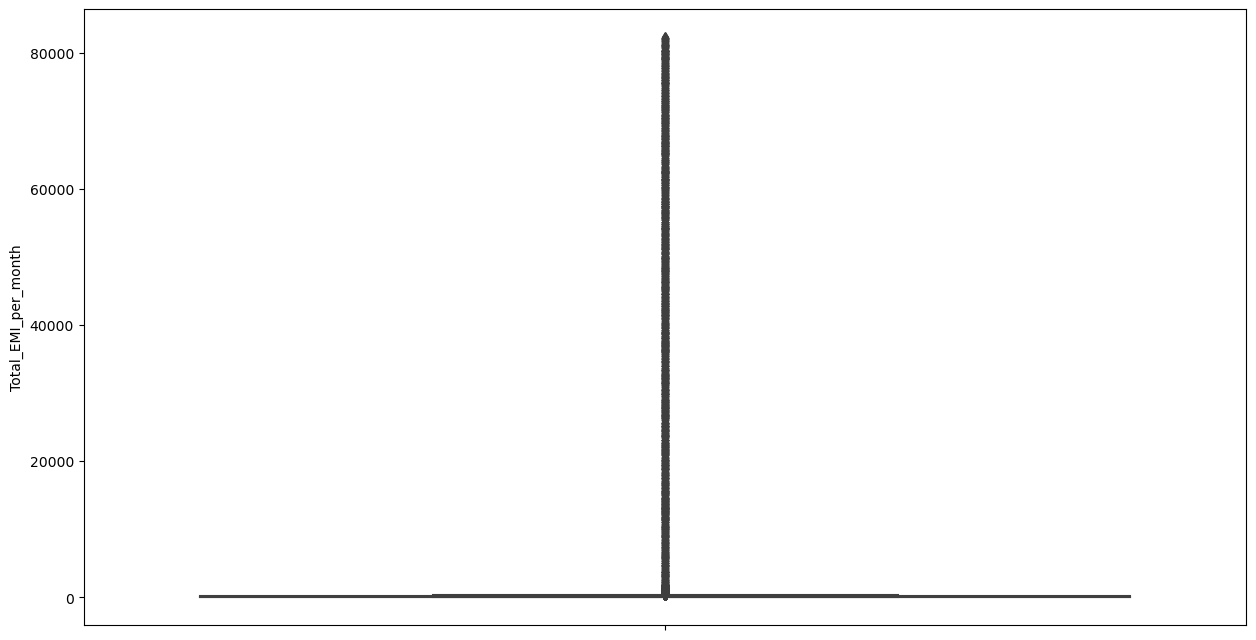

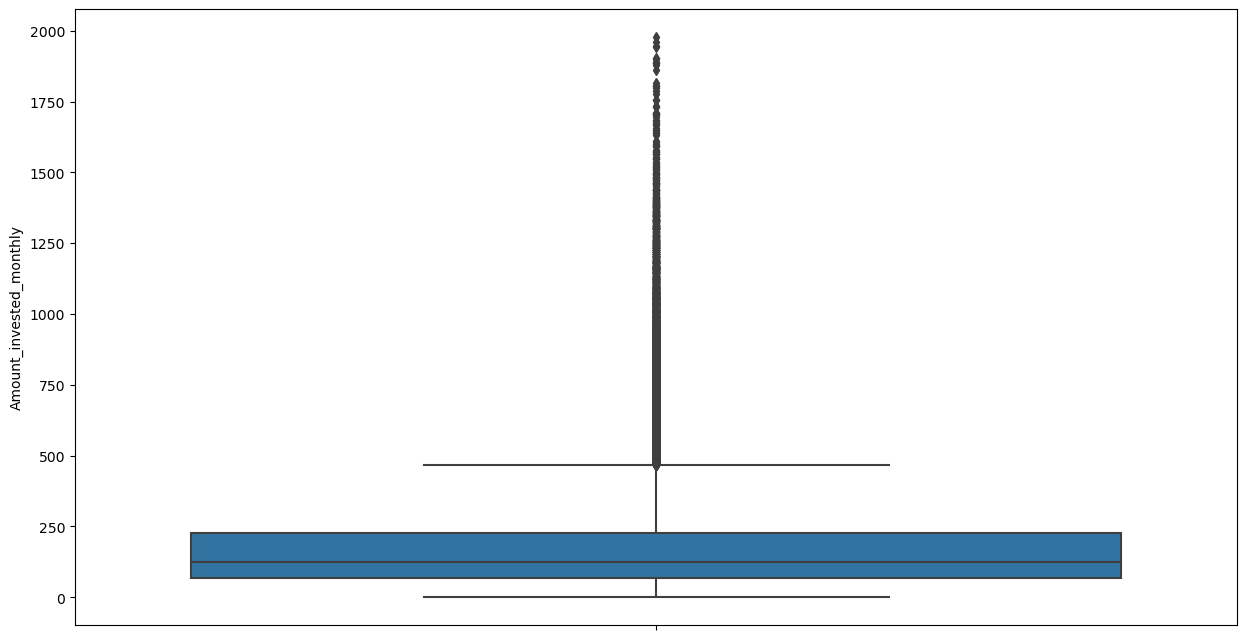

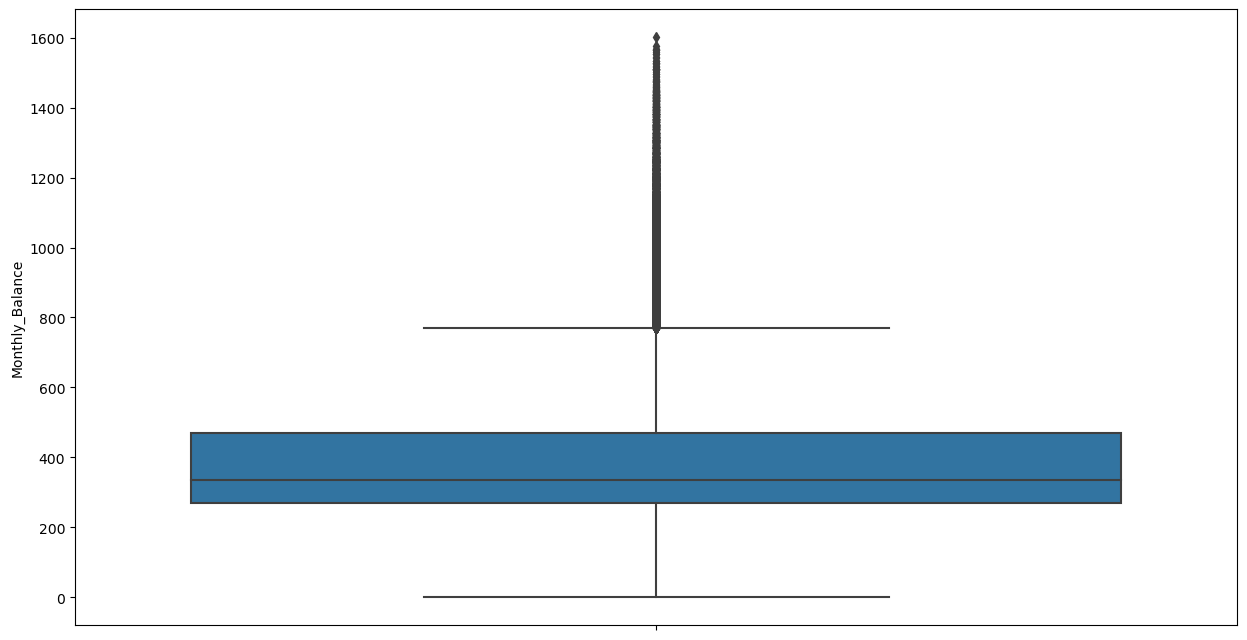

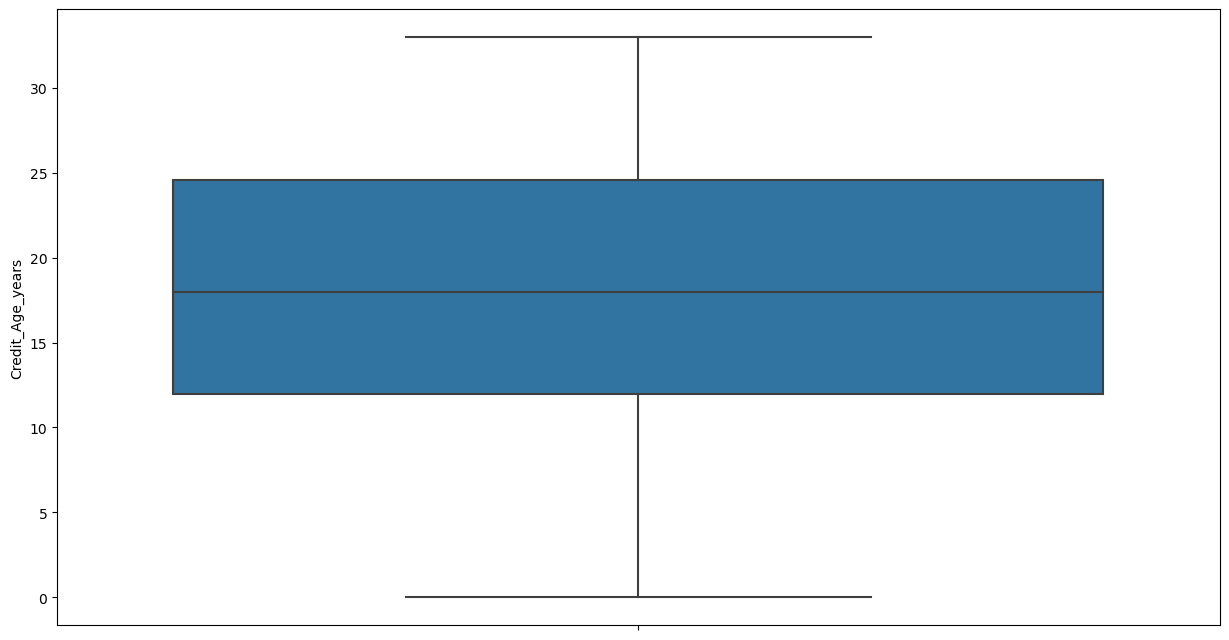

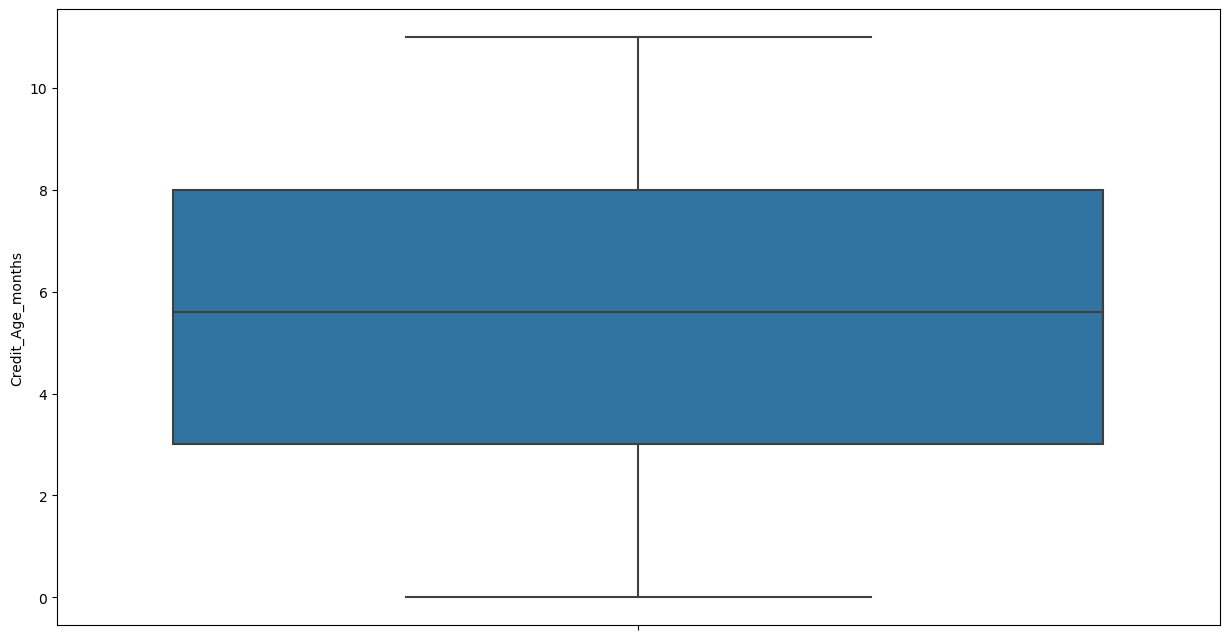

In [82]:
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [83]:
upperlimit=df[cols].mean()+3*df[cols].std()
lowerlimit=df[cols].mean()-3*df[cols].std()

In [84]:
upperlimit

Age                         6.537097e+01
Annual_Income               4.465270e+06
Monthly_Inhand_Salary       1.350083e+04
Num_Bank_Accounts           1.331735e+01
Num_Credit_Card             1.208098e+01
Interest_Rate               4.230850e+01
Num_of_Loan                 1.094540e+01
Delay_from_due_date         6.564909e+01
Num_of_Delayed_Payment      6.894193e+02
Changed_Credit_Limit        3.065155e+01
Num_Credit_Inquiries        1.869766e+01
Outstanding_Debt            4.891607e+03
Credit_Utilization_Ratio    4.763580e+01
Total_EMI_per_month         2.632124e+04
Amount_invested_monthly     7.751571e+02
Monthly_Balance             1.042110e+03
Credit_Age_years            4.259651e+01
Credit_Age_months           1.556170e+01
dtype: float64

In [85]:
lowerlimit

Age                         1.284007e+00
Annual_Income              -4.112438e+06
Monthly_Inhand_Salary      -5.203957e+03
Num_Bank_Accounts          -2.460028e+00
Num_Credit_Card            -8.121825e-01
Interest_Rate              -1.241264e+01
Num_of_Loan                -4.102590e+00
Delay_from_due_date        -2.351153e+01
Num_of_Delayed_Payment     -6.277084e+02
Changed_Credit_Limit       -9.875468e+00
Num_Credit_Inquiries       -6.658258e+00
Outstanding_Debt           -2.039167e+03
Credit_Utilization_Ratio    1.693455e+01
Total_EMI_per_month        -2.351501e+04
Amount_invested_monthly    -4.031438e+02
Monthly_Balance            -2.392888e+02
Credit_Age_years           -6.654495e+00
Credit_Age_months          -4.369766e+00
dtype: float64

In [86]:
df_outlier_treated=pd.DataFrame()

In [87]:
cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

In [88]:
df_outlier_treated[cols]=np.where(df[cols]>upperlimit,upperlimit,np.where(df[cols]<lowerlimit,lowerlimit,df[cols]))

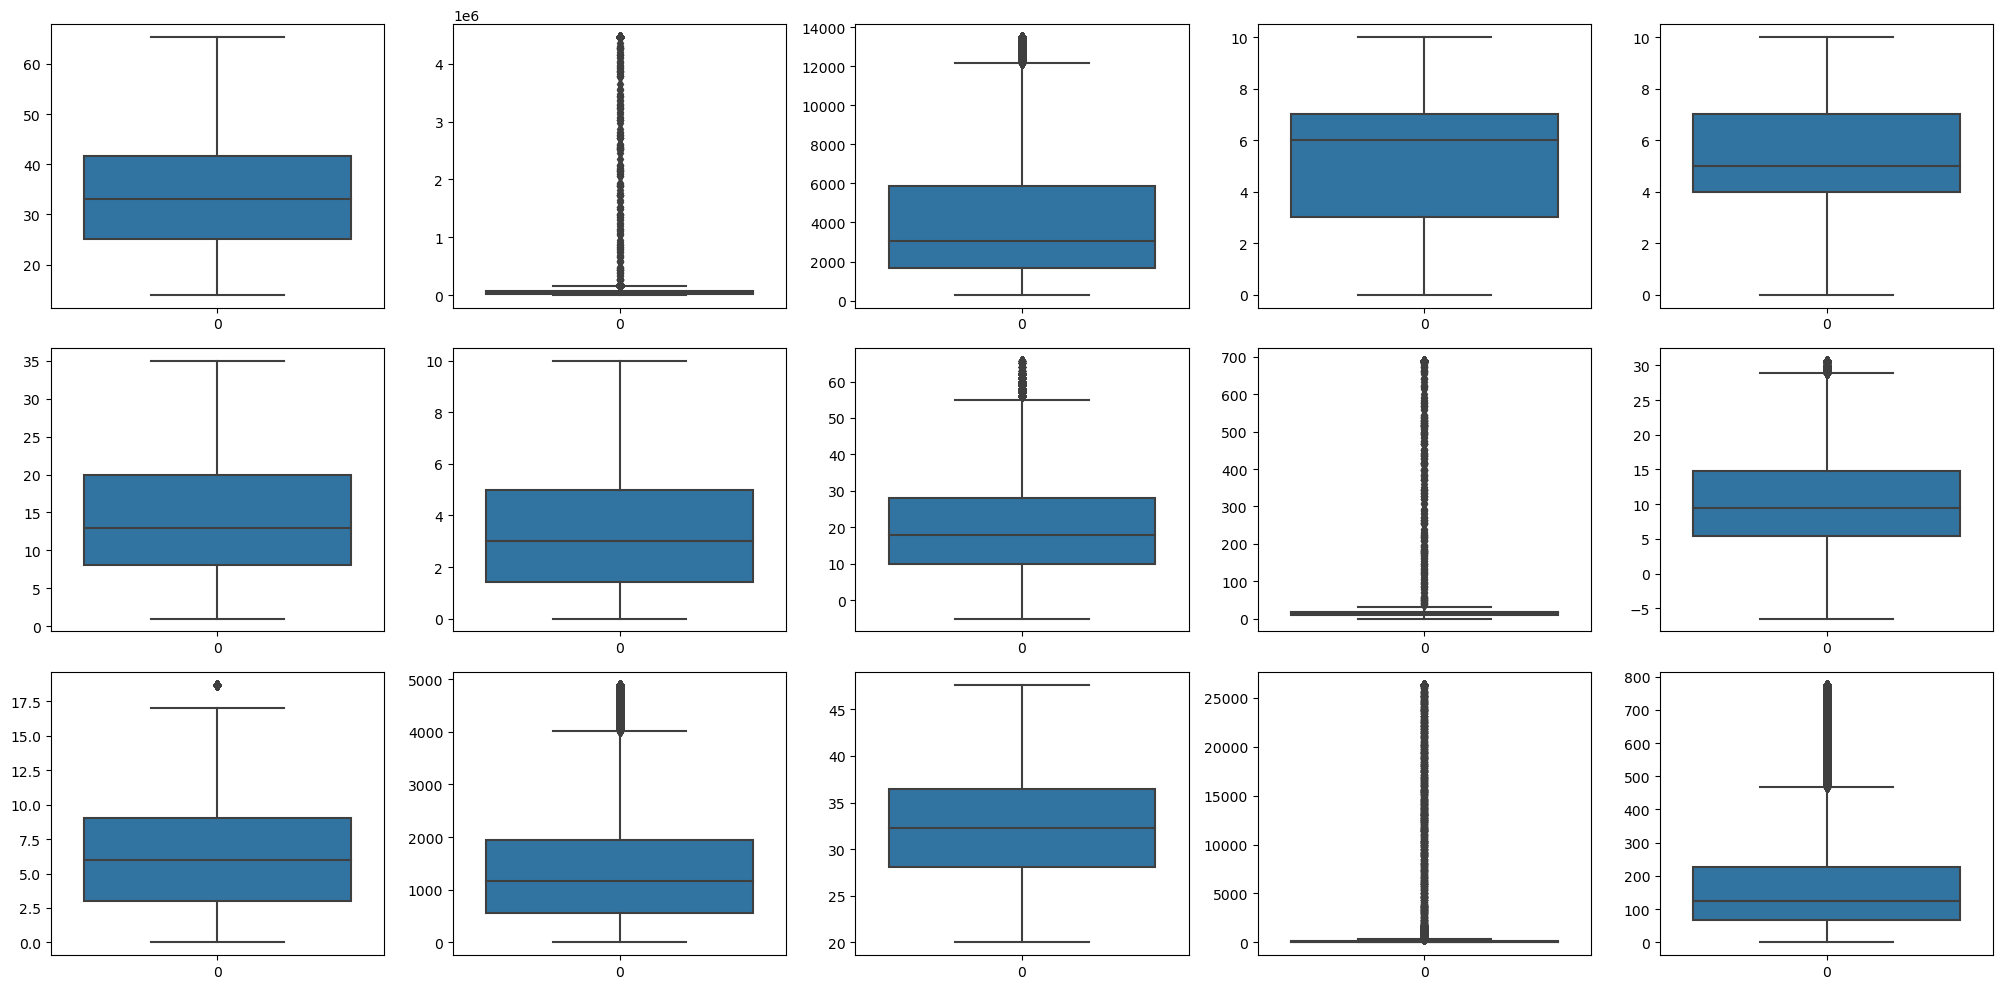

In [89]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_outlier_treated[i], ax=subplot)
    
plt.tight_layout()
plt.show()

In [90]:
df_outlier_treated

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            1976.265167                3.0   
2      31.8       19114.12            1929.969500                3.0   
3      23.0       19114.12            2911.331167                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                 -1.0   
2                  4.0            3.0          4.0                  3.0   
3                  4.0            3.0          4.0                  5.0   
4                  4.0            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0           35.0          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                   4.0   
1                         8.0                 11.27                   4.0   
2                         7.0                  9.05                   4.0   
3                         4.0                  6.27                   4.0   
4                         5.6                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                     8.8                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0                809.98                 26.822620            49.574949   
1                809.98                 31.944960            49.574949   
2                809.98                 28.609352            49.574949   
3                809.98                 31.377862            49.574949   
4                809.98                 24.797347            49.574949   
...                 ...                       ...                  ...   
99995            502.38                 34.663572            35.104023   
99996            502.38                 40.565631            35.104023   
99997            502.38                 41.255522            35.104023   
99998            502.38                 33.638208            35.104023   
99999            502.38                 34.192463            35.104023   

       Amount_invested_monthly  Monthly_Balance  Credit_Age_years  \
0                    80.415295       312.494089              22.0   
1                   118.280222       284.629162              23.0   
2                    81.699521       331.209863              22.0   
3                   199.458074       223.451310              22.0   
4                    41.420153       341.489231              22.0   
...           

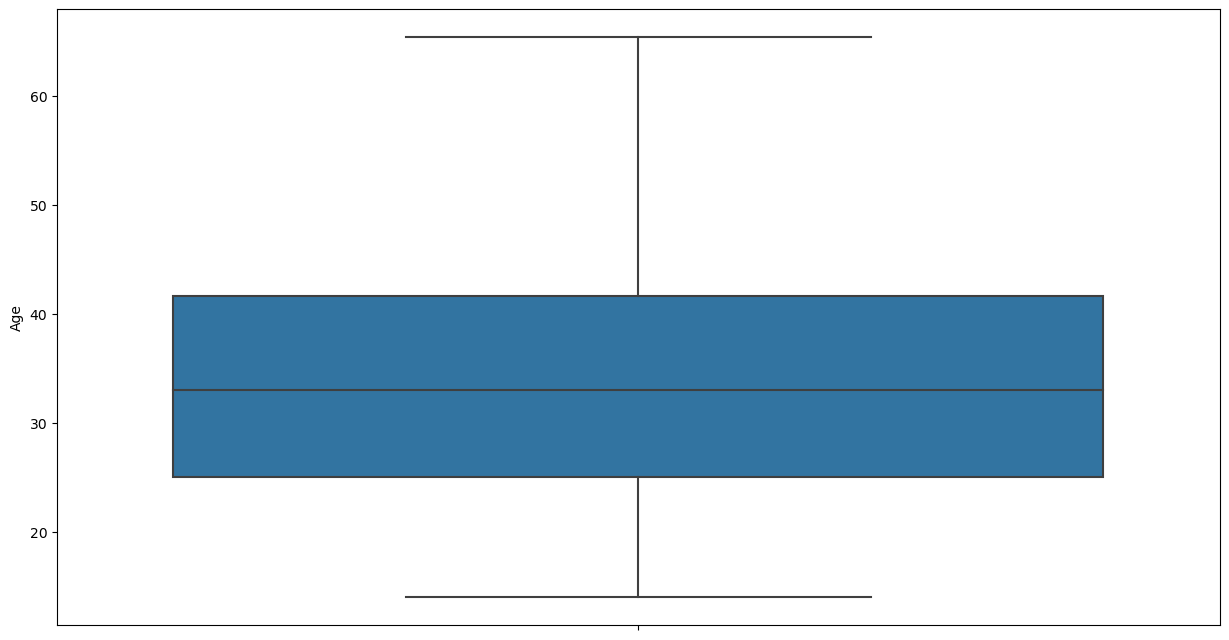

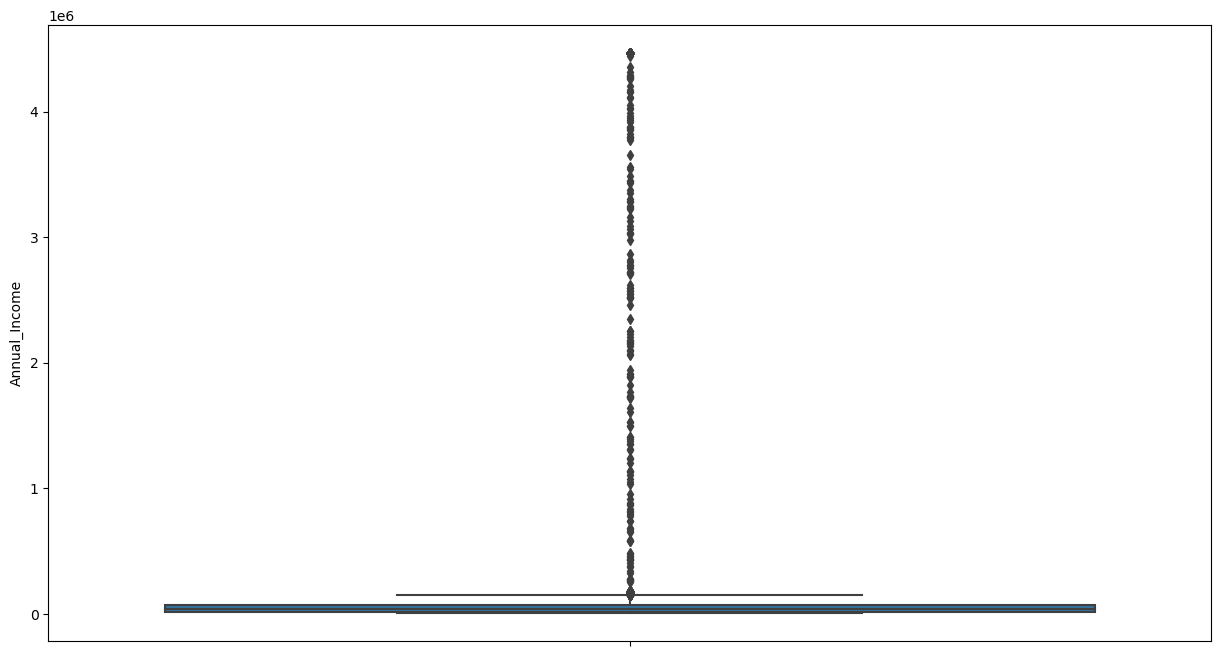

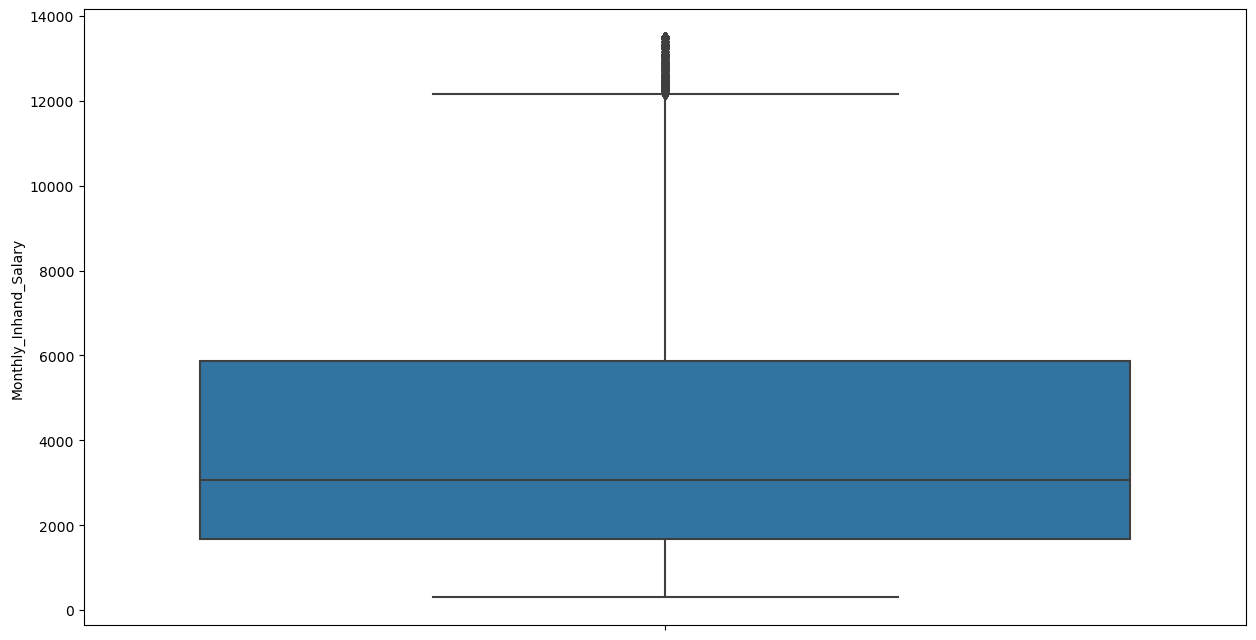

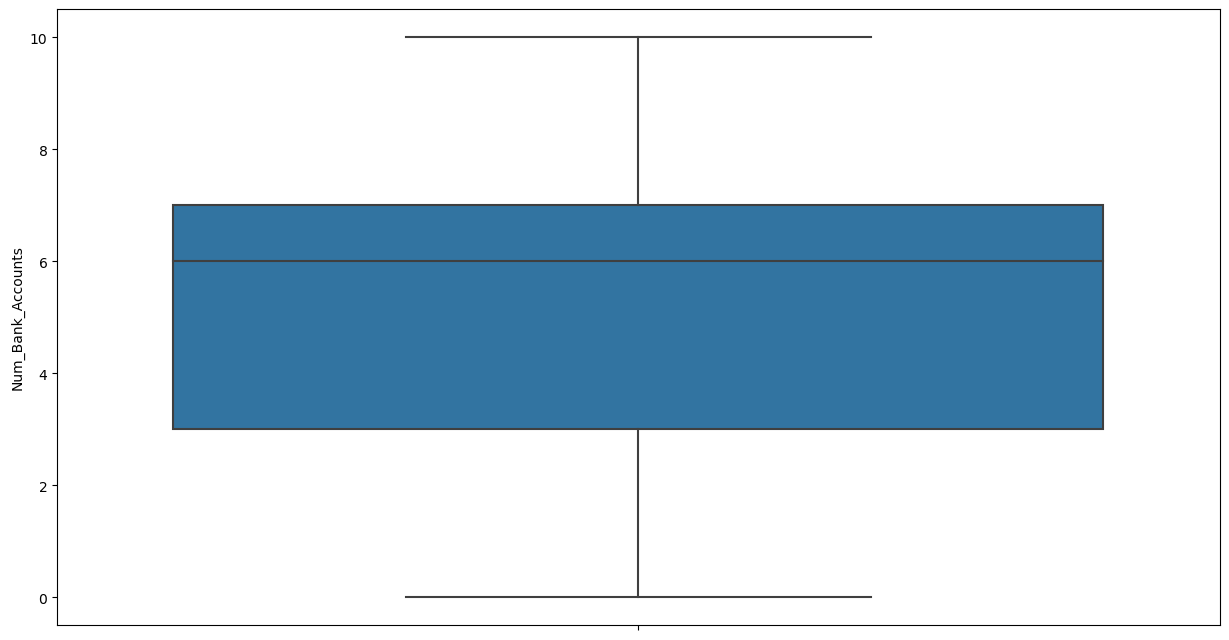

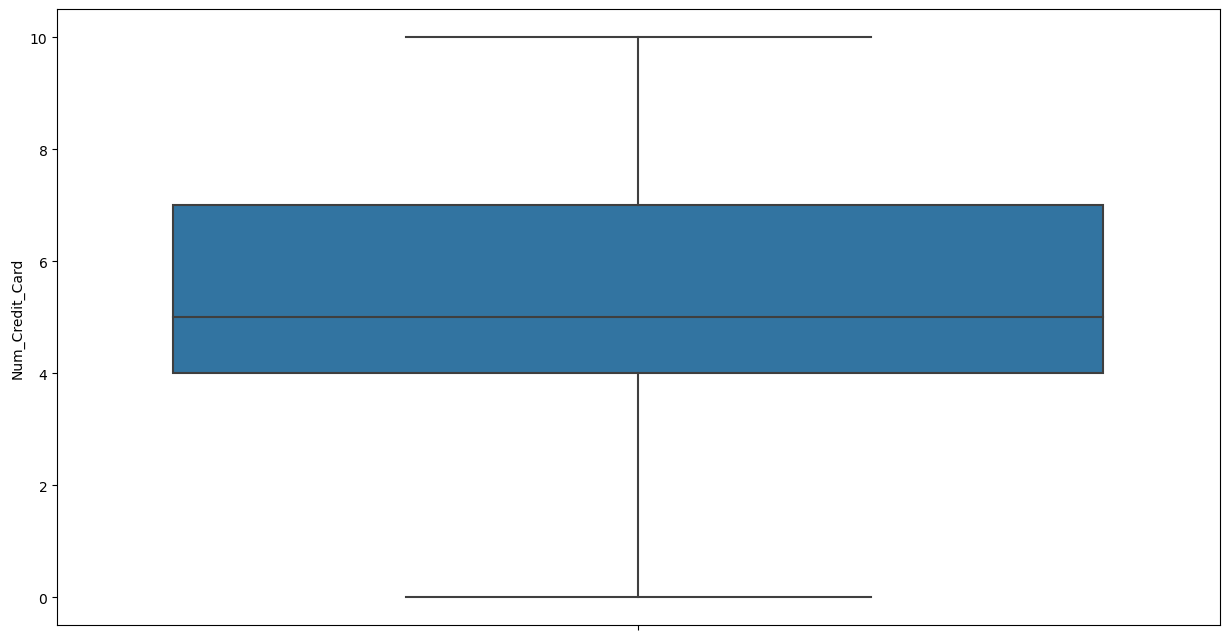

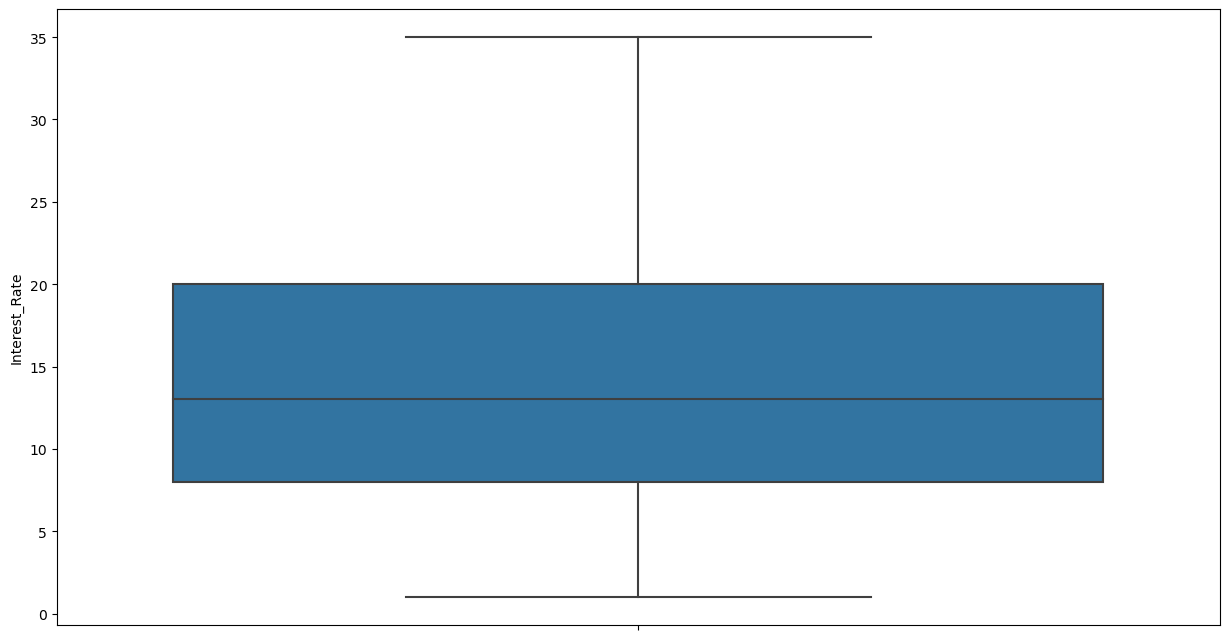

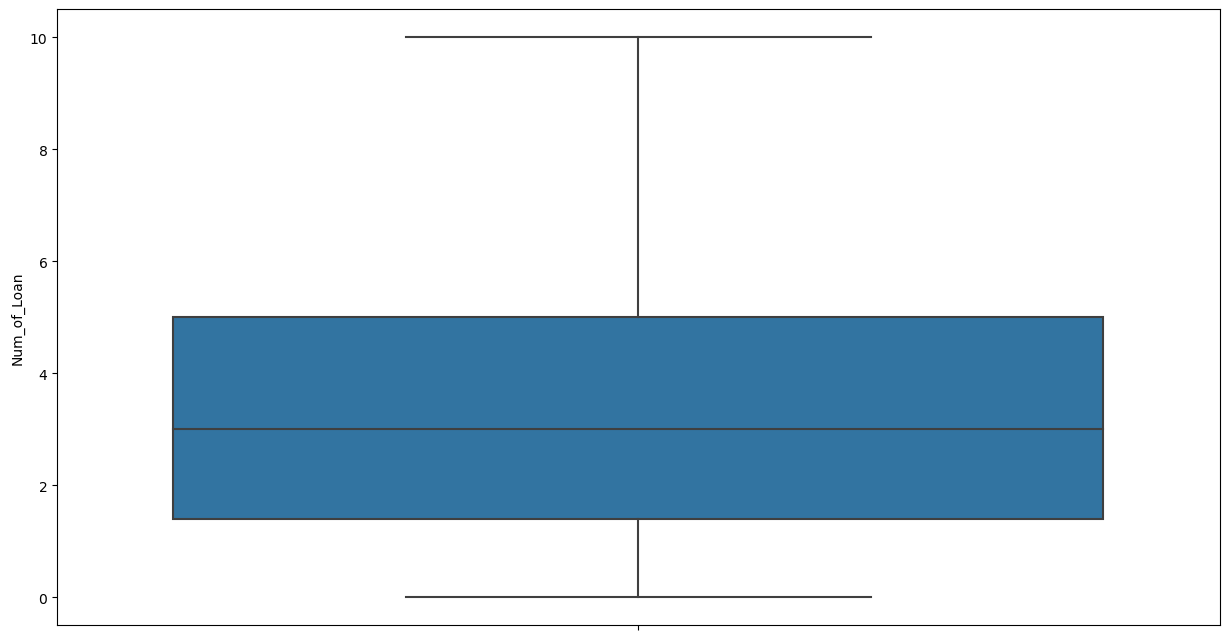

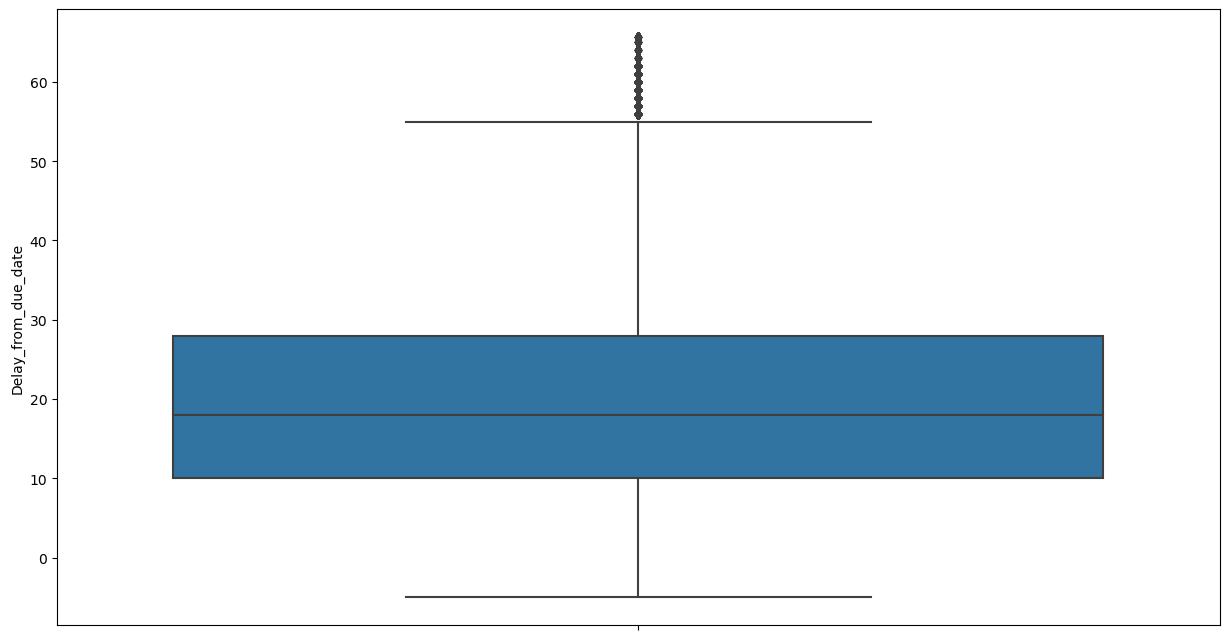

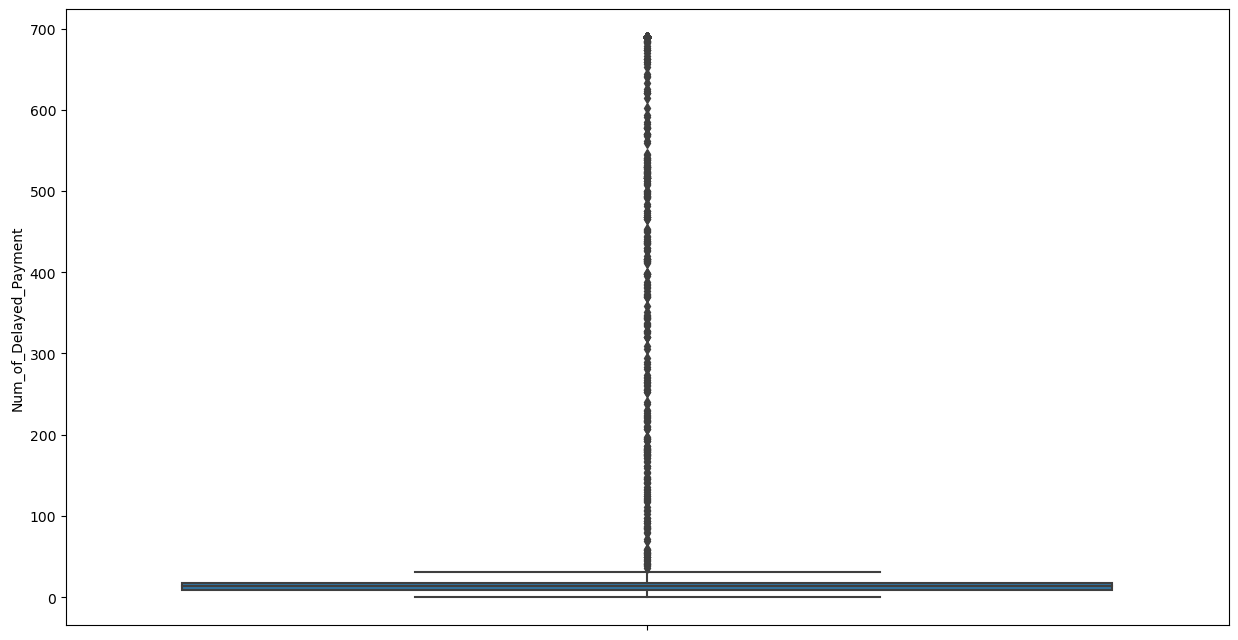

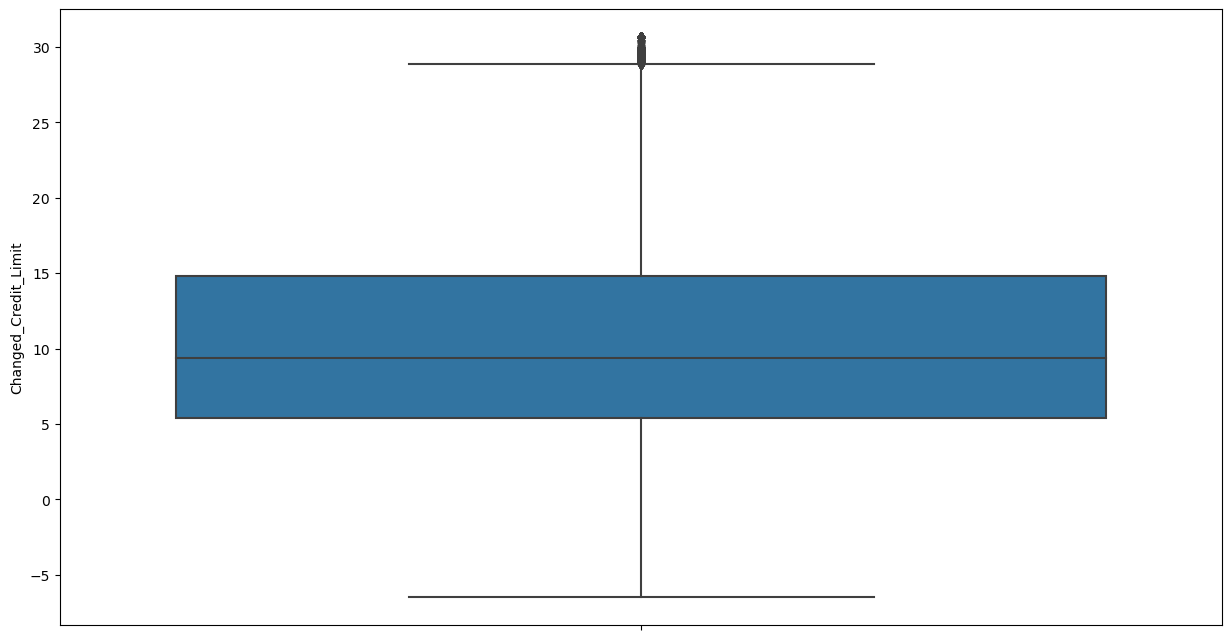

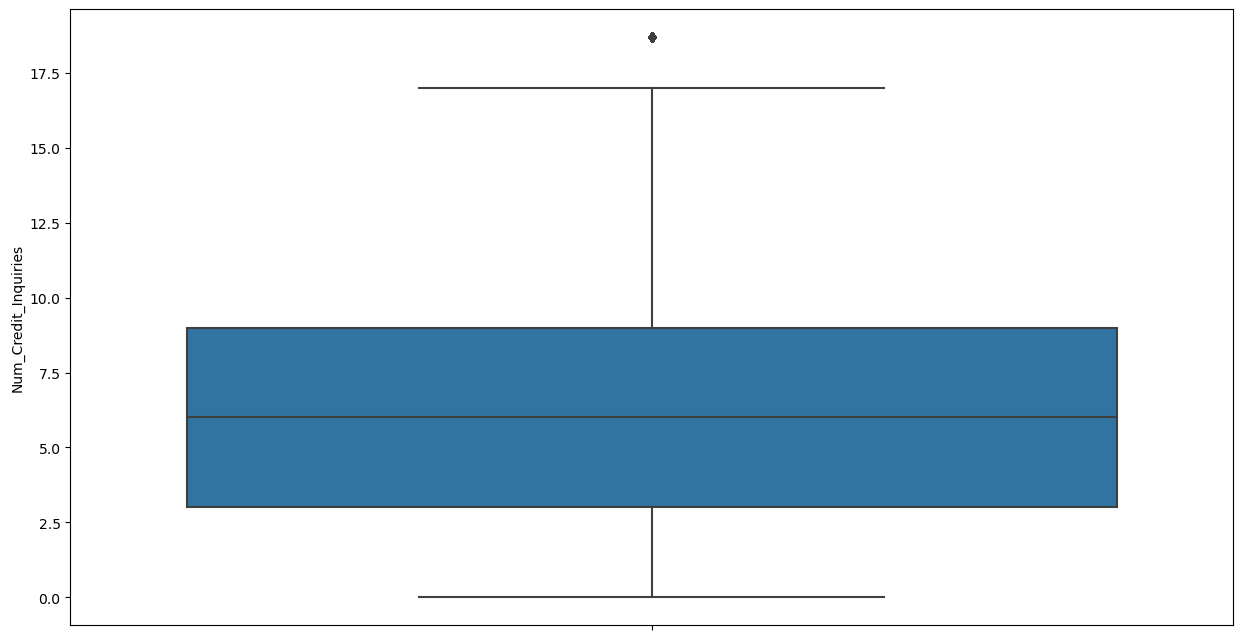

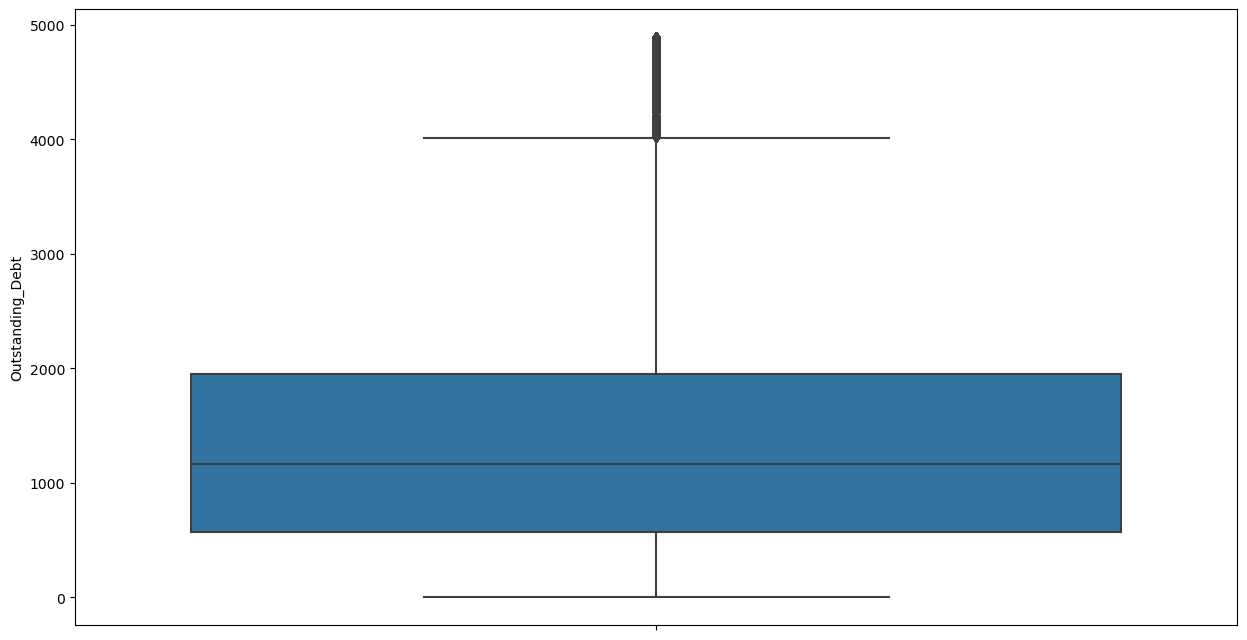

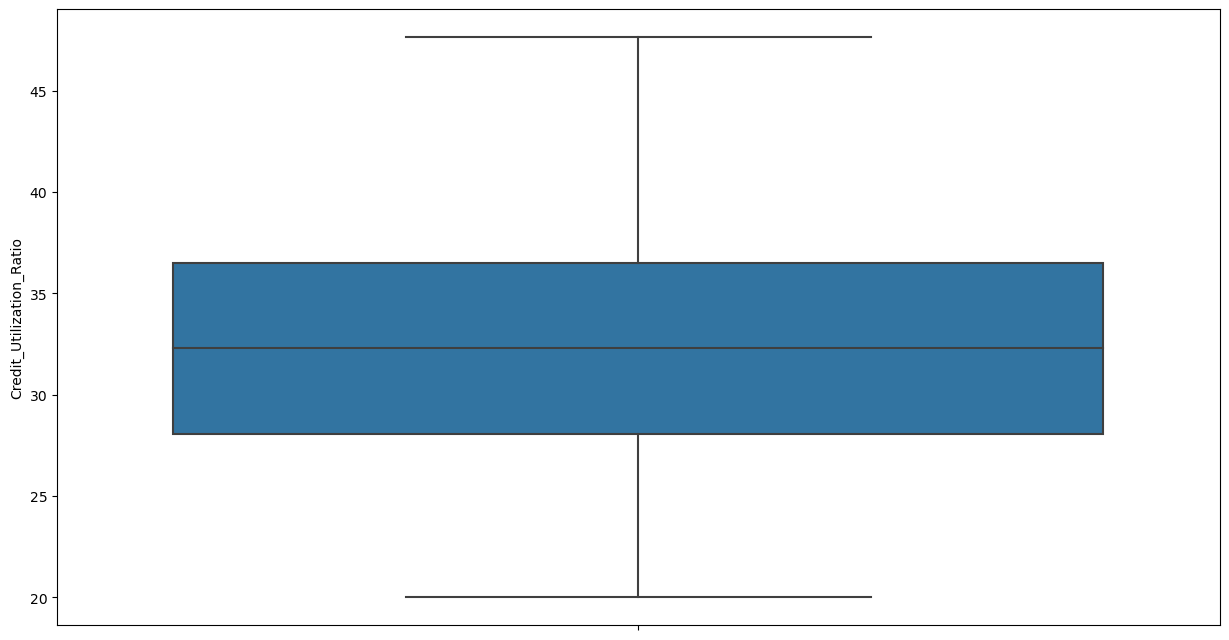

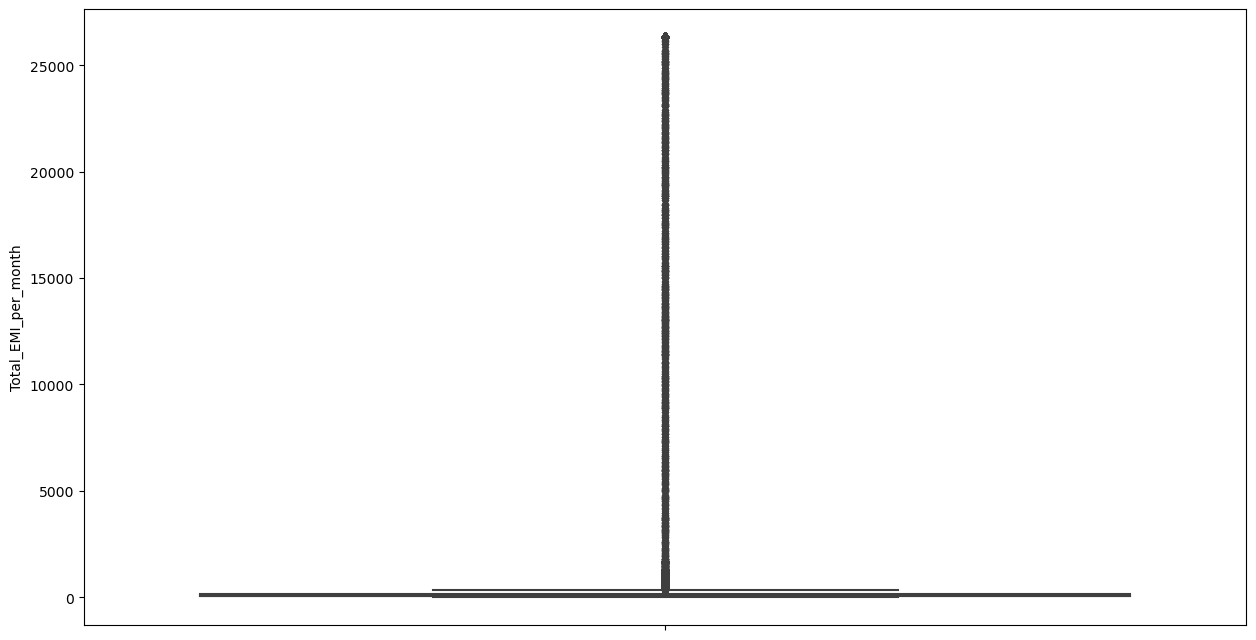

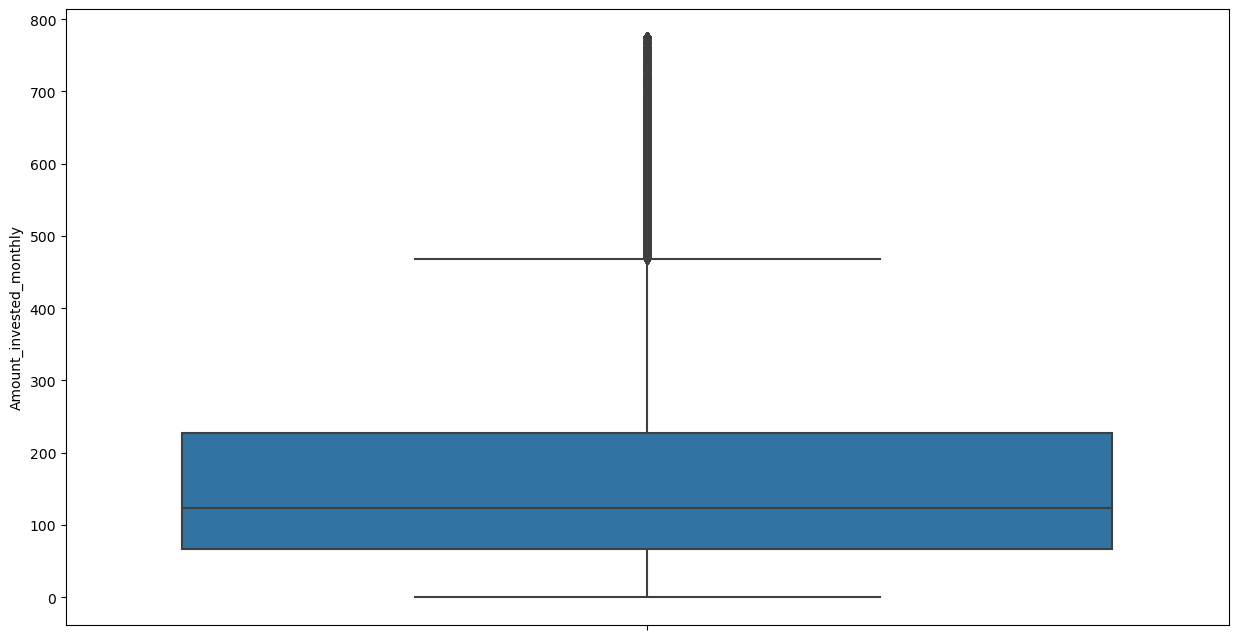

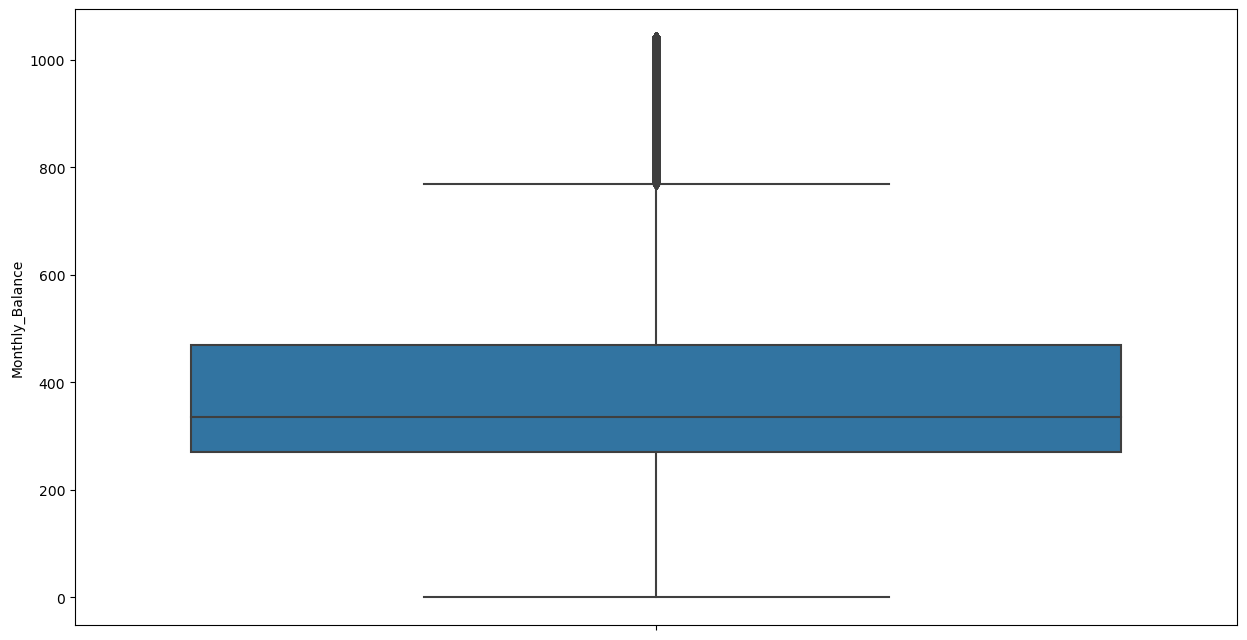

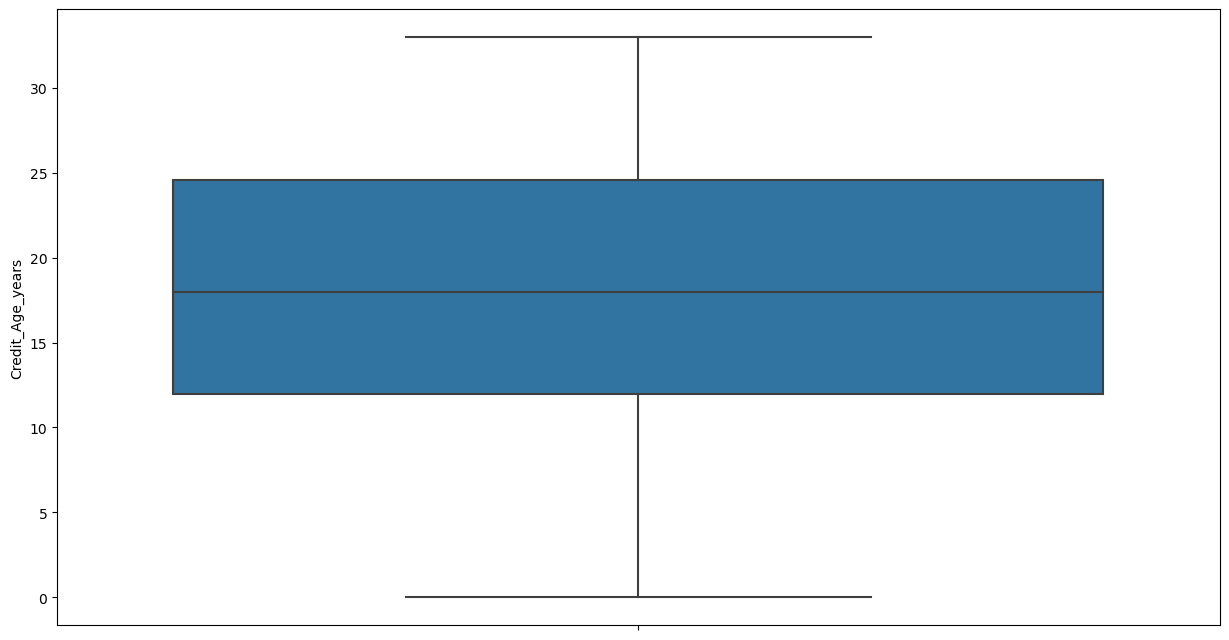

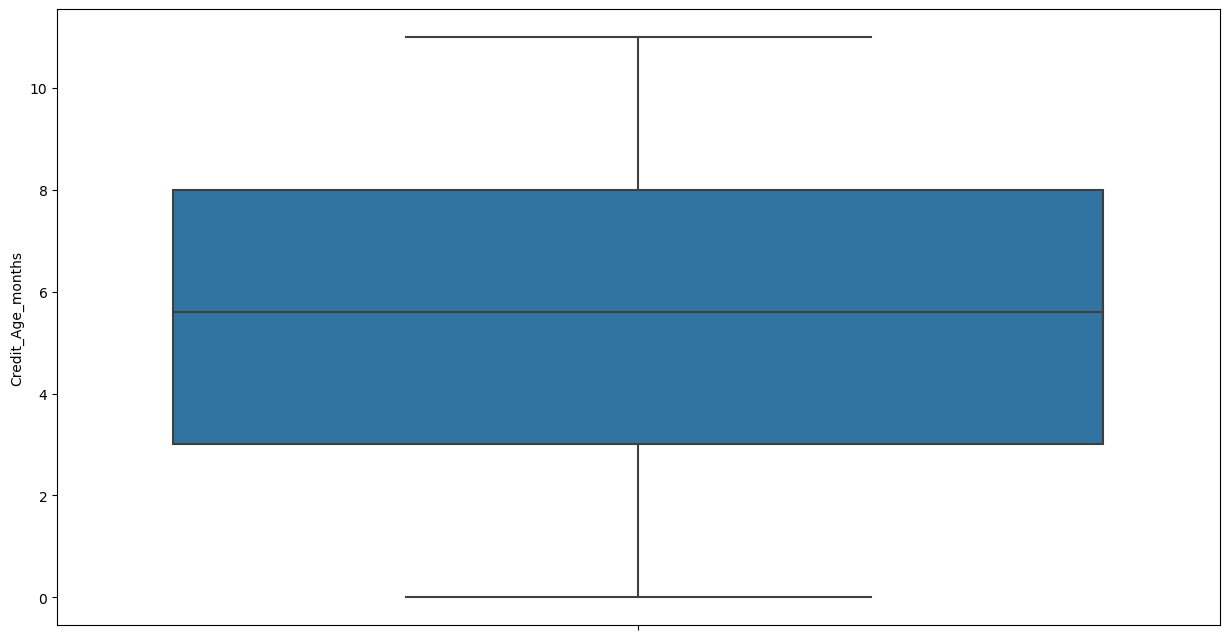

In [91]:
for i in cols:
    sns.boxplot(y=df_outlier_treated[i])
    plt.show()

In [92]:
df1 = pd.concat([df_cat, df_outlier_treated], axis =1)

In [93]:
df1['Credit_Score'].value_counts(normalize = True)
#the classes of the target variable is not fairly distributed

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

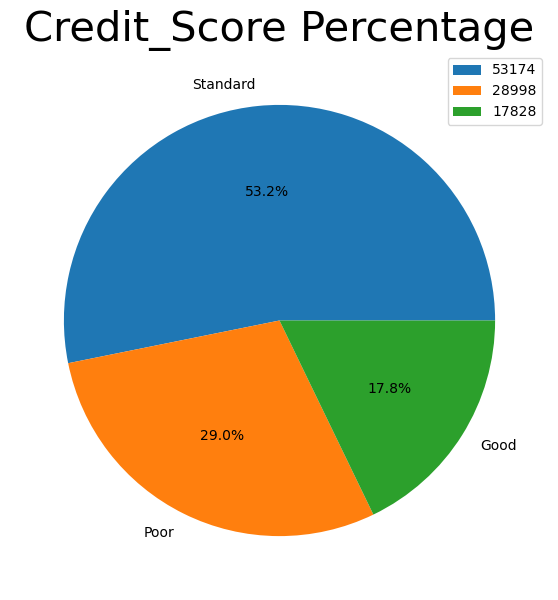

In [94]:
labels = df1["Credit_Score"].value_counts().index
sizes = df1["Credit_Score"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(df1["Credit_Score"].value_counts())
plt.show()


In [95]:
df_cat['Credit_Score'] = df_cat['Credit_Score'].replace('Standard', 0).replace('Good', 0).replace('Poor', 1)

In [96]:
df_cat['Credit_Score'].value_counts()

0    71002
1    28998
Name: Credit_Score, dtype: int64

In [97]:
df_cat['Credit_Score'] = df_cat['Credit_Score'].astype('int64')

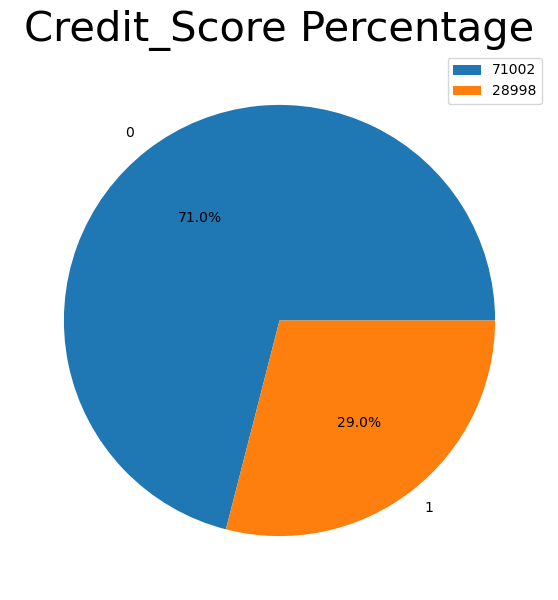

In [98]:
labels = df_cat["Credit_Score"].value_counts().index
sizes = df_cat["Credit_Score"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(df_cat["Credit_Score"].value_counts())
plt.show()


In [99]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Month                  100000 non-null  object
 1   Occupation             100000 non-null  object
 2   Credit_Mix             100000 non-null  object
 3   Payment_of_Min_Amount  100000 non-null  object
 4   Payment_Behaviour      100000 non-null  object
 5   Credit_Score           100000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat:
    df_cat[i]= le.fit_transform(df_cat[i])

In [101]:
df_cat

Month  Occupation  Credit_Mix  Payment_of_Min_Amount  \
0          3          13           2                      1   
1          2          13           1                      1   
2          6          13           1                      1   
3          0          13           1                      1   
4          7          13           1                      1   
...      ...         ...         ...                    ...   
99995      0           9           2                      1   
99996      7           9           2                      1   
99997      5           9           1                      1   
99998      4           9           1                      1   
99999      1           9           1                      1   

       Payment_Behaviour  Credit_Score  
0                      2             0  
1                      3             0  
2                      4             0  
3                      5             0  
4                      1             0  
...                  ...           ...  
99995                  0             1  
99996                  1             1  
99997                  0             1  
99998                  3             0  
99999                  5             1  

[100000 rows x 6 columns]

In [102]:
df_num

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            1976.265167                3.0   
2      31.8       19114.12            1929.969500                3.0   
3      23.0       19114.12            2911.331167                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0                  3.0   
1                  4.0            3.0          4.0                 -1.0   
2                  4.0            3.0          4.0                  3.0   
3                  4.0            3.0          4.0                  5.0   
4                  4.0            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0           35.0          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         7.0                 11.27                   4.0   
1                         8.0                 11.27                   4.0   
2                         7.0                  9.05                   4.0   
3                         4.0                  6.27                   4.0   
4                         5.6                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                     7.0                 11.50                   3.0   
99996                     7.0                 11.50                   3.0   
99997                     6.0                 11.50                   3.0   
99998                     8.8                 11.50                   3.0   
99999                     6.0                 11.50                   3.0   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0                809.98                 26.822620            49.574949   
1                809.98                 31.944960            49.574949   
2                809.98                 28.609352            49.574949   
3                809.98                 31.377862            49.574949   
4                809.98                 24.797347            49.574949   
...                 ...                       ...                  ...   
99995            502.38                 34.663572            35.104023   
99996            502.38                 40.565631            35.104023   
99997            502.38                 41.255522            35.104023   
99998            502.38                 33.638208            35.104023   
99999            502.38                 34.192463            35.104023   

       Amount_invested_monthly  Monthly_Balance  Credit_Age_years  \
0                    80.415295       312.494089              22.0   
1                   118.280222       284.629162              23.0   
2                    81.699521       331.209863              22.0   
3                   199.458074       223.451310              22.0   
4                    41.420153       341.489231              22.0   
...           

In [103]:
df2 = pd.concat([df_cat, df_outlier_treated], axis =1)

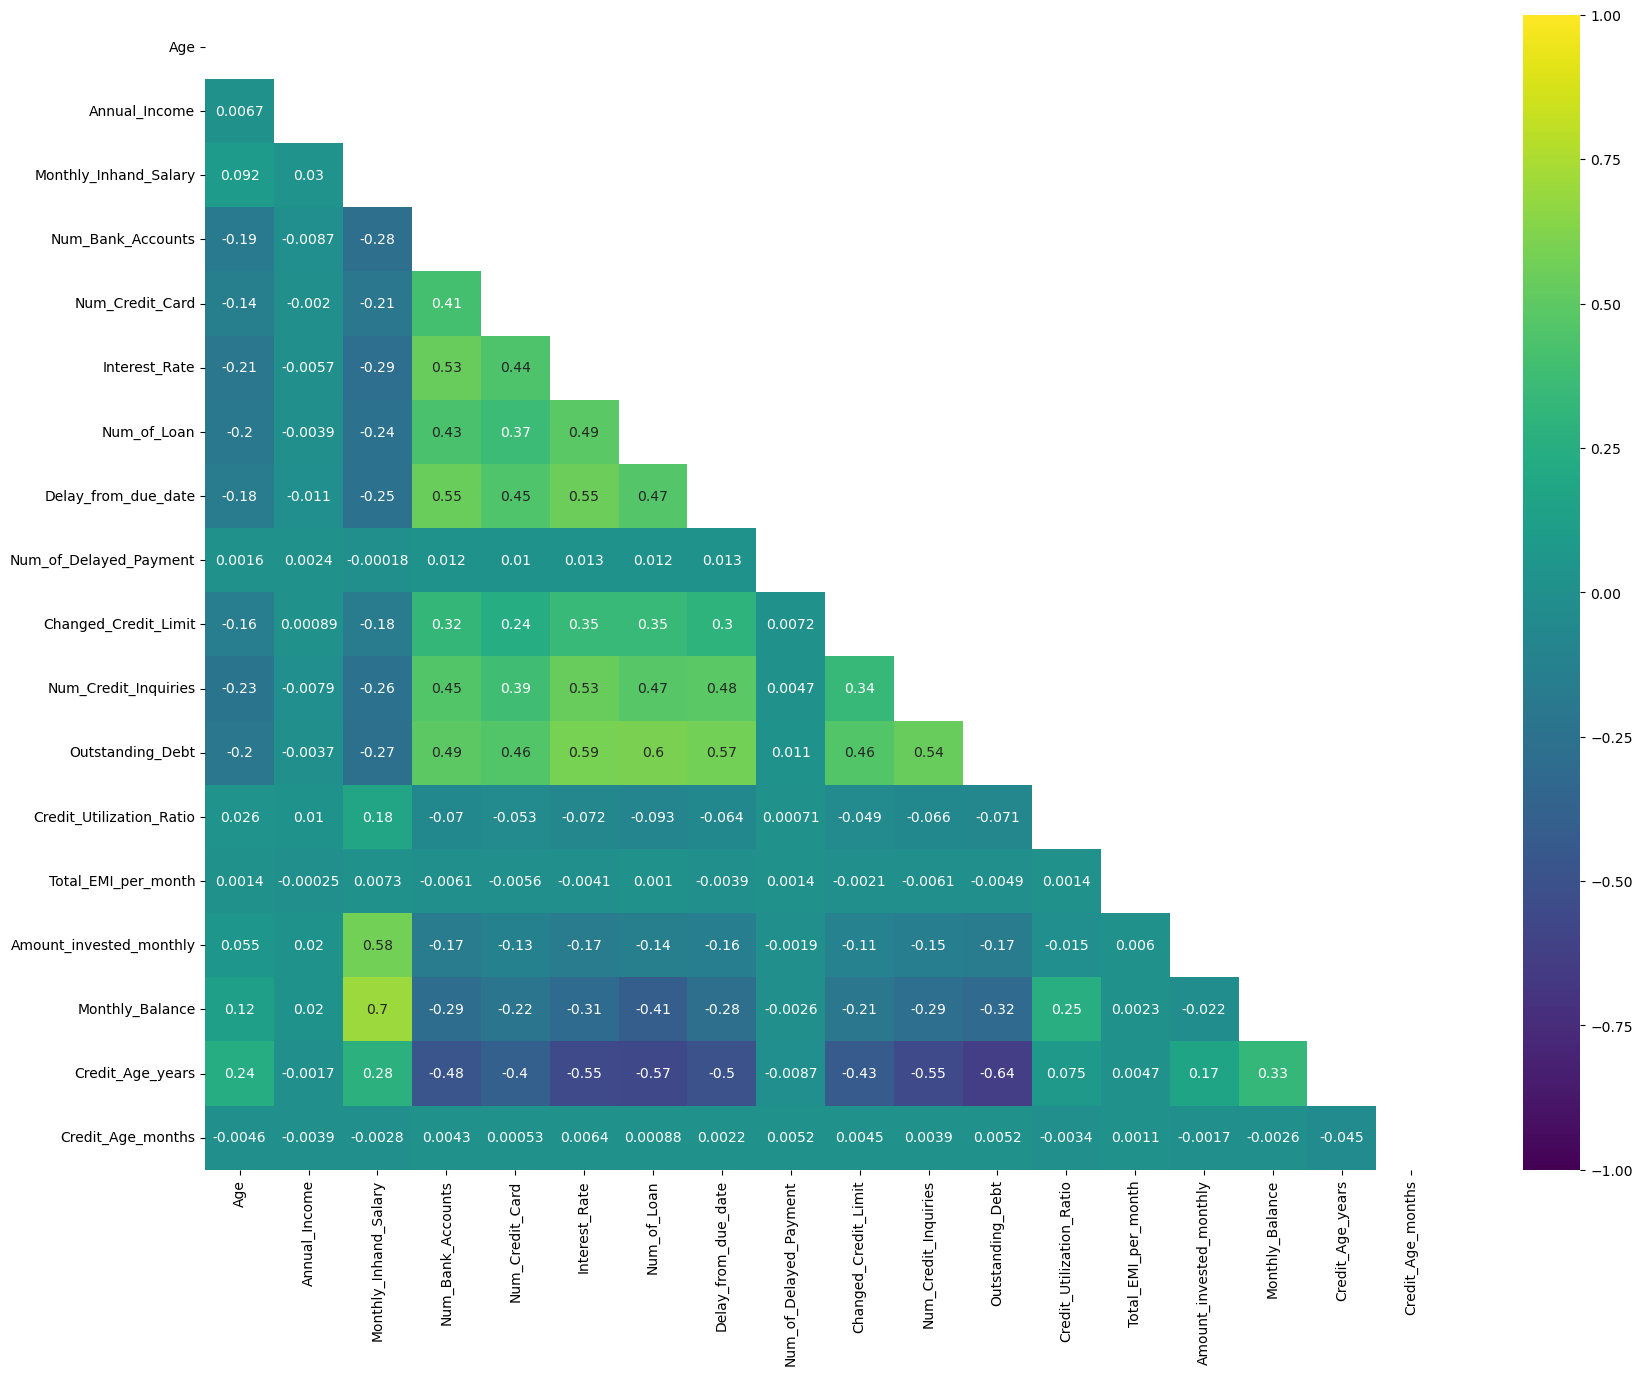

In [104]:
plt.figure(figsize=(20,15))
sns.heatmap(df_num.corr(),annot=True,cmap='viridis',mask=np.triu(df_num.corr()),vmin=-1,center=0,vmax=1)
plt.show()

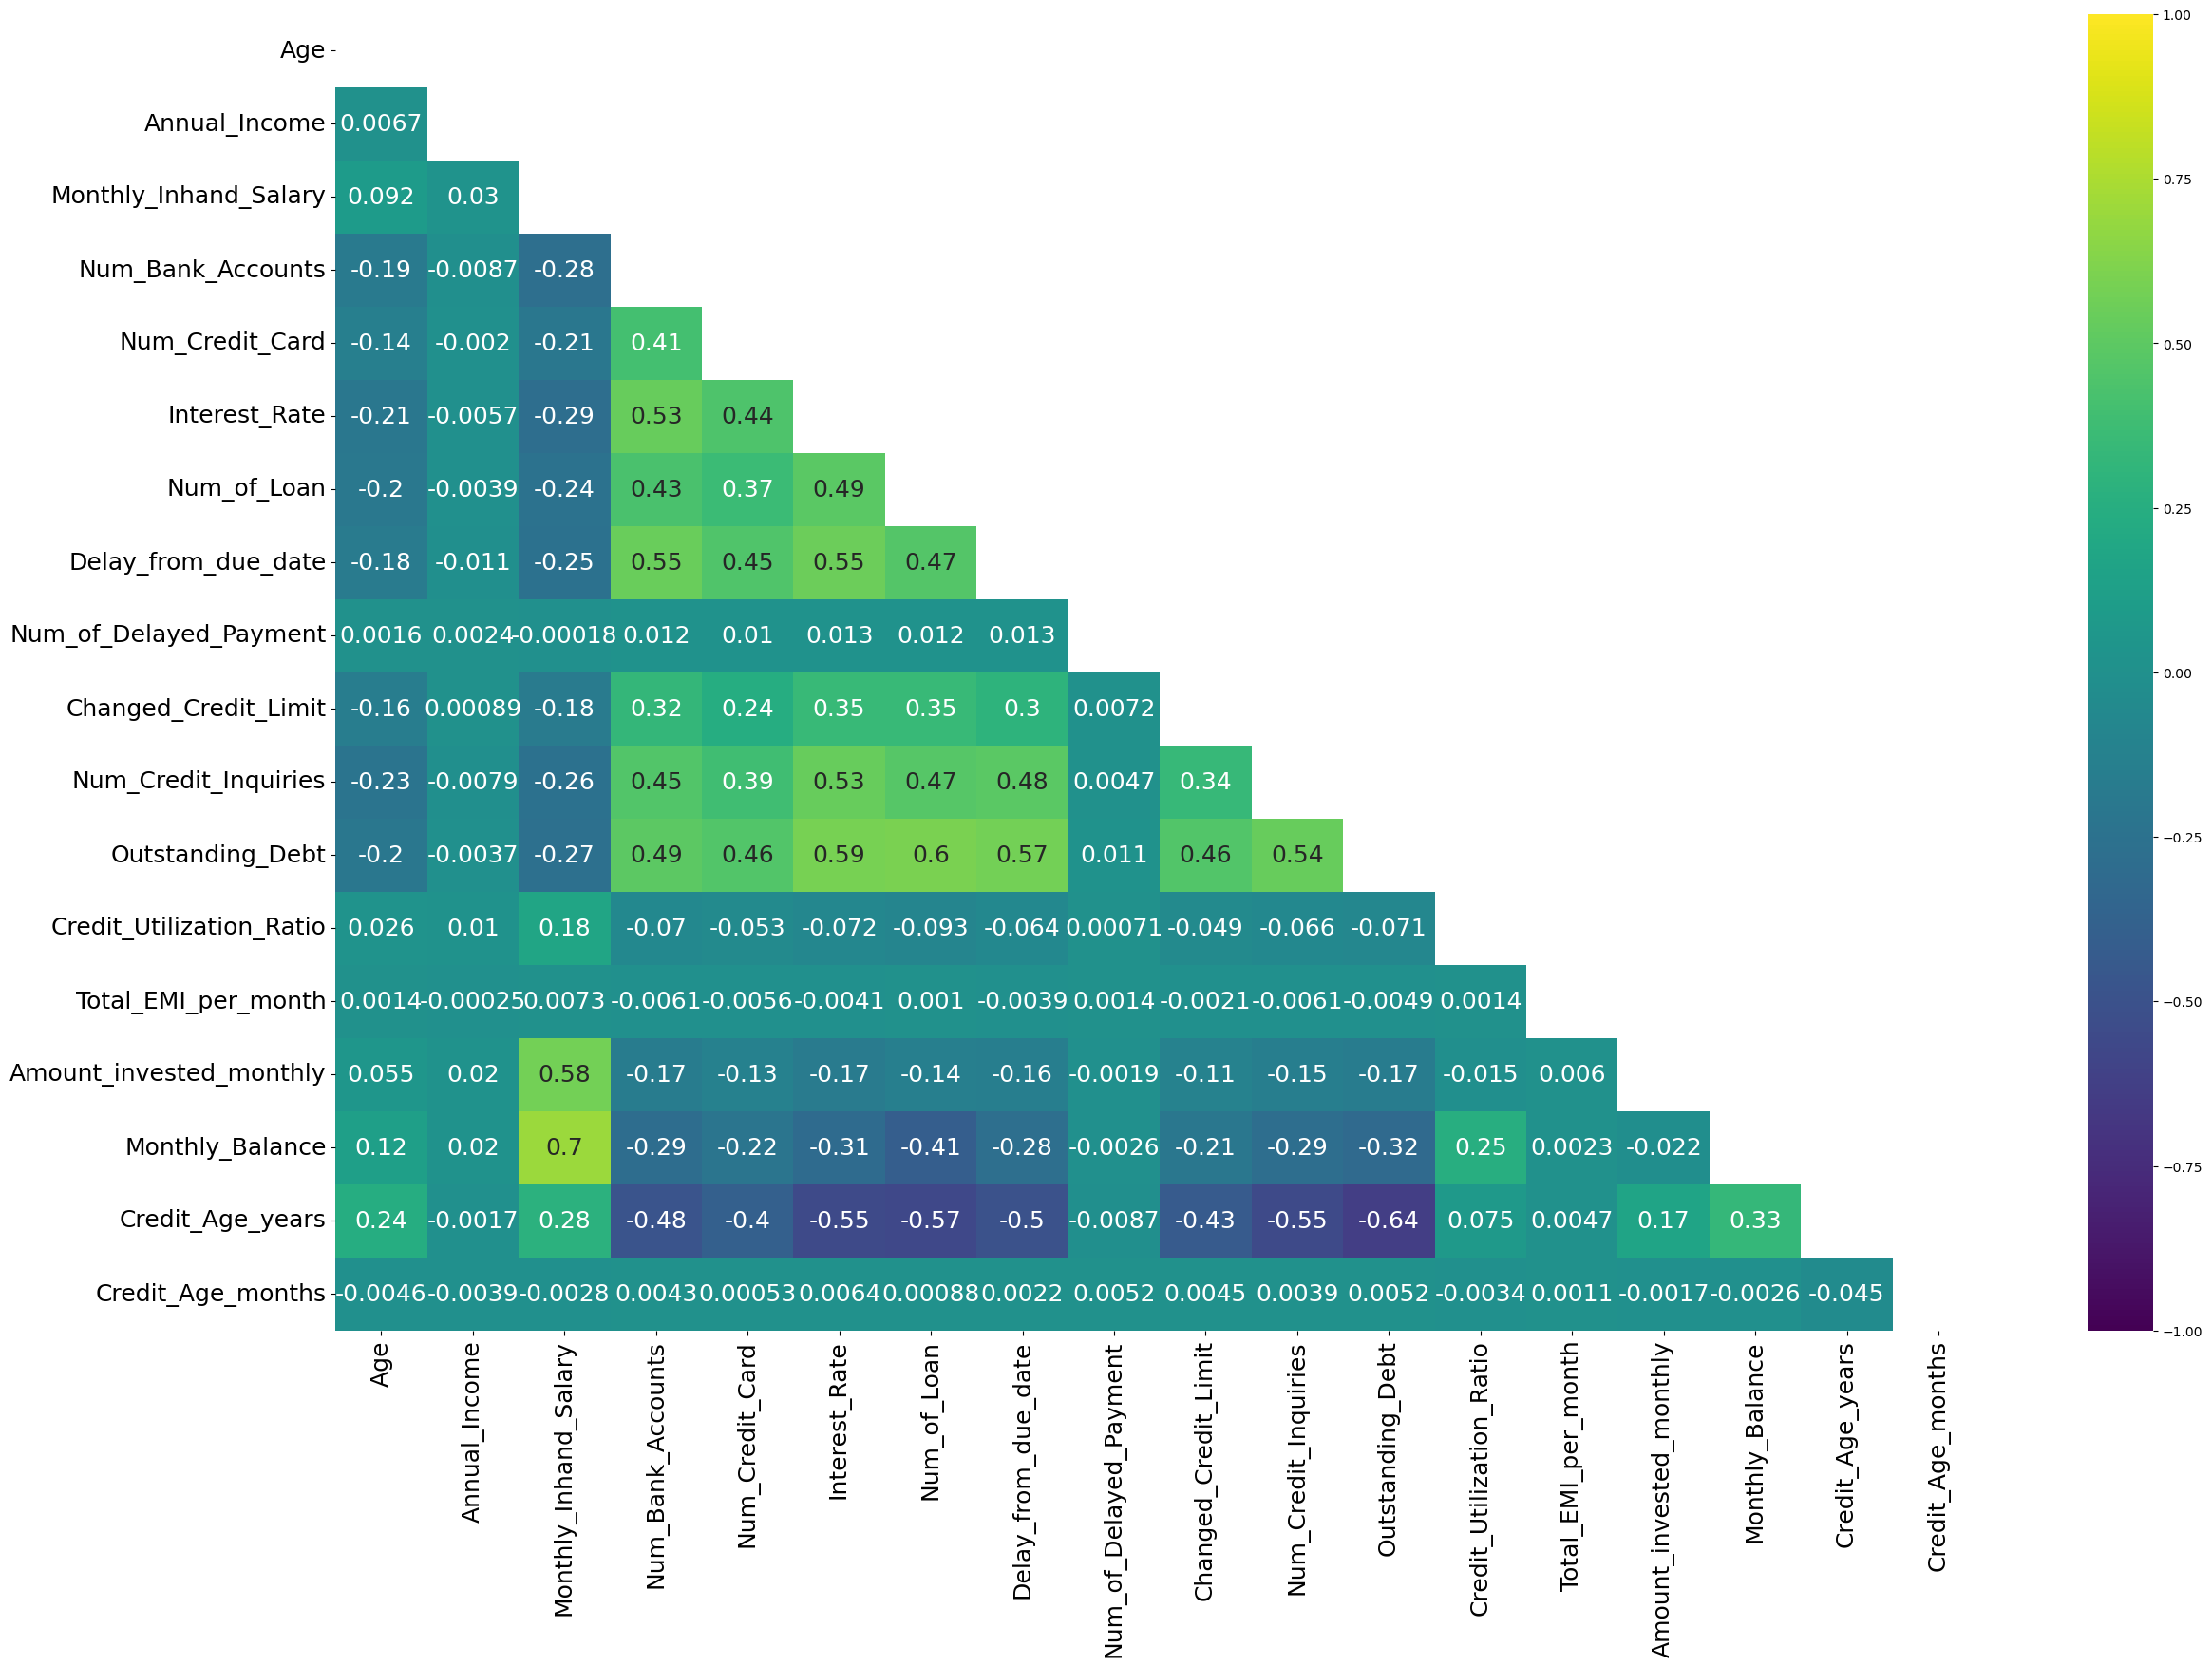

In [105]:
plt.figure(figsize=(28,18))
sns.heatmap(df_num.corr(),annot=True,cmap='viridis',mask=np.triu(df_num.corr()),vmin=-1,center=0,vmax=1,annot_kws={'fontsize':18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_auc_score, recall_score, precision_score

x= df2.drop('Credit_Score',axis=1)
y= df2['Credit_Score']
xtrain , xtest , ytrain , ytest =train_test_split(x,y,train_size = 0.8, random_state=10)

In [108]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy_train", "Accuracy_test", "Recall", "Precision", "F1 Score", "AUC Score"])
def update_performance(name, train, pred_train, test, pred):
    global perf_score
    perf_score = perf_score.append({
        'Model': name,
        'Accuracy_train': accuracy_score(train, pred_train),
        'Accuracy_test': accuracy_score(test, pred),
        'Recall': recall_score(test, pred),
        'Precision': precision_score(test, pred),
        'F1 Score': f1_score(test, pred),
        'AUC Score': roc_auc_score(test, pred)}, ignore_index=True)

In [ ]:
# SMOTE

In [109]:
from imblearn.over_sampling import SMOTE

In [112]:
sm = SMOTE(sampling_strategy= 0.7)
x_train_sm,y_train_sm= sm.fit_resample(xtrain,ytrain)
data_after_smote = pd.DataFrame(x_train_sm, columns=xtrain.columns)
data_after_smote['target'] = y_train_sm 

In [114]:
df3 = data_after_smote

In [115]:
from sklearn.model_selection import train_test_split
x= df3.drop('target',axis=1)
y= df3['target']
x_train , x_test , y_train , y_test =train_test_split(x,y,train_size = 0.8, random_state=10)

In [116]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score,recall_score,precision_score

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score,recall_score,precision_score,roc_auc_score

In [ ]:
# Base Model -Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 10) 
model = rf.fit(xtrain, ytrain)
ypred_rf_train = model.predict(xtrain)
ypred_rf_test=  model.predict(xtest)
print(accuracy_score(ytest, ypred_rf_test))
print(confusion_matrix(ytest, ypred_rf_test))
print(classification_report(ytest, ypred_rf_test))

0.8625
[[13071  1093]
 [ 1657  4179]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     14164
           1       0.79      0.72      0.75      5836

    accuracy                           0.86     20000
   macro avg       0.84      0.82      0.83     20000
weighted avg       0.86      0.86      0.86     20000



In [119]:
update_performance('Base Model- Random Forest',ytrain,ypred_rf_train,ytest,ypred_rf_test)
perf_score

Model  Accuracy_train  Accuracy_test    Recall  \
0  Base Model- Random Forest        0.997575         0.8625  0.716073   

   Precision  F1 Score  AUC Score  
0   0.792678  0.752431   0.819453

In [ ]:
# SMOTE

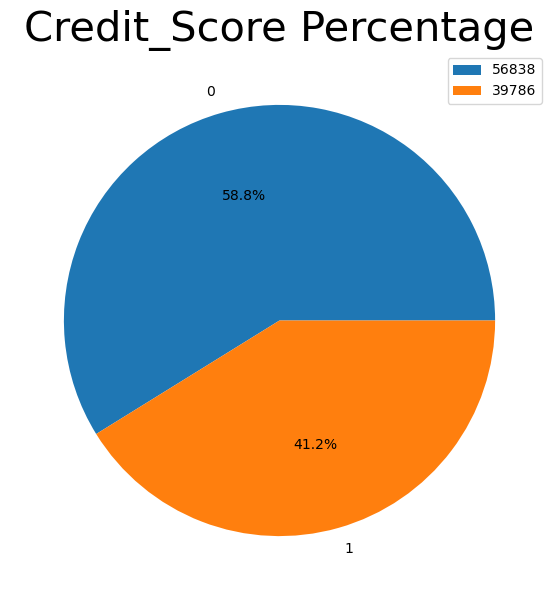

In [120]:
labels = df3["target"].value_counts().index
sizes = df3["target"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(df3["target"].value_counts())
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
rf = RandomForestClassifier(n_estimators = 20, random_state = 10) 
model = rf.fit(x_train, y_train)
ypred_rf_train = model.predict(x_train)
ypred_rf_test=  model.predict(x_test)
print('Accuracy score for test:', accuracy_score(y_test, ypred_rf_test))
print(confusion_matrix(y_test, ypred_rf_test))
print(classification_report(y_test, ypred_rf_test))

Accuracy score for test: 0.8770504527813713
[[10198  1062]
 [ 1314  6751]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11260
           1       0.86      0.84      0.85      8065

    accuracy                           0.88     19325
   macro avg       0.87      0.87      0.87     19325
weighted avg       0.88      0.88      0.88     19325



In [122]:
update_performance(name='Random Forest after SMOTE', train=y_train, pred_train=ypred_rf_train, test=y_test, pred=ypred_rf_test)
perf_score

Model  Accuracy_train  Accuracy_test    Recall  \
0  Base Model- Random Forest        0.997575        0.86250  0.716073   
1  Random Forest after SMOTE        0.998163        0.87705  0.837074   

   Precision  F1 Score  AUC Score  
0   0.792678  0.752431   0.819453  
1   0.864073  0.850359   0.871379

In [123]:
# Ada Boost using SMOTE

In [124]:
ada = AdaBoostClassifier() 
model = ada.fit(x_train, y_train)
ypred_ada_train = model.predict(x_train)
ypred_ada_test=  model.predict(x_test)
print('Accuracy score for test:', accuracy_score(y_test, ypred_ada_test))
print(confusion_matrix(y_test, ypred_ada_test))
print(classification_report(y_test, ypred_ada_test))

Accuracy score for test: 0.7938421733505822
[[9680 1580]
 [2404 5661]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     11260
           1       0.78      0.70      0.74      8065

    accuracy                           0.79     19325
   macro avg       0.79      0.78      0.78     19325
weighted avg       0.79      0.79      0.79     19325



In [125]:
update_performance(name='Ada Boost after SMOTE', train=y_train, pred_train=ypred_ada_train, test=y_test, pred=ypred_ada_test)
perf_score

Model  Accuracy_train  Accuracy_test    Recall  \
0  Base Model- Random Forest        0.997575       0.862500  0.716073   
1  Random Forest after SMOTE        0.998163       0.877050  0.837074   
2      Ada Boost after SMOTE        0.792158       0.793842  0.701922   

   Precision  F1 Score  AUC Score  
0   0.792678  0.752431   0.819453  
1   0.864073  0.850359   0.871379  
2   0.781798  0.739710   0.780801

In [126]:
# Decision tree with Smote

In [127]:
gb = GradientBoostingClassifier() 
model = gb.fit(x_train, y_train)
ypred_gb_train = model.predict(x_train)
ypred_gb_test=  model.predict(x_test)
print('Accuracy score for test:', accuracy_score(y_test, ypred_gb_test))
print(confusion_matrix(y_test, ypred_gb_test))
print(classification_report(y_test, ypred_gb_test))

Accuracy score for test: 0.8298576972833118
[[9751 1509]
 [1779 6286]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11260
           1       0.81      0.78      0.79      8065

    accuracy                           0.83     19325
   macro avg       0.83      0.82      0.82     19325
weighted avg       0.83      0.83      0.83     19325



In [128]:
update_performance(name='Gradient Boosting after SMOTE', train=y_train, pred_train=ypred_gb_train, test=y_test, pred=ypred_gb_test)
perf_score

Model  Accuracy_train  Accuracy_test    Recall  \
0      Base Model- Random Forest        0.997575       0.862500  0.716073   
1      Random Forest after SMOTE        0.998163       0.877050  0.837074   
2          Ada Boost after SMOTE        0.792158       0.793842  0.701922   
3  Gradient Boosting after SMOTE        0.830425       0.829858  0.779417   

   Precision  F1 Score  AUC Score  
0   0.792678  0.752431   0.819453  
1   0.864073  0.850359   0.871379  
2   0.781798  0.739710   0.780801  
3   0.806414  0.792686   0.822702

In [129]:
# Descision Tree 
dt = DecisionTreeClassifier(random_state=100)
dt_model = dt.fit(xtrain,ytrain)
ypred_dt_train = dt_model.predict(xtrain)
ypred_dt_test = dt_model.predict(xtest)
print('Accuracy score for test:',accuracy_score(ytest,ypred_dt_test))
print(confusion_matrix(ytest,ypred_dt_test))
print(classification_report(ytest,ypred_dt_test))
print('Accuracy score for train:',accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
update_performance(name='Decision Tree', train=ytrain, pred_train=ypred_dt_train, test=ytest, pred=ypred_dt_test)
perf_score

from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt,
                   feature_names=xtrain.columns,
                   class_names=["0","1","2"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

In [ ]:
# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
y_pred_gnb = gnb.predict(xtest)
y_pred_gnb_train = gnb.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_gnb_train))
print(classification_report(ytrain, y_pred_gnb_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_gnb))
print(classification_report(ytest, y_pred_gnb))

In [ ]:
update_performance(name='Gaussian NB', train=ytrain, pred_train=y_pred_gnb_train, test=ytest, pred=y_pred_gnb)
perf_score

In [ ]:
# Bernoulli Naive Bayes

In [ ]:
ber = BernoulliNB()
ber.fit(xtrain, ytrain)
y_pred_ber = ber.predict(xtest)
y_pred_ber_train = ber.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_ber_train))
print(classification_report(ytrain, y_pred_ber_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_ber))
print(classification_report(ytest, y_pred_ber))

In [ ]:
update_performance(name='Bernoulli NB', train=ytrain, pred_train=y_pred_ber_train, test=ytest, pred=y_pred_ber)
perf_score

In [ ]:
# Bagging Classifier using Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(random_state=10)
bc=BaggingClassifier(dt)
bc_model = bc.fit(xtrain,ytrain)
y_pred_bc = bc_model.predict(xtest)
y_pred_bc_train = bc_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_bc_train))
print(classification_report(ytrain, y_pred_bc_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_bc))
print(classification_report(ytest, y_pred_bc))

In [ ]:
update_performance(name='Bagging Classifier - Decision Tree', train=ytrain, pred_train=y_pred_bc_train, test=ytest, pred=y_pred_bc)
perf_score

In [ ]:
# Bagging Classifier using Random Forest

In [ ]:
rf = RandomForestClassifier()
bc=BaggingClassifier(rf)
bc_model = bc.fit(xtrain,ytrain)
y_pred_bc = bc_model.predict(xtest)
y_pred_bc_train = bc_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_bc_train))
print(classification_report(ytrain, y_pred_bc_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_bc))
print(classification_report(ytest, y_pred_bc))

In [ ]:
update_performance(name='Bagging Classifier - Random Forest', train=ytrain, pred_train=y_pred_bc_train, test=ytest, pred=y_pred_bc)
perf_score

In [ ]:
# Bagging Classifier using KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
bc=BaggingClassifier(knn)
bc_model = bc.fit(xtrain,ytrain)
y_pred_bc = bc_model.predict(xtest)
y_pred_bc_train = bc_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_bc_train))
print(classification_report(ytrain, y_pred_bc_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_bc))
print(classification_report(ytest, y_pred_bc))

In [ ]:
update_performance(name='Bagging Classifier - KNeighbors', train=ytrain, pred_train=y_pred_bc_train, test=ytest, pred=y_pred_bc)
perf_score

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

lr_model = lr.fit(xtrain, ytrain)
lr_model_pred = lr_model.predict(xtest)
lr_model_pred_xtrain = lr_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, lr_model_pred_xtrain))
print(classification_report(ytrain, lr_model_pred_xtrain))
print('Accuracy score on test data', accuracy_score(ytest, lr_model_pred))
print(classification_report(ytest, lr_model_pred))

In [ ]:
update_performance(name='Logistic Regression', train=ytrain, pred_train=lr_model_pred_xtrain, test=ytest, pred=lr_model_pred)
perf_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier 

In [ ]:
#Ada Boost Model

In [ ]:
ad = AdaBoostClassifier()
ada_model = ad.fit(xtrain,ytrain)
y_pred_ada = ada_model.predict(xtest)
y_pred_ada_train = ada_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_ada_train))
print(classification_report(ytrain, y_pred_ada_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_ada))
print(classification_report(ytest, y_pred_ada))

In [ ]:
update_performance(name = 'Ada boost Classifier', train=ytrain, pred_train=y_pred_ada_train, test=ytest, pred=y_pred_ada)
perf_score

In [ ]:
# Adaboost using Random Forest

In [ ]:
rf = RandomForestClassifier()
ad = AdaBoostClassifier(rf)
ada_model = ad.fit(xtrain,ytrain)
y_pred_ada = ada_model.predict(xtest)
y_pred_ada_train = ada_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_ada_train))
print(classification_report(ytrain, y_pred_ada_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_ada))
print(classification_report(ytest, y_pred_ada))

In [ ]:
update_performance(name = 'Ada boost Classifier - Random Forest', train=ytrain, pred_train=y_pred_ada_train, test=ytest, pred=y_pred_ada)
perf_score

In [ ]:
# Gradient Boosting Model

In [ ]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(xtrain,ytrain)
y_pred_gb = gb_model.predict(xtest)
y_pred_gb_train = gb_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_gb_train))
print(classification_report(ytrain, y_pred_gb_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_gb))
print(classification_report(ytest, y_pred_gb))

In [ ]:
update_performance(name = 'Gradient Boosting', train=ytrain, pred_train=y_pred_gb_train, test=ytest, pred=y_pred_gb)
perf_score

In [ ]:
# Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(xtrain,ytrain)
y_pred_xgb = xgb_model.predict(xtest)
y_pred_xgb_train = xgb_model.predict(xtrain)
print('Accuracy score on train data', accuracy_score(ytrain, y_pred_xgb_train))
print(classification_report(ytrain, y_pred_xgb_train))
print('Accuracy score on test data', accuracy_score(ytest, y_pred_xgb))
print(classification_report(ytest, y_pred_xgb))

In [ ]:
update_performance(name = 'Xtreme Gradient Boosting', train=ytrain, pred_train= y_pred_xgb_train, test=ytest, pred=y_pred_xgb)
perf_score

In [ ]:
# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(xtrain,ytrain)
model_knn_predict_train = model.predict(xtrain)
model_knn_predict = model.predict(xtest)
print('accuracy test :', model.score(xtest, ytest))

In [ ]:
update_performance(name = 'KNeighbors Classifier', train=ytrain, pred_train= model_knn_predict_train, test=ytest, pred=model_knn_predict)
perf_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_param = {
    'max_depth': [30, 35, 40],
    'min_samples_leaf': [50,60,70,80],
    'min_samples_split': [10, 20, 30],
    'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = tuned_param, 
                          cv = 3, verbose = 1)

grid_search.fit(xtrain,ytrain)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 40, min_samples_leaf= 50, min_samples_split= 10, random_state=100)
dt_model = dt.fit(xtrain,ytrain)
ypred_dt_train = dt_model.predict(xtrain)
ypred_dt_test = dt_model.predict(xtest)
print('Accuracy score for test:',accuracy_score(ytest,ypred_dt_test))
print(confusion_matrix(ytest,ypred_dt_test))
print(classification_report(ytest,ypred_dt_test))
print('Accuracy score for train:',accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

In [ ]:
update_performance(name = 'Decision Tree Classifier - Best Params', train=ytrain, pred_train= ypred_dt_train, test=ytest, pred=ypred_dt_test)
perf_score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Base Model-Random Forest', 'Random Forest after SMORT', 'Ada Boost after SMORT', 'Gradient Boosting after SMORT',
         'Decision tree', 'daussian NB', 'Bernoullie', 'Bagging classifier-Decision Tree',
         'Bagging classifier-Random Forest', 'Bagging classifier-KNeighbors', 'Logistic Regression',
         'Ada Boost classifier', 'Ada Boost classifier-Random Forest', 'Gradient Boosting',
         'Xtreme Gradient Boosting', 'KNeighbors classifier', 'Decison Tree classifier best params']
accuracy_test = [0.862, 0.880, 0.798, 0.831, 0.805, 0.781, 0.747, 0.853, 0.863, 0.836, 0.706, 0.806, 0.865, 0.827, 0.851, 0.834, 0.828]
accuracy_train = [0.997, 0.998, 0.795, 0.831, 1, 0.782, 0.746, 0.990, 0.973, 0.947, 0.708, 0.805, 1.0, 0.830, 0.889, 0.890, 0.849]
distinct_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#ff0000', '#00ff00',
    '#0000ff', '#ffff00', '#ff00ff', '#00ffff', '#d0b7c7'
]
bar_width = 0.35
bar_positions1 = np.arange(len(model))
bar_positions2 = bar_positions1 + bar_width
plt.barh(bar_positions1, accuracy_train, height=bar_width, label='accuracy_train', color=distinct_colors[0])
plt.barh(bar_positions2, accuracy_test, height=bar_width, label='accuracy_test', color=distinct_colors[1])
for i, val1 in enumerate(accuracy_train):
    plt.text(val1 + 0.01, bar_positions1[i], f'{val1:.3f}', ha='left', va='center', fontsize=8)
for i, val2 in enumerate(accuracy_test):
    plt.text(val2 + 0.01, bar_positions2[i], f'{val2:.3f}', ha='left', va='center', fontsize=8)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison between Train and Test Sets')
plt.yticks(bar_positions1 + bar_width / 2, model)
plt.legend()
plt.show()

In [ ]:
model = ['Base Model-Random Forest', 'Random Forest after SMOTE', 'Ada Boost after SMOTE', 'Gradient Boosting after SMOTE',
         'Decision tree', 'daussian NB', 'Bernoullie', 'Bagging classifier-Decision Tree',
         'Bagging classifier-Random Forest', 'Bagging classifier-KNeighbors', 'Logistic Regression',
         'Ada Boost classifier', 'Ada Boost classifier-Random Forest', 'Gradient Boosting',
         'Xtreme Gradient Boosting', 'KNeighbors classifier', 'Decison Tree classifier best params']
accuracy_test = [0.862, 0.880, 0.798, 0.831, 0.805, 0.781, 0.747, 0.853, 0.863, 0.836, 0.706, 0.806, 0.865, 0.827, 0.851, 0.834, 0.828]
accuracy_train = [0.997, 0.998, 0.795, 0.831, 1, 0.782, 0.746, 0.990, 0.973, 0.947, 0.708, 0.805, 1.0, 0.830, 0.889, 0.890, 0.849]

sorted_indices = np.argsort(accuracy_test)

color_gradient = np.linspace(0, 1, len(model))
colors = plt.cm.viridis(color_gradient)
bars = plt.barh(np.array(model)[sorted_indices], np.array(accuracy_test)[sorted_indices], color=colors[sorted_indices])

plt.bar_label(bars, fmt='%.3f', fontsize=12, weight='bold')


plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison for Different Models')
plt.show()

# Un-supervised Learning

df2 is the data frame used to form clusters

In [ ]:
df2.head(1)
df2['Credit_Score'].value_counts()

In [ ]:
df2_standard = df2[df2['Credit_Score'] == 0]
df2_poor = df2[df2['Credit_Score'] == 1]

In [ ]:
df2_standard = df2_standard.iloc[:20000, :]
df2_poor = df2_poor.iloc[:10000, :]
df3 = pd.concat([df2_standard, df2_poor])

In [ ]:
df3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df3.drop('Credit_Score', inplace = True, axis =1)

In [ ]:
sc = StandardScaler()
df_sc  = sc.fit_transform(df3)

In [ ]:
df_sc = pd.DataFrame(df_sc,columns=df3.columns,index=df3.index)
df_sc.head(1)

In [ ]:
cov_mat=np.cov(df_sc.T)
print(cov_mat)

In [ ]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('Eigenvalues','\n',eig_val)
print('Eigenvector','\n',eig_vec)

In [ ]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

In [ ]:
percent_var=[]
for i in eig_val:
    variation=(i/sum(eig_val))*100
    percent_var.append(variation)
    percent_var

In [ ]:
np.cumsum(percent_var)

In [ ]:
pca=PCA(n_components = 0.90,random_state=10)
components=pca.fit_transform(df_sc)

In [ ]:
df_pca=pd.DataFrame(data=components, columns=['PCI','PC2','PC3','PC4','PC5','PC6','PC7', 'PCA8', 'PCA9', 'PCA10', 'PCA11','PCA12','PCA13','PCA14','PCA15','PCA16', 'PCA17'])
df_pca.shape

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_pca.corr(),annot=True)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
error = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_pca)
    error.append(km.inertia_)
plt.plot(range(1,11),error,marker='o')
plt.show()

In [ ]:
df_pca.shape

In [ ]:
n_clusters=[2,3,4]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_pca)
    score=silhouette_score(df_pca,predict,random_state=10)
    print('for {} clusters the silhouette score is {}'.format(k,score))

In [ ]:
new_clusters=KMeans(n_clusters=2,random_state=10)
new_clusters.fit(df_pca)
df_pca['kmeans_clusters']=new_clusters.labels_

In [ ]:
df_pca['kmeans_clusters'].value_counts()

In [ ]:
sns.countplot(data=df_pca,x='kmeans_clusters')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist
link = ['single','complete','average','ward']
for i in link:
    z = linkage(df_pca,i)
    c,coph_dist = cophenet(z,pdist(df_pca))
    print('Cophenet coefficient for',i,'is',c)

In [ ]:
link = ['single','complete','average','centroid','ward']
plt.figure(figsize = (15,5))
for i in link:
    z = linkage(df_pca,method = i)
    dendrogram(z,truncate_mode='lastp',p=20)
    print(i)
    plt.show()

In [ ]:
agglo = AgglomerativeClustering(n_clusters=2)
model_agglo = agglo.fit(df_pca)
df_pca['cluster_agglo'] = model_agglo.labels_

In [ ]:
df_pca['cluster_agglo'].value_counts(normalize=True)*100

In [ ]:
sns.countplot(df_pca['cluster_agglo'])

In [ ]:
df_pca.head(1)

In [ ]:
df_kmeans = df_pca.drop('cluster_agglo', axis =1)
df_agglo = df_pca.drop('kmeans_clusters', axis =1)

In [ ]:
df_kmeans.head(1)

In [ ]:
df_agglo.head(1)

In [ ]:
perf_score_USL = pd.DataFrame(columns=["Model", "Accuracy_train", "Accuracy_test", "Recall", "Precision", "F1 Score", "AUC Score"])
def update_performance_USL(name, train, pred_train, test, pred):
    global perf_score_USL
    perf_score_USL = perf_score_USL.append({
        'Model': name,
        'Accuracy_train': accuracy_score(train, pred_train),
        'Accuracy_test': accuracy_score(test, pred),
        'Recall': recall_score(test, pred),
        'Precision': precision_score(test, pred),
        'F1 Score': f1_score(test, pred),
        'AUC Score': roc_auc_score(test, pred)}, ignore_index=True)

In [ ]:
x = df_kmeans.drop('kmeans_clusters', axis = 1)
y = df_kmeans['kmeans_clusters']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=100, train_size=0.7)

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 10) 
model = rf.fit(xtrain, ytrain)
ypred_rf_train = model.predict(xtrain)
ypred_rf_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_rf_test))
print(confusion_matrix(ytest, ypred_rf_test))
print(classification_report(ytest, ypred_rf_test))

In [ ]:
update_performance_USL(name='Random Forest_Kmeans', train=ytrain, pred_train=ypred_rf_train, test=ytest, pred=ypred_rf_test)
perf_score_USL

In [ ]:
dt = DecisionTreeClassifier() 
model = dt.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Decision Tree_Kmeans', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
ada = AdaBoostClassifier() 
model = ada.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='AdaBoost_Kmeans', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(dt) 
model = bc.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Bagging_Decision tree_Kmeans', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
gb = GradientBoostingClassifier() 
model = gb.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Gradient_boosting_Kmeans', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
x = df_agglo.drop('cluster_agglo', axis =1)
y = df_agglo['cluster_agglo']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=100, train_size=0.7)

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 10) 
model = rf.fit(xtrain, ytrain)
ypred_rf_train = model.predict(xtrain)
ypred_rf_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_rf_test))
print(confusion_matrix(ytest, ypred_rf_test))
print(classification_report(ytest, ypred_rf_test))

In [ ]:
update_performance_USL(name='Random Forest_Agglomerative', train=ytrain, pred_train=ypred_rf_train, test=ytest, pred=ypred_rf_test)
perf_score_USL

In [ ]:
dt = DecisionTreeClassifier() 
model = dt.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Decision Tree_Agglomerative', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
ada = AdaBoostClassifier() 
model = ada.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Ada boost_Agglomerative', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(dt) 
model = bc.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Bagging_Decision_Tree_Agglomerative', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
gb = GradientBoostingClassifier()
model = gb.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test=  model.predict(xtest)
print('Accuracy score for test:', accuracy_score(ytest, ypred_test))
print(confusion_matrix(ytest, ypred_test))
print(classification_report(ytest, ypred_test))

In [ ]:
update_performance_USL(name='Gradient Boosting_Agglomerative', train=ytrain, pred_train=ypred_train, test=ytest, pred=ypred_test)
perf_score_USL

In [ ]:
model = ['Random forest_Kmeans', 'Decision Tree_Kmeans', 'Adaboost_Kmeans', 'Bagging_Decision_tree_Kmeans', 'Gradient_boosting_Kmeans', 'Random_forest_Agglomerative', 'Decision tree_Agglomerative', 'Ada boost_Agglomerative', 'Bagging decision tree_Agglomerative', 'Gradient_boosting_agglomerative']
accuracy_test = [0.996, 0.996, 0.997, 0.997, 0.996, 0.962, 0.940, 0.951, 0.958, 0.955]
sorted_indices = np.argsort(accuracy_test)
color_gradient = np.linspace(0, 1, len(model))
colors = plt.cm.viridis(color_gradient)
bars = plt.barh(np.array(model)[sorted_indices], np.array(accuracy_test)[sorted_indices], color=colors[sorted_indices])
plt.bar_label(bars, fmt='%.3f', fontsize=12, weight='bold')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison for Different Models')
plt.show()